**Import Libraries**

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import meanderpy as mp             
from importlib import reload
reload(mp)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
mpl.rcParams['figure.dpi'] = 500
import scipy.stats as stats          
import seaborn as sns                   
from scipy import interpolate          
import random

**Import River Data**

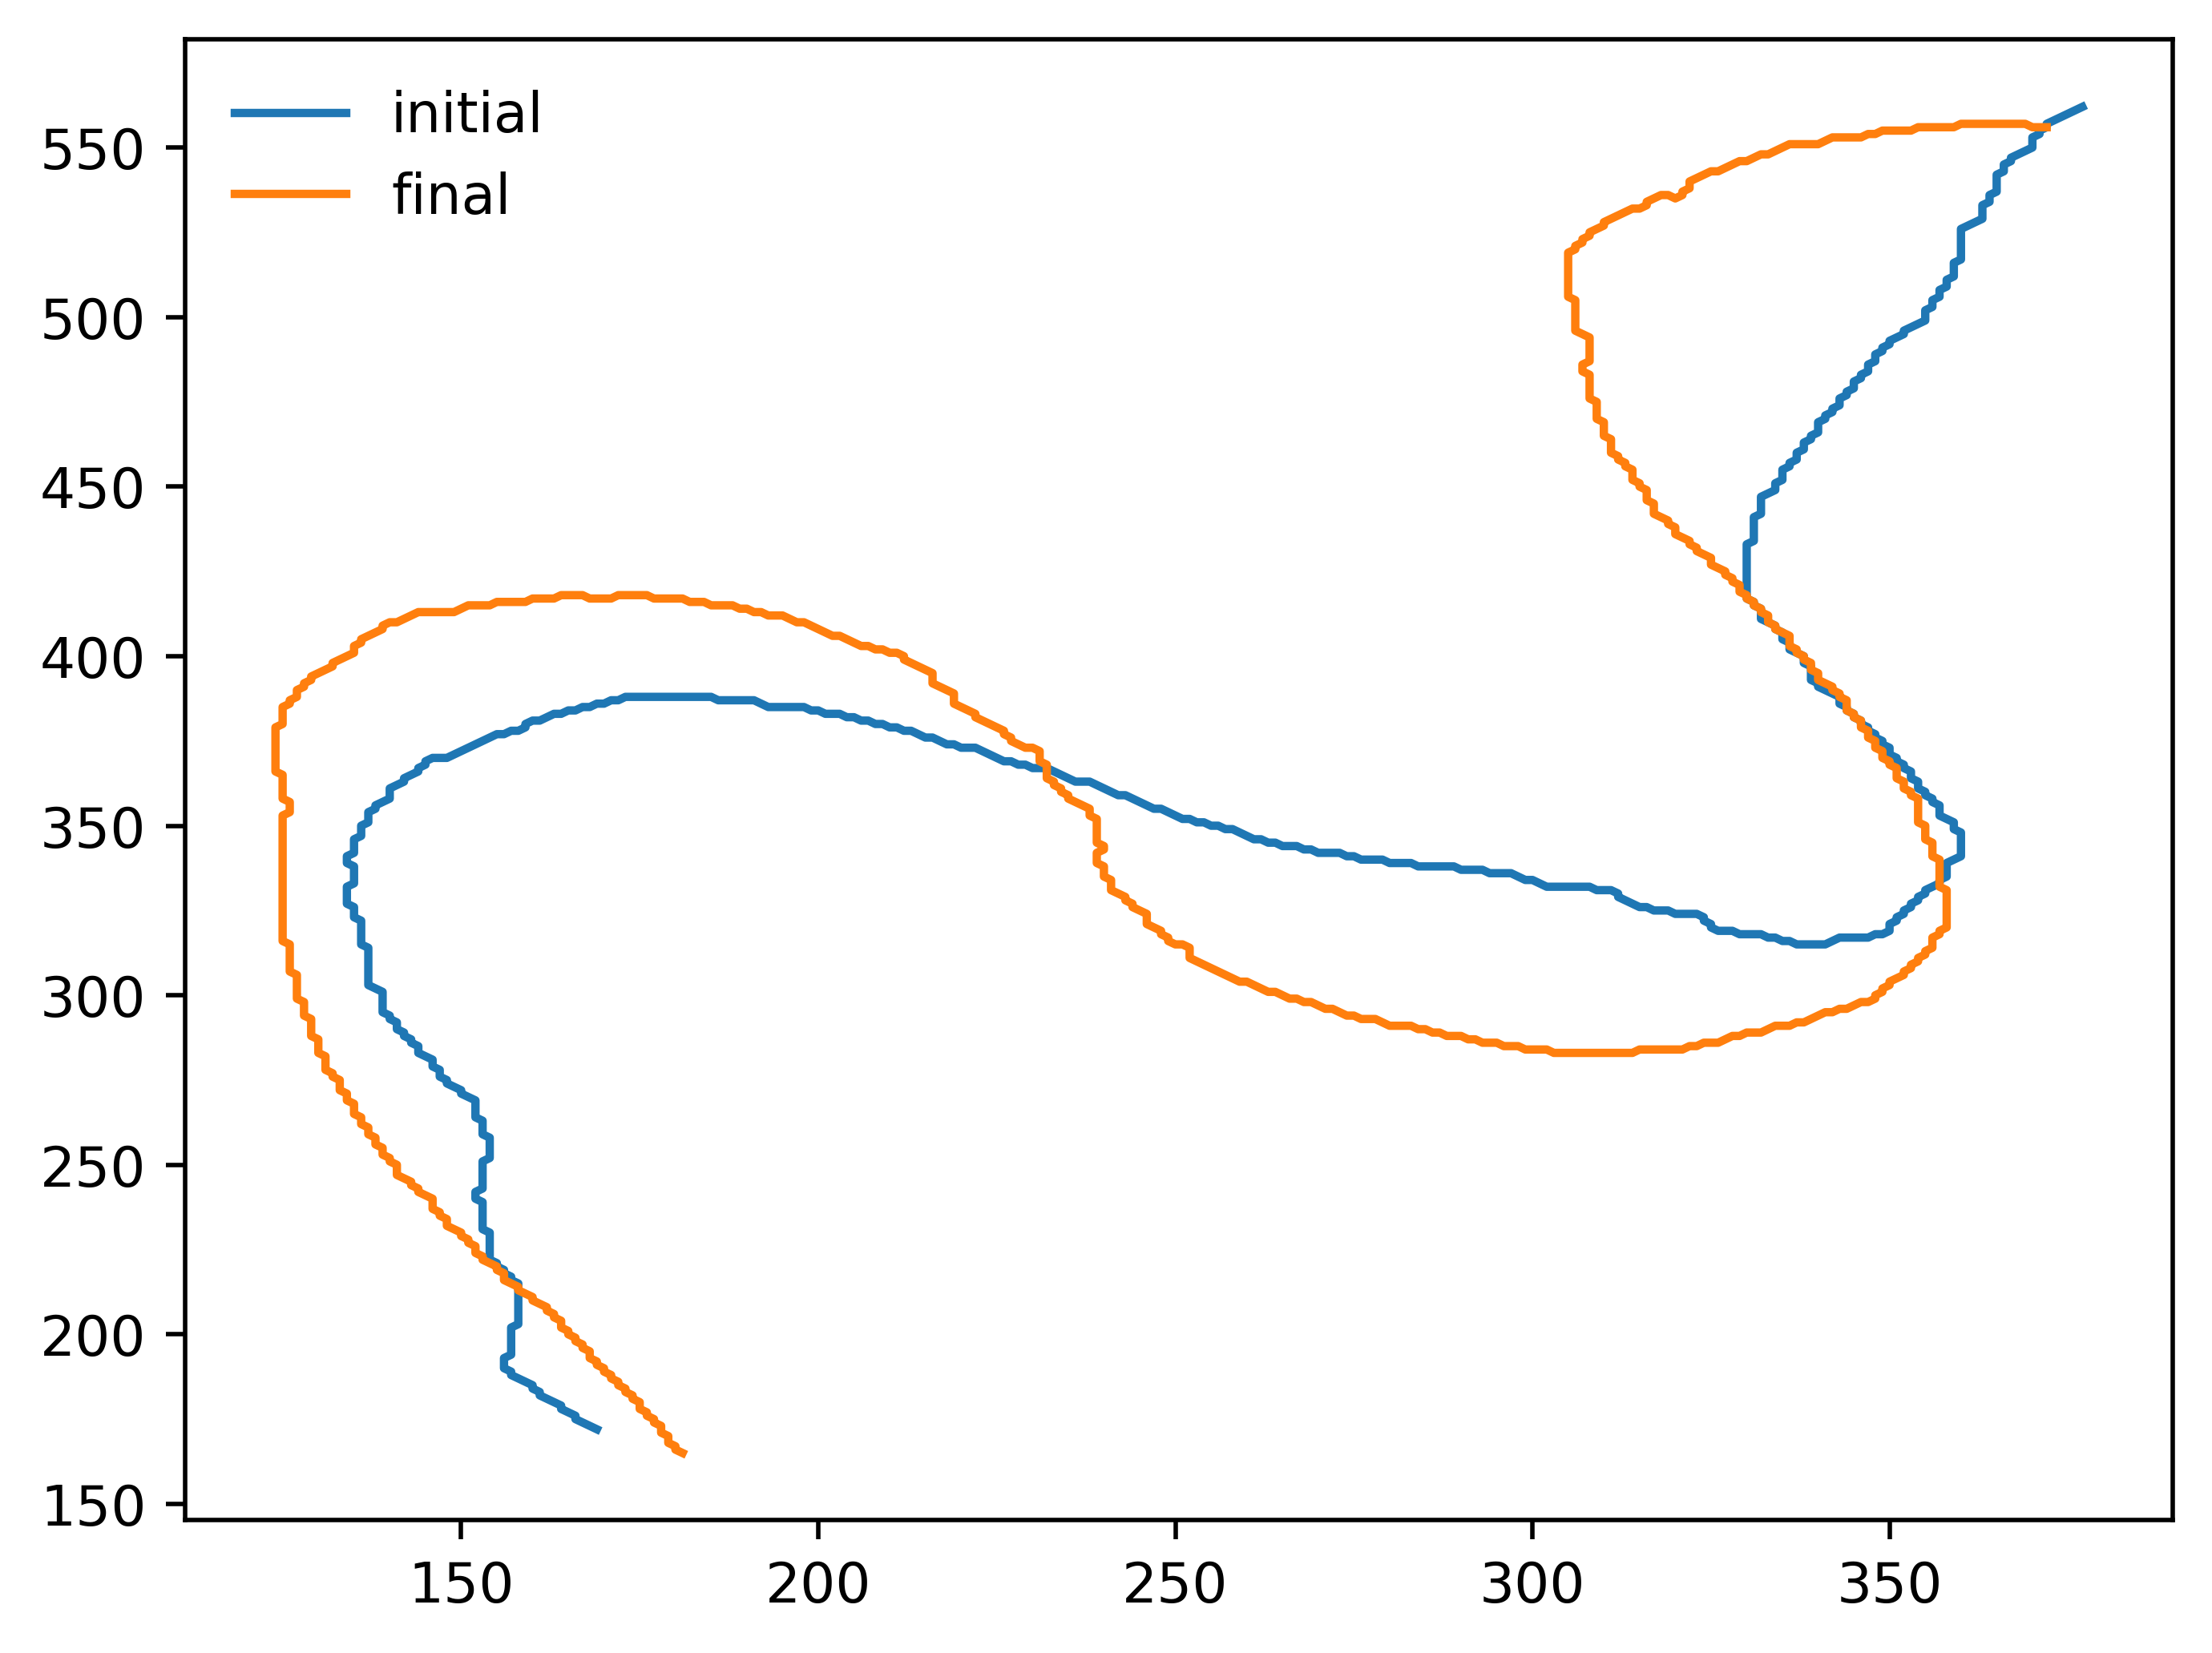

In [3]:
os.chdir(r"/Users/braydennoh/Desktop/meanderpy/january/module2/edit/bend2")
cl1=np.loadtxt('0.2.txt',delimiter=' ')
cl2=np.loadtxt('10.2.txt',delimiter=' ')

y = cl1[:,0][::-1]
x = cl1[:,1][::-1]
y1 = cl2[:,0][::-1]
x1= cl2[:,1][::-1]

plt.plot(x,y,label = 'initial')
plt.plot(x1,y1,label = 'final')
plt.legend(frameon=False)

**Meanderpy Manual Calibration**

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.03it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 300.00000000000006 m/yr



/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/3775767205.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  synx = 0.1*chb.channels[np.int(nit-1)].x
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/3775767205.py:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

<AxesSubplot:xlabel='x'>

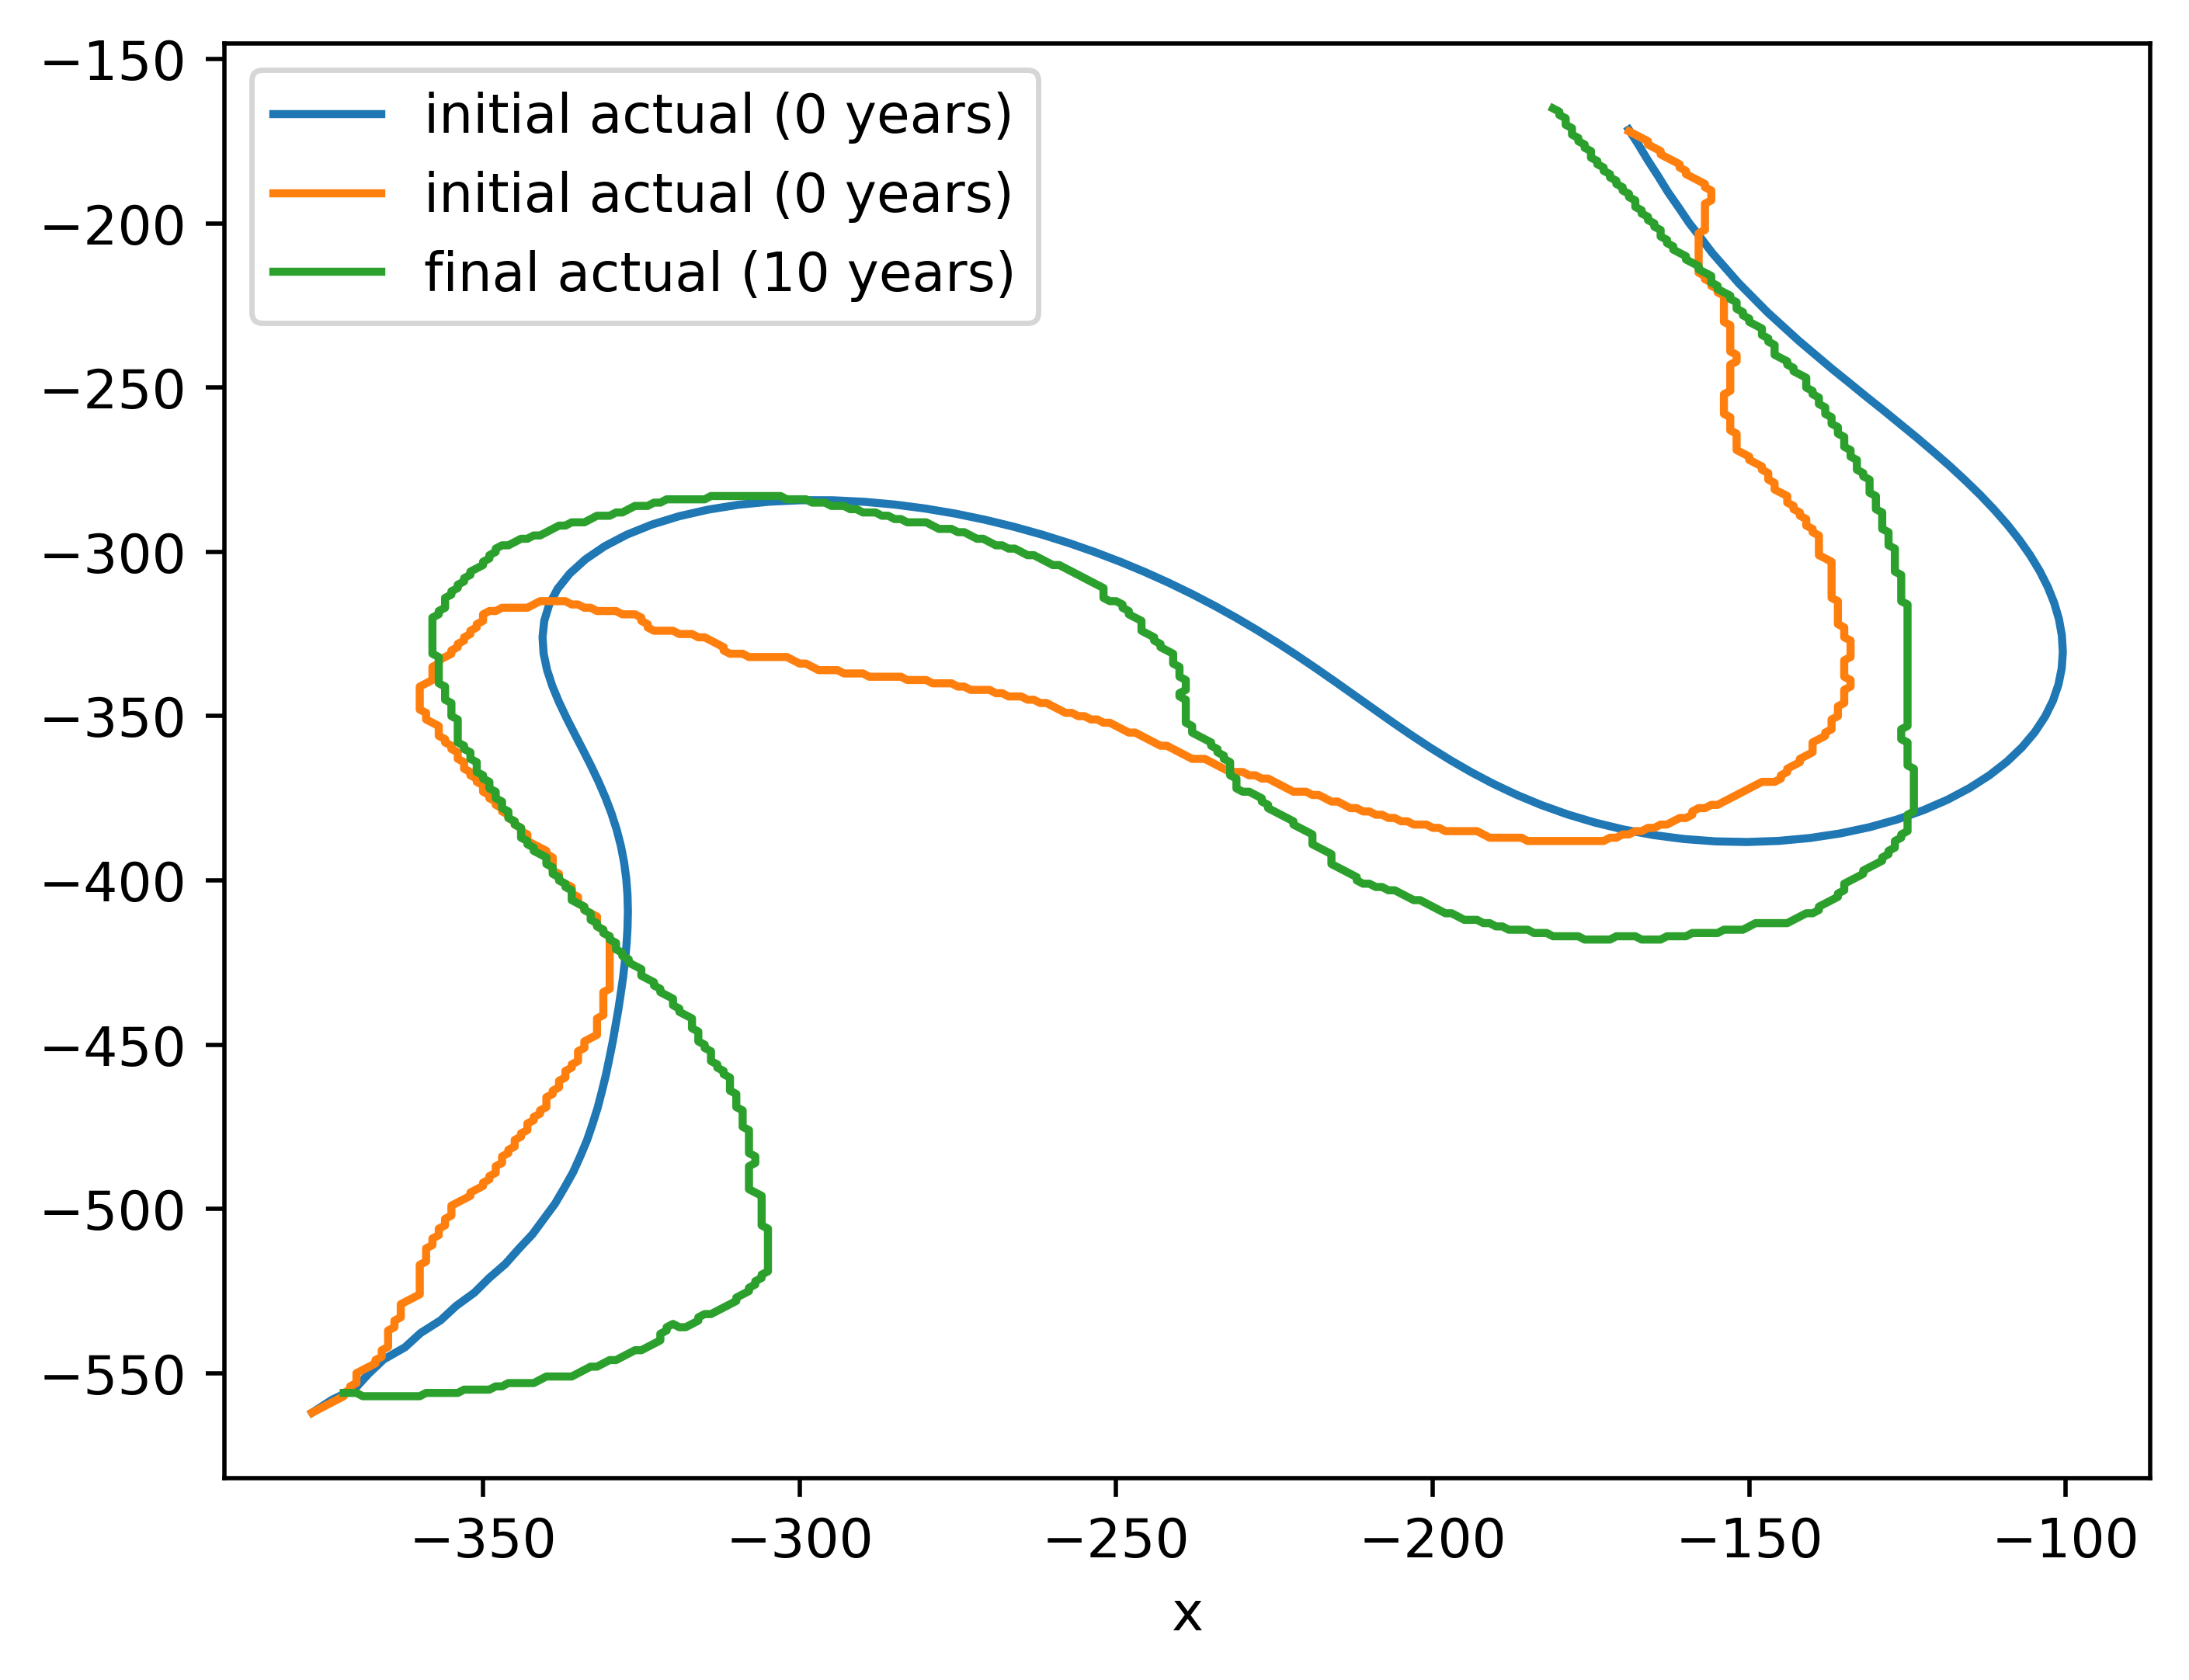

In [5]:
nit = 100                    # number of iterations
W = 100.0                    # channel width (m)
D = 10.0                      # channel depth (m)
depths = D * np.ones((nit,))  # channel depths for different iterations  
pad = 0# padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline           
Cfs = 0.01 * np.ones((nit,))
crdist = 1.8 * W               # threshold distance at which cutoffs occur
kl = 300/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 0.1*(365*24*60*60.0)      # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 1                # which time steps will be saved
Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
t1 = 0                    # time step when incision starts
t2 = 0                    # time step when lateral migration starts
t3 = 0     
aggr_factor = 2e-9            # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3) after t3)
sc = 1.0
y=cl1[:,0]*10
x=cl1[:,1]*10
z=np.zeros(len(x))
H=depths[0]

ch=mp.Channel(-x,-y,z,W,H)
chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])
chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
channel_coordinate = pd.DataFrame({"x":chb.channels[nit-1].x, "y":chb.channels[nit-1].y, "Z":chb.channels[nit-1].z}) # the way it work is this: chb.channels[i].x will give you the x coordinates for the ith time step
np.savetxt('output.txt', channel_coordinate, delimiter=',')

print('You are running this simulation for:', nit*dt/(365.*24*60*60),'Years')
print('Migration rate constant =', kl*60*60.*24.*365., 'm/yr')

synx = 0.1*chb.channels[np.int(nit-1)].x
syny = 0.1*chb.channels[np.int(nit-1)].y

np.savetxt('syn.txt', np.c_[syny,synx])
clsyn=np.loadtxt('syn.txt',delimiter=' ')
ax = pd.DataFrame({"x":clsyn[:,1], "y":clsyn[:,0]}).plot.line(x='x', y='y', label='initial actual (0 years)')
pd.DataFrame({"x":-cl1[:,1], "y":-cl1[:,0]}).plot.line(x='x', y='y', ax= ax, label='initial actual (0 years)')
pd.DataFrame({"x":-cl2[:,1], "y":-cl2[:,0]}).plot.line(x='x', y='y', ax= ax, label='final actual (10 years)')

**Interpolate Nodepoints**

In [6]:
t = np.linspace(0,1,np.shape(cl1[:,])[0]) # create a new variable t 
x_o = -cl1[:,1].flatten()            # get x-axis data
y_o = -cl1[:,0].flatten()            # get y-axis data
fx_o = interpolate.interp1d(t,x_o)      # initialize the interpolation class
fy_o = interpolate.interp1d(t, y_o)    
tnew = np.linspace(0,1,1000)                        # create a finer t-variable spacing 
xnew_o = fx_o(tnew)   # get interpolated x values
ynew_o = fy_o(tnew)   # get interpolated y values
data_obs_ins = np.array([xnew_o,ynew_o])
data_obs_ins = np.round(data_obs_ins, 2) 
#data_obs_ins =np.flip(data_obs_ins, axis=1)

t = np.linspace(0,1,np.shape(clsyn[:,])[0]) # create a new variable t 
x_o = clsyn[:,1].flatten()            # get x-axis data
y_o = clsyn[:,0].flatten()            # get y-axis data
fx_o = interpolate.interp1d(t,x_o)      # initialize the interpolation class
fy_o = interpolate.interp1d(t, y_o)    
tnew = np.linspace(0,1,1000)           # create a finer t-variable spacing 
xnew_o = fx_o(tnew)                     # get interpolated x values
ynew_o = fy_o(tnew)
data_obs = np.array([xnew_o,ynew_o])
data_obs = np.flip(data_obs, axis=1)
data_obs = np.round(data_obs, 1)
# modelled

t = np.linspace(0,1,np.shape(0.1*chb.channels[np.int(nit-1)].x)[0])
x_m = 0.1*chb.channels[np.int(nit-1)].x
y_m = 0.1*chb.channels[np.int(nit-1)].y
fx_m = interpolate.interp1d(t,x_m)
fy_m = interpolate.interp1d(t, y_m)
tnew = np.linspace(0,1,1000)
xnew_m = fx_m(tnew)
ynew_m = fy_m(tnew)
ynew_ms = ynew_m
xnew_ms = xnew_m

/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/816836832.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.linspace(0,1,np.shape(0.1*chb.channels[np.int(nit-1)].x)[0])
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/816836832.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. 

**Plotting Difference between Observed Final vs. Simulation**

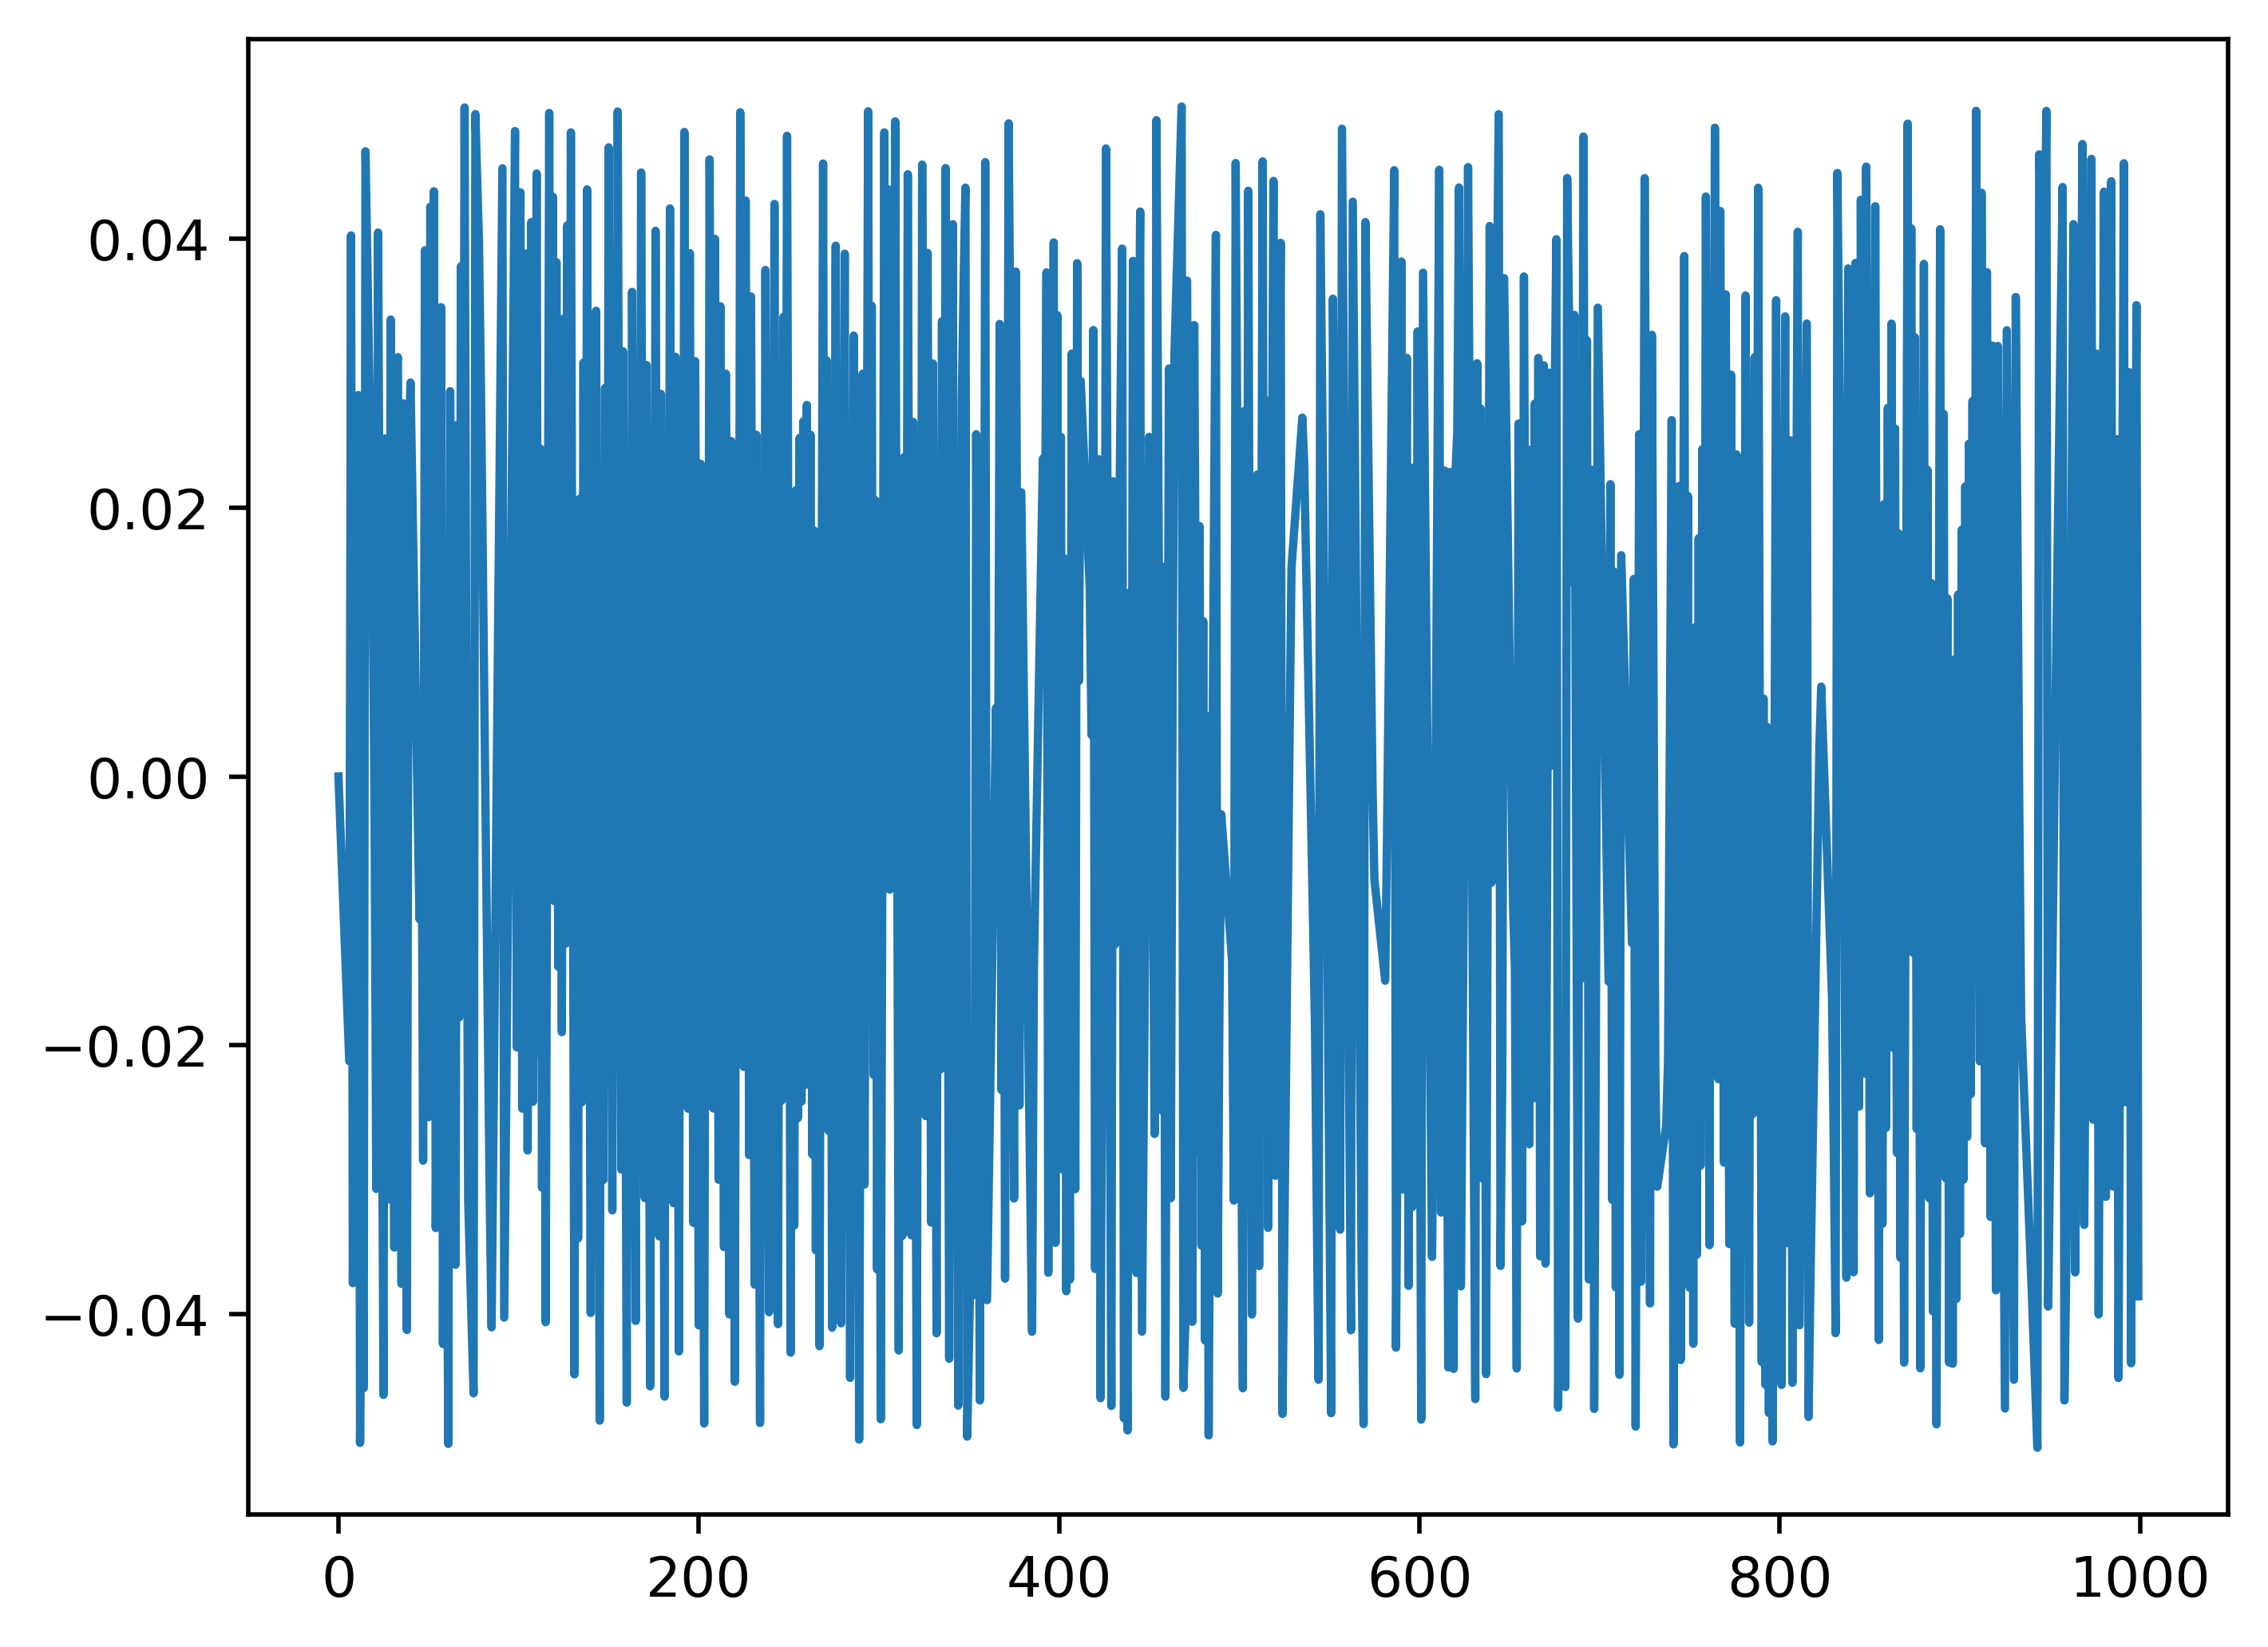

In [7]:
data_obs =np.flip(data_obs, axis=1)
err1 = data_obs_ins[0,:] - data_obs[0,:]
err2 = xnew_ms - data_obs[0,:]
plt.plot(ynew_ms - data_obs[1,:])

**Setting up Meanderpy for MCMC**

In [8]:
nit = 100                   
depths = D * np.ones((nit,)) 
pad = 0                 
deltas = 50.0               
crdist = 1.8 * W              
kv =  1.0e-12             
dt = 0.1*(365*24*60*60.0)    
dens = 1000               
saved_ts = 1              
n_bends = 5              
Sl = 0.0            
t1 = 0                  
t2 = 0                  
t3 = 0      

def hkm(parm):  
    kl =  (parm[0]*10)/(365*24*60*60.0)  
    Cfs = parm[1] * 0.001 * np.ones((nit,))
    y=cl1[:,0]*10
    x=cl1[:,1]*10
    z=np.zeros(len(x))
    H=depths[0]

    try:    
        ch=mp.Channel(-x,-y,z,W,H)
        chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])
        ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel
        chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration

        if np.shape(0.1*chb.channels[np.int(nit-1)].x)[0] < 1000:
            t = np.linspace(0,1,np.shape(0.1*chb.channels[np.int(nit-1)].x)[0])
            x_m = 0.1*chb.channels[np.int(nit-1)].x
            y_m = 0.1*chb.channels[np.int(nit-1)].y

            fx_m = interpolate.interp1d(t,x_m)
            fy_m = interpolate.interp1d(t, y_m)

            tnew = np.linspace(0,1,1000)
            xnew_m = fx_m(tnew) 
            ynew_m = fy_m(tnew) 
            xnew_m[:] = xnew_m[::-1] 
            ynew_m[:] = ynew_m[::-1] 
        
        else:
            t = np.linspace(0,1,1000)
            xnew_m = np.zeros(1000) 
            ynew_m = np.zeros(1000) 
            ynew_m[:] = ynew_m[::-1] 
            xnew_m[:] = xnew_m[::-1] 

    except:
        t = np.linspace(0,1,1000)
        xnew_m = np.zeros(1000) 
        ynew_m = np.zeros(1000) 
        ynew_m[:] = ynew_m[::-1] 
        xnew_m[:] = xnew_m[::-1] 
        
    return np.array([xnew_m,ynew_m])

[25 10  1]
[25 10  1]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.20it/s]
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/115302430.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.shape(0.1*chb.channels[np.int(nit-1)].x)[0] < 1000:
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/115302430.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you m

-3848.0295884471975

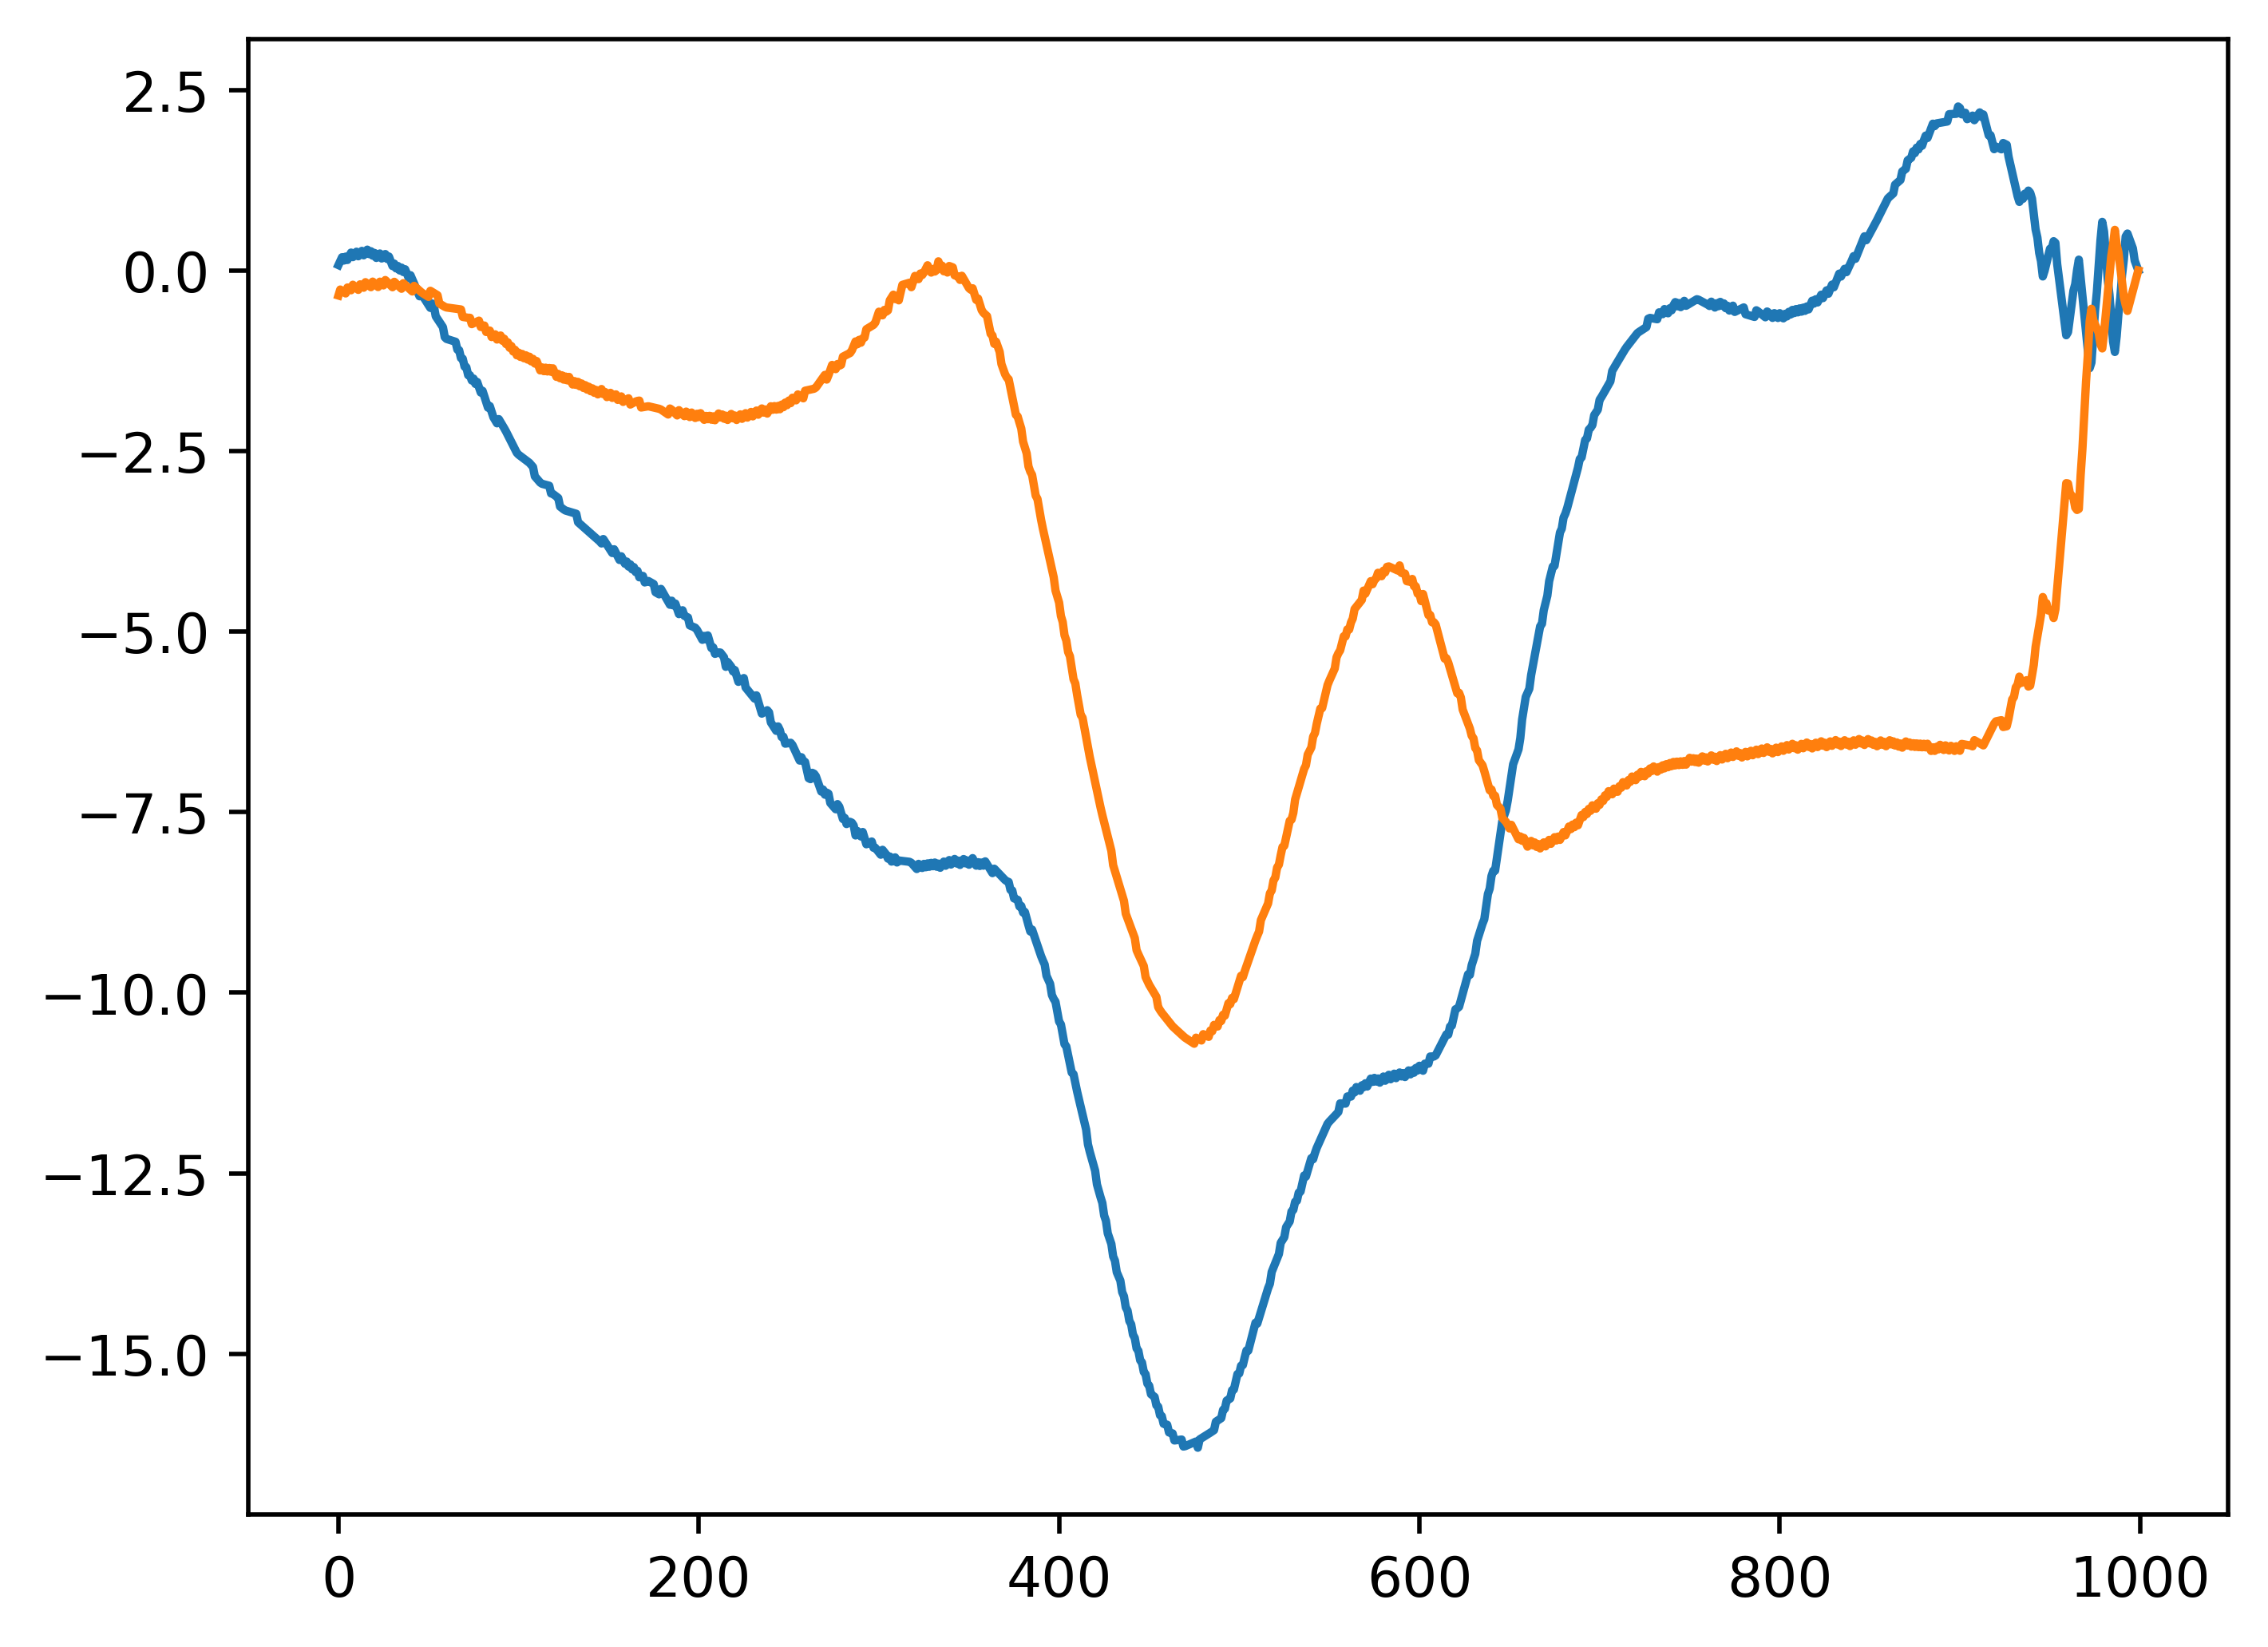

In [9]:
def log_prior(par):
    
    if  10 < par[0] < 100 and 0 < par[1] < 30 and 0.01 < par[2] < 10:   # define the bounds of the prior   
        return -par[2]/1                           # return the exponential distribution
    else:
        return -np.inf
    
def log_lik(par,data):
    print(par)
    sim = hkm(parm=par[:2])
    
    x_err = sim[0,:]-data[0,:][::-1]
    y_err = sim[1,:]-data[1,:][::-1]
    plt.plot(x_err) 
    plt.plot(y_err) 

    y_fft = np.fft.fft(y_err)  # do the fast fourier transform of y-errrors
    x_fft = np.fft.fft(x_err)  # do the fast fourier transform of x-errrors
    
    y_amp1 = 2*abs(y_fft.real/y_fft.size)      # retrieve amplitude of cos function
    y_amp2 = 2*abs(y_fft.imag/y_fft.size)      # retrieve amplitude of sin function
    x_amp1 = 2*abs(x_fft.real/x_fft.size)      # retrieve amplitude of cos function
    x_amp2 = 2*abs(x_fft.imag/x_fft.size)      # retrieve amplitude of sin function
    
    amp = np.array([y_amp1,y_amp2,x_amp1,x_amp2]) # write all four amplitudes in one array 
    
    return np.sum(np.log(stats.norm.pdf(amp, loc=0, scale=par[2]))) # evaluate the probability density of the amp array

def log_post(par, data):
    par = np.around(par, decimals = 0)
    print (par)
    if (log_prior(par)==-np.inf):
        lp = log_prior(par)
    else: 
        lp = log_lik(par,data)+ log_prior(par)
    return lp  

#Test Run
log_post([25,10 ,1],data_obs)

In [17]:
from scipy.stats import truncnorm
import emcee

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

ndim, nwalkers = 3, 40

X1 = get_truncated_normal(mean=10, sd=15, low=0, upp=50)
X2 = get_truncated_normal(mean=5, sd=10, low=0, upp=20)
X3 = get_truncated_normal(mean=2, sd=1, low=1, upp=5)

p0 = np.ones([nwalkers, ndim])
p0[:,0] = X1.rvs(size = nwalkers)
p0[:,1] = X2.rvs(size = nwalkers)
p0[:,2] = X3.rvs(size = nwalkers)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_post, args = [data_obs])

[ 2. 11.  1.]
[12.  9.  2.]
[12.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.43it/s]
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/115302430.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.shape(0.1*chb.channels[np.int(nit-1)].x)[0] < 1000:
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/115302430.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you m

[20. 20.  2.]
[20. 20.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.76it/s]


[25.  2.  2.]
[25.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.42it/s]


[11. 10.  1.]
[11. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.14it/s]


[19.  3.  1.]
[19.  3.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.04it/s]


[14.  2.  3.]
[14.  2.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.80it/s]


[12.  2.  2.]
[12.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.24it/s]


[25.  6.  3.]
[25.  6.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.56it/s]


[13. 20.  2.]
[13. 20.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.33it/s]


[15. 16.  3.]
[15. 16.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.07it/s]


[7. 9. 2.]
[ 8. 13.  2.]
[2. 1. 2.]
[12.  3.  4.]
[12.  3.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.19it/s]


[32.  7.  1.]
[32.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.60it/s]
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/3518805649.py:27: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(stats.norm.pdf(amp, loc=0, scale=par[2]))) # evaluate the probability density of the amp array


[4. 4. 1.]
[23. 14.  3.]
[23. 14.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.15it/s]


[ 7. 20.  3.]
[20.  2.  2.]
[20.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.61it/s]


[16. 18.  2.]
[16. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.05it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.56it/s]


[19.  2.  2.]
[19.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.91it/s]


[ 5. 15.  1.]
[18. 19.  2.]
[18. 19.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.81it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 649.86it/s]


[11.  7.  1.]
[11.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 619.18it/s]


[22.  5.  3.]
[22.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.94it/s]


[14. 10.  2.]
[14. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.04it/s]


[12. 15.  2.]
[12. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.07it/s]


[3. 4. 2.]
[23.  2.  2.]
[23.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 793.42it/s]


[12. 13.  2.]
[12. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.95it/s]


[14.  1.  2.]
[14.  1.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.97it/s]


[21. 15.  2.]
[21. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.97it/s]


[9. 9. 3.]
[15. 18.  2.]
[15. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.75it/s]


[17.  9.  1.]
[17.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.64it/s]


[23. 15.  3.]
[23. 15.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.08it/s]


[ 2. 10.  2.]
[13.  9.  2.]
[13.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.53it/s]


[ 3. 14.  1.]
[16.  1.  1.]
[16.  1.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.27it/s]


[11.  2.  1.]
[11.  2.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.85it/s]


[24.  8.  3.]
[24.  8.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.77it/s]


[ 9. 20.  2.]
[11.  4.  5.]
[11.  4.  5.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.05it/s]


[8. 4. 1.]
[22.  8.  3.]
[22.  8.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.19it/s]


[14. 18.  2.]
[14. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.37it/s]


[18.  6.  2.]
[18.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.63it/s]


[13.  7.  1.]
[13.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.89it/s]


[-6.  4.  1.]
[14.  8.  2.]
[14.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.40it/s]


[10. 15.  2.]
[15.  7.  3.]
[15.  7.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.14it/s]


[18. 21.  2.]
[18. 21.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.28it/s]


[24.  1. -0.]
[22. 24.  3.]
[22. 24.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.31it/s]
/Users/braydennoh/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


[ 3. 10.  2.]
[ 7. 10.  2.]
[35. 33.  2.]
[29.  0.  3.]
[ 7. -9.  2.]
[14. 21.  4.]
[14. 21.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.22it/s]


[1. 2. 2.]
[ 8. 13.  2.]
[-18.  -5.   2.]
[32.  7.  1.]
[32.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.00it/s]


[ 2. 35.  1.]
[18. -1.  2.]
[17.  3.  3.]
[17.  3.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.99it/s]


[-0. 13.  1.]
[19. 22.  1.]
[19. 22.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.92it/s]


[26.  7.  2.]
[26.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.06it/s]


[20.  7.  2.]
[20.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.54it/s]


[14. 12.  2.]
[14. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.39it/s]


[13. 14.  2.]
[13. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.82it/s]


[11. -7.  3.]
[20. 19.  2.]
[20. 19.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.40it/s]


[11.  8.  2.]
[11.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.18it/s]


[28. 24.  2.]
[28. 24.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.22it/s]


[ 7. 14.  1.]
[14.  6.  3.]
[14.  6.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.38it/s]


[4. 2. 1.]
[6. 8. 2.]
[11.  4.  4.]
[11.  4.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.22it/s]


[-3.  1.  0.]
[13. 15.  3.]
[13. 15.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.52it/s]


[31. 12.  2.]
[31. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.93it/s]


[21.  2.  2.]
[21.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.37it/s]


[-6. 11.  0.]
[20. 28.  1.]
[20. 28.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 675.12it/s]


[17.  8.  2.]
[17.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.95it/s]


[14. 12.  2.]
[14. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.64it/s]


[15. 17.  2.]
[15. 17.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.11it/s]


[ 14. -18.   2.]
[19. 23.  2.]
[19. 23.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.87it/s]


[23. 15.  3.]
[23. 15.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 656.99it/s]


[ 2. 10.  2.]
[ 2. 11.  1.]
[26. -9.  2.]
[21.  3.  2.]
[21.  3.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.47it/s]


[22.  9.  3.]
[22.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.98it/s]


[12. 24.  2.]
[12. 24.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.24it/s]


[16. 19.  3.]
[16. 19.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.25it/s]


[ 2. 16.  1.]
[2. 1. 2.]
[47. 10.  1.]
[47. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 478.10it/s]


[23.  2.  3.]
[23.  2.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.33it/s]


[19.  3.  2.]
[19.  3.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.53it/s]


[16. 18.  2.]
[16. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.07it/s]


[22.  5.  1.]
[22.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.94it/s]


[10. 10.  1.]
[20.  7.  2.]
[20.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.41it/s]


[1. 3. 2.]
[15.  8.  2.]
[15.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.36it/s]


[15.  9.  3.]
[15.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.86it/s]


[20. 25.  2.]
[20. 25.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.00it/s]


[15.  9.  1.]
[15.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.91it/s]


[27. 22.  2.]
[27. 22.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.56it/s]


[25.  2.  2.]
[25.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.49it/s]


[19.  3.  2.]
[19.  3.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.39it/s]


[18.  9.  2.]
[18.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.75it/s]


[18. 25.  2.]
[18. 25.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 605.35it/s]


[-7. -5.  2.]
[13.  5.  3.]
[13.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.45it/s]


[24.  7.  1.]
[24.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.93it/s]


[-0.  3.  1.]
[23.  2.  3.]
[23.  2.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.17it/s]


[16. 19.  2.]
[16. 19.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.68it/s]


[19.  2.  2.]
[19.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.32it/s]


[-5.  2.  2.]
[12. 14.  2.]
[12. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 640.43it/s]


[14.  4.  2.]
[14.  4.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.55it/s]


[33. 17.  3.]
[33. 17.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 607.87it/s]


[13.  9.  3.]
[13.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.93it/s]


[15. 18.  2.]
[15. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.94it/s]


[31. 21.  4.]
[31. 21.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.20it/s]


[1. 7. 2.]
[ 7. 12.  1.]
[13. 11.  1.]
[13. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.66it/s]


[ 5. 11.  0.]
[15.  8.  2.]
[15.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 344.06it/s]


[7. 3. 1.]
[15. 21.  3.]
[15. 21.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 673.47it/s]


[10. 14.  2.]
[-2. 17.  2.]
[13. 21.  3.]
[13. 21.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.68it/s]


[17.  3.  2.]
[17.  3.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 666.03it/s]


[39. 12.  2.]
[39. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 584.43it/s]


[ 5. 14.  1.]
[22. 26.  1.]
[22. 26.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 652.66it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.67it/s]


[14.  8.  1.]
[14.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.76it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.74it/s]


[23.  3.  3.]
[23.  3.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.68it/s]


[9. 8. 2.]
[15. 10.  2.]
[15. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.83it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.78it/s]


[ 3. 11.  1.]
[12. 12.  2.]
[12. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 662.08it/s]


[25.  1.  3.]
[25.  1.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.03it/s]


[22.  1.  3.]
[22.  1.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 810.38it/s]


[19. 21.  4.]
[19. 21.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.43it/s]


[12. 12.  2.]
[12. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.65it/s]


[6. 3. 2.]
[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.45it/s]


[21.  3.  3.]
[21.  3.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.07it/s]


[15. 14.  2.]
[15. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.65it/s]


[15.  2.  2.]
[15.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.99it/s]


[47. 11.  2.]
[47. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 408.28it/s]


[ 6. 14.  1.]
[19. 33.  1.]
[14.  6.  1.]
[14.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.80it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.02it/s]


[18.  7.  2.]
[18.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.89it/s]


[17. 10.  2.]
[17. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.59it/s]


[18.  4.  2.]
[18.  4.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.30it/s]


[18. 21.  2.]
[18. 21.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.92it/s]


[16.  9.  1.]
[16.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.23it/s]


[11. 10.  1.]
[11. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.56it/s]


[23. -0.  2.]
[20.  5.  3.]
[20.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.88it/s]


[20.  6.  2.]
[20.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.03it/s]


[11. 16.  2.]
[11. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.68it/s]


[12.  9.  2.]
[12.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.43it/s]


[9. 3. 4.]
[-1.  1.  1.]
[18. 21.  2.]
[18. 21.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.03it/s]


[21. -1.  3.]
[18.  8.  2.]
[18.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.96it/s]


[14. 14.  2.]
[14. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.71it/s]


[3. 7. 2.]
[ 8. 16.  1.]
[19. 16.  2.]
[19. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.48it/s]


[12. 10.  3.]
[12. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.52it/s]


[21. 10.  2.]
[21. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.94it/s]


[21. 12.  3.]
[21. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.02it/s]


[ 3. 12.  1.]
[ 5. 11.  2.]
[10. 10.  1.]
[6. 2. 1.]
[18. 11.  3.]
[18. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.19it/s]


[12.  9.  2.]
[12.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.89it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.46it/s]


[-2.  1.  2.]
[32. 10.  2.]
[32. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.50it/s]


[22. 28.  1.]
[22. 28.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.90it/s]


[20.  9.  2.]
[20.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.25it/s]


[18.  7.  2.]
[18.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.31it/s]


[15. 14.  2.]
[15. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.49it/s]


[-7.  6.  1.]
[17. 14.  2.]
[17. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.08it/s]


[11. 13.  1.]
[11. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.91it/s]


[21. -4.  2.]
[22. 14.  2.]
[22. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.21it/s]


[15.  9.  3.]
[15.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.90it/s]


[10. 24.  2.]
[21. 12.  3.]
[21. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.85it/s]


[16.  4.  1.]
[16.  4.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.07it/s]


[14. 13.  2.]
[14. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.82it/s]


[ 30. -16.   3.]
[19.  3.  1.]
[19.  3.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.14it/s]


[21.  9.  2.]
[21.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.46it/s]


[16. 13.  2.]
[16. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.42it/s]


[16. 16.  3.]
[16. 16.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.72it/s]


[19. 19.  1.]
[19. 19.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.47it/s]


[2. 2. 2.]
[13.  5.  3.]
[13.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.99it/s]


[17.  6.  2.]
[17.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 787.54it/s]


[13. 20.  2.]
[13. 20.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.61it/s]


[26.  2.  2.]
[26.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 791.14it/s]


[16. 20.  2.]
[16. 20.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.64it/s]


[19.  2.  2.]
[19.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 799.57it/s]


[13. 12.  1.]
[13. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.35it/s]


[18.  9.  1.]
[18.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.22it/s]


[42.  9.  3.]
[42.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 590.70it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.26it/s]


[ 5. 11.  2.]
[-1. 11.  1.]
[18.  7.  2.]
[18.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.83it/s]


[16. 10.  2.]
[16. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.99it/s]


[ 9. 14. -1.]
[19. 11.  2.]
[19. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.76it/s]


[11.  1.  1.]
[11.  1.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 798.83it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.40it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.77it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.50it/s]


[2. 0. 2.]
[28. 14.  1.]
[28. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.57it/s]


[14. 22.  2.]
[14. 22.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.44it/s]


[17. -4.  3.]
[13. 12.  1.]
[13. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.32it/s]


[15.  7.  1.]
[15.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 787.46it/s]


[3. 4. 2.]
[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.20it/s]


[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.35it/s]


[9. 9. 4.]
[16. 13.  2.]
[16. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.80it/s]


[22.  5.  2.]
[22.  5.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 785.92it/s]


[25. -3.  2.]
[20. 15.  2.]
[20. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.14it/s]


[13. 16.  3.]
[13. 16.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.54it/s]


[14.  5.  3.]
[14.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 794.33it/s]


[4. 3. 1.]
[14.  5.  2.]
[14.  5.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 791.57it/s]


[18. -1.  2.]
[16. 27.  2.]
[16. 27.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.94it/s]


[35. 11.  2.]
[35. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.05it/s]


[18. 18.  2.]
[18. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.80it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.45it/s]


[24. 15.  2.]
[24. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.64it/s]


[19.  6.  3.]
[19.  6.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.95it/s]


[11.  9.  2.]
[11.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.55it/s]


[19. 14.  1.]
[19. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.68it/s]


[12.  3.  2.]
[12.  3.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 799.09it/s]


[24. 14.  1.]
[24. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.57it/s]


[24. 14.  3.]
[24. 14.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.35it/s]


[ 8. 11.  1.]
[-1. 13.  1.]
[11. 11.  1.]
[11. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.69it/s]


[20.  1.  1.]
[20.  1.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 806.18it/s]


[12.  3.  1.]
[12.  3.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.26it/s]


[17. 11.  2.]
[17. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.26it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.07it/s]


[18. 26.  1.]
[18. 26.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.84it/s]


[7. 5. 2.]
[12.  4.  3.]
[12.  4.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.82it/s]


[26. 17. -1.]
[17.  4.  2.]
[17.  4.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.63it/s]


[18. -7.  2.]
[18. 28.  1.]
[18. 28.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.19it/s]


[19.  7.  2.]
[19.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.89it/s]


[20. 15.  1.]
[20. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.92it/s]


[16.  5.  2.]
[16.  5.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 793.50it/s]


[26. 15.  3.]
[26. 15.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.93it/s]


[16. 13.  2.]
[16. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.50it/s]


[19. 11.  1.]
[19. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.98it/s]


[25.  9.  3.]
[25.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.23it/s]


[16.  9.  1.]
[16.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.76it/s]


[16. 10.  2.]
[16. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.29it/s]


[24.  6.  2.]
[24.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.75it/s]


[24.  6.  2.]
[24.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 788.30it/s]


[16. 13.  2.]
[16. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.67it/s]


[13. 17.  3.]
[13. 17.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.39it/s]


[9. 3. 1.]
[16. 14.  2.]
[16. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.49it/s]


[21. 17.  1.]
[21. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.87it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.82it/s]


[19.  2.  2.]
[19.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 803.39it/s]


[15.  9.  1.]
[15.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.36it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.18it/s]


[18.  9.  1.]
[18.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.39it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.51it/s]


[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.44it/s]


[0. 3. 2.]
[16.  9.  2.]
[16.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.61it/s]


[16.  9.  3.]
[16.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.43it/s]


[-4. 14.  2.]
[16.  9.  2.]
[16.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 785.09it/s]


[19.  4.  1.]
[19.  4.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 795.87it/s]


[22.  9.  2.]
[22.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.39it/s]


[15. 11.  2.]
[15. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.89it/s]


[21. 25.  1.]
[21. 25.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.96it/s]


[-5. -2.  2.]
[12.  6.  3.]
[12.  6.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 792.54it/s]


[25. 15.  1.]
[25. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.03it/s]


[-1.  2.  1.]
[17.  6.  2.]
[17.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 790.32it/s]


[12. -5.  2.]
[16.  9.  1.]
[16.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.07it/s]


[17.  9.  1.]
[17.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.33it/s]


[18.  8.  3.]
[18.  8.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.07it/s]


[-10.  -4.   2.]
[17.  4.  2.]
[17.  4.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 797.93it/s]


[22. 14.  3.]
[22. 14.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.43it/s]


[16. 11.  3.]
[16. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.34it/s]


[16. 14.  2.]
[16. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.83it/s]


[28.  9.  3.]
[28.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.07it/s]


[ 0. 12.  1.]
[16.  9.  1.]
[16.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.17it/s]


[24.  6.  2.]
[24.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.86it/s]


[ 9. 12.  1.]
[12.  3.  1.]
[12.  3.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 796.91it/s]


[25. 16.  3.]
[25. 16.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.44it/s]


[15. 13.  2.]
[15. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.74it/s]


[21. 15.  2.]
[21. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.59it/s]


[11.  9.  2.]
[11.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.88it/s]


[20. 13.  1.]
[20. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.08it/s]


[43. 10.  2.]
[43. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 555.87it/s]


[18. -2.  2.]
[18. 17.  1.]
[18. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.50it/s]


[25. 13.  1.]
[25. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.15it/s]


[26. 11.  4.]
[26. 11.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.05it/s]


[16. 13.  2.]
[16. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.16it/s]


[17. 10.  2.]
[17. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.68it/s]


[20. 13.  2.]
[20. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.25it/s]


[18. 10.  1.]
[18. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.68it/s]


[5. 9. 2.]
[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.09it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.10it/s]


[13. 10.  1.]
[13. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.48it/s]


[13.  3.  1.]
[13.  3.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.39it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.00it/s]


[18.  7.  4.]
[18.  7.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.81it/s]


[9. 6. 1.]
[23. 14.  1.]
[23. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.29it/s]


[19.  2.  2.]
[19.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 808.36it/s]


[16. 11.  2.]
[16. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.10it/s]


[11. 19.  2.]
[11. 19.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.30it/s]


[23. 12.  2.]
[23. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.76it/s]


[21.  8.  3.]
[21.  8.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.80it/s]


[22. 13.  2.]
[22. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.95it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.11it/s]


[22. 13.  2.]
[22. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.99it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.67it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.85it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.94it/s]


[36. 14.  4.]
[36. 14.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.07it/s]


[ 4. 12.  1.]
[16. 10.  2.]
[16. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.66it/s]


[19.  4.  2.]
[19.  4.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.62it/s]


[18.  7.  2.]
[18.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.56it/s]


[17.  8.  2.]
[17.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.46it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.85it/s]


[14. 11.  1.]
[14. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.09it/s]


[21. 25.  1.]
[21. 25.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.28it/s]


[3. 2. 2.]
[28. 14.  0.]
[17.  8.  2.]
[17.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.57it/s]


[14.  9.  2.]
[14.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.95it/s]


[17. -3.  2.]
[38. 11.  2.]
[38. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 247.20it/s]


[25. 17.  1.]
[25. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.24it/s]


[17. 10.  1.]
[17. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.02it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.03it/s]


[7. 8. 2.]
[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.90it/s]


[ 7. 10.  2.]
[ 7. 12.  1.]
[15. 11.  2.]
[15. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.18it/s]


[15. 11.  1.]
[15. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.45it/s]


[20.  8.  2.]
[20.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.02it/s]


[10.  1.  1.]
[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.44it/s]


[18. 14.  2.]
[18. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.54it/s]


[20. 20.  1.]
[20. 20.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.39it/s]


[7. 3. 2.]
[15.  8.  3.]
[15.  8.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.81it/s]


[7. 6. 1.]
[16. 15.  2.]
[16. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.80it/s]


[15. -2.  2.]
[20. 13.  2.]
[20. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.03it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.22it/s]


[19.  9.  2.]
[19.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.26it/s]


[25. 13.  1.]
[25. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.39it/s]


[16.  7.  2.]
[16.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.69it/s]


[14. 14.  2.]
[14. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.42it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.26it/s]


[18.  9.  2.]
[18.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.22it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.44it/s]


[20.  5.  1.]
[20.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 790.58it/s]


[21. 16.  2.]
[21. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.02it/s]


[13. 10.  1.]
[13. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.53it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.04it/s]


[16.  8.  2.]
[16.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.79it/s]


[11.  2.  2.]
[11.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 792.85it/s]


[30. 29.  2.]
[30. 29.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.85it/s]


[18.  6. -0.]
[20. 10.  2.]
[20. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.05it/s]


[26. 18.  2.]
[26. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.84it/s]


[5. 6. 2.]
[16.  7.  1.]
[16.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.52it/s]


[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.20it/s]


[20. 12.  2.]
[20. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.67it/s]


[13. 10.  3.]
[13. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.60it/s]


[24. 11. -0.]
[34.  9.  4.]
[34.  9.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.64it/s]


[ 8. 11.  2.]
[20.  9.  2.]
[20.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.00it/s]


[16. 10.  2.]
[16. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.09it/s]


[39.  7.  1.]
[39.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 677.04it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.50it/s]


[7. 7. 1.]
[18. 15.  2.]
[18. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.94it/s]


[ 2. -4.  2.]
[14.  7.  3.]
[14.  7.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 790.08it/s]


[27. 14.  1.]
[27. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.53it/s]


[9. 7. 1.]
[18.  8.  2.]
[18.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.16it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.87it/s]


[34. 10.  2.]
[34. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.37it/s]


[ 7. -3.  2.]
[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.90it/s]


[14. 11.  1.]
[14. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.13it/s]


[21. 17.  1.]
[21. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.65it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.84it/s]


[16. 19.  2.]
[16. 19.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.46it/s]


[29.  9.  3.]
[29.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.54it/s]


[ 5. 11.  1.]
[13. 11.  1.]
[13. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.37it/s]


[23. -0.  1.]
[18. 15.  1.]
[18. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.28it/s]


[21. 15.  2.]
[21. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.52it/s]


[17. 18.  1.]
[17. 18.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.87it/s]


[19. 16.  2.]
[19. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.42it/s]


[17.  3.  2.]
[17.  3.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 804.20it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.71it/s]


[14. 10.  1.]
[14. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.85it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.07it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.38it/s]


[21. 10.  2.]
[21. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.67it/s]


[17.  8.  2.]
[17.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.43it/s]


[16. 11.  2.]
[16. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.57it/s]


[3. 4. 2.]
[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.51it/s]


[23. 13.  2.]
[23. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.44it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.52it/s]


[ 6. 11.  2.]
[-10.  10.   1.]
[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.20it/s]


[13. 10.  1.]
[13. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.27it/s]


[19.  5.  1.]
[19.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.52it/s]


[20.  9.  2.]
[20.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.68it/s]


[25. 21.  1.]
[25. 21.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.49it/s]


[17. 11.  2.]
[17. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.26it/s]


[16.  8.  1.]
[16.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.35it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.45it/s]


[16. 10.  1.]
[16. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.09it/s]


[17. 18.  1.]
[17. 18.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.36it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.67it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.90it/s]


[17.  8.  2.]
[17.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.21it/s]


[19. 16.  1.]
[19. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.82it/s]


[2. 4. 2.]
[37. 21.  3.]
[37. 21.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.70it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.23it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.16it/s]


[-11.  16.   2.]
[15. 10.  1.]
[15. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.19it/s]


[31.  6.  1.]
[31.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.10it/s]


[14.  6.  1.]
[14.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.33it/s]


[18. 12.  3.]
[18. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.57it/s]


[22. 15.  2.]
[22. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 228.70it/s]


[21. 21.  1.]
[21. 21.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 635.59it/s]


[-7. -0.  2.]
[15.  5.  3.]
[15.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.66it/s]


[34. 15.  0.]
[3. 4. 1.]
[11. 11.  2.]
[11. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.08it/s]


[17.  2.  2.]
[17.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.79it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 626.74it/s]


[11. -2.  2.]
[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.33it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 659.10it/s]


[20. 14.  2.]
[20. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 612.24it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.31it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.96it/s]


[37.  4.  5.]
[37.  4.  5.]


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 97.84it/s]


[12. 10.  2.]
[12. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.42it/s]


[ 7. 10.  2.]
[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.43it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.98it/s]


[10.  8.  1.]
[20. 21.  1.]
[20. 21.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.50it/s]


[9. 5. 2.]
[29. 15.  0.]
[-8.  4.  1.]
[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.94it/s]


[13.  6.  2.]
[13.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.42it/s]


[19. 21.  2.]
[19. 21.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.68it/s]


[17. 10.  1.]
[17. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.80it/s]


[20. 21.  0.]
[9. 4. 2.]
[16. 11.  1.]
[16. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.73it/s]


[20. 13.  2.]
[20. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.44it/s]


[24. 14.  2.]
[24. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.35it/s]


[13. 14.  2.]
[13. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.65it/s]


[25. 10.  3.]
[25. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.10it/s]


[19. 11.  1.]
[19. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.64it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.64it/s]


[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.51it/s]


[19.  3.  1.]
[19.  3.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 788.19it/s]


[20. 10.  2.]
[20. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.55it/s]


[10.  6.  1.]
[22. 15.  2.]
[22. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.21it/s]


[15.  7.  3.]
[15.  7.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.88it/s]


[16.  9.  1.]
[16.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.69it/s]


[13. 13.  2.]
[13. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.70it/s]


[17.  3.  2.]
[17.  3.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 797.34it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.68it/s]


[14. 10.  1.]
[14. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.52it/s]


[33.  4. -0.]
[25. 12.  2.]
[25. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.18it/s]


[29. 11.  3.]
[29. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.89it/s]


[22. 13.  2.]
[22. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.89it/s]


[14. 10.  2.]
[14. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.42it/s]


[23. 12.  2.]
[23. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.64it/s]


[-13.   7.   1.]
[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.78it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 598.42it/s]


[24.  1.  1.]
[24.  1.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.33it/s]


[12.  4.  1.]
[12.  4.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.57it/s]


[18. 14.  2.]
[18. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.35it/s]


[23. 16.  2.]
[23. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.69it/s]


[14. 11.  1.]
[14. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.17it/s]


[17.  9.  2.]
[17.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.21it/s]


[36. 16. -1.]
[18. -1.  2.]
[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.67it/s]


[34. 10.  2.]
[34. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 668.92it/s]


[22. 13.  1.]
[22. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.16it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.26it/s]


[17. 11.  2.]
[17. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.60it/s]


[18.  9.  2.]
[18.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.23it/s]


[27. 24.  0.]
[19. 15.  1.]
[19. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.62it/s]


[40. 16.  1.]
[40. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 575.76it/s]


[26.  9.  3.]
[26.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.16it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.74it/s]


[17.  8.  2.]
[17.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.00it/s]


[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.01it/s]


[23.  9.  2.]
[23.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.71it/s]


[18. 14.  2.]
[18. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.61it/s]


[19. 17.  1.]
[19. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.58it/s]


[-23. -11.   3.]
[-2.  2.  1.]
[18.  6.  1.]
[18.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.57it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.26it/s]


[11.  5.  2.]
[11.  5.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 793.18it/s]


[18. 17.  1.]
[18. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.67it/s]


[32. 12.  0.]
[14.  8.  2.]
[14.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.48it/s]


[16. 11.  1.]
[16. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.90it/s]


[23. 13.  2.]
[23. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.51it/s]


[23. 13.  3.]
[23. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.05it/s]


[13. 11.  3.]
[13. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.62it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.22it/s]


[-10.   9.   2.]
[ 5. 13.  2.]
[15. 11.  1.]
[15. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.97it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.72it/s]


[20.  3.  1.]
[20.  3.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 804.54it/s]


[20. 13.  1.]
[20. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.15it/s]


[13.  5.  1.]
[13.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.95it/s]


[15. 17.  1.]
[15. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.97it/s]


[24. 17.  2.]
[24. 17.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.50it/s]


[14. 11.  1.]
[14. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.99it/s]


[19. 17.  1.]
[19. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.47it/s]


[28. 18.  0.]
[16.  9.  1.]
[16.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.32it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.25it/s]


[24.  8.  1.]
[24.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.35it/s]


[27. 12.  2.]
[27. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.85it/s]


[18.  8.  1.]
[18.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.73it/s]


[26. 16.  1.]
[26. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.48it/s]


[23. 13.  2.]
[23. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.05it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.86it/s]


[ 4. 10.  2.]
[17. 13.  1.]
[17. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.63it/s]


[22.  9.  1.]
[22.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.04it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.71it/s]


[3. 2. 2.]
[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.09it/s]


[7. 6. 1.]
[17.  2.  2.]
[17.  2.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 799.99it/s]


[10.  4.  2.]
[25. 19.  1.]
[25. 19.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.14it/s]


[17. 20.  2.]
[17. 20.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.87it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.35it/s]


[26. 10.  3.]
[26. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.60it/s]


[17.  9.  2.]
[17.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.34it/s]


[20. 14.  1.]
[20. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.13it/s]


[13.  8.  2.]
[13.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.34it/s]


[23. 16.  1.]
[23. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.67it/s]


[23. 12.  2.]
[23. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.78it/s]


[16. 11.  2.]
[16. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.42it/s]


[21. 15.  2.]
[21. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.69it/s]


[28.  9.  3.]
[28.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.97it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.43it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.53it/s]


[17. 16.  2.]
[17. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.54it/s]


[12.  4.  1.]
[12.  4.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 791.54it/s]


[14.  8.  3.]
[14.  8.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.27it/s]


[17. 15.  2.]
[17. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.98it/s]


[8. 2. 2.]
[25. 12.  1.]
[25. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.09it/s]


[3. 4. 1.]
[15.  7.  1.]
[15.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.31it/s]


[19. 12.  1.]
[19. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.38it/s]


[26. 12.  2.]
[26. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.44it/s]


[16.  5.  2.]
[16.  5.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.66it/s]


[24. 16.  1.]
[24. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.50it/s]


[18.  6.  1.]
[18.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 785.21it/s]


[15.  9.  2.]
[15.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.44it/s]


[16. 11.  1.]
[16. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.59it/s]


[19. 17.  2.]
[19. 17.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.04it/s]


[17. 11.  2.]
[17. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.64it/s]


[26.  9.  3.]
[26.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.20it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.78it/s]


[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.49it/s]


[19. 11.  2.]
[19. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.61it/s]


[17.  5.  2.]
[17.  5.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.49it/s]


[22. 18.  1.]
[22. 18.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.93it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.89it/s]


[24. 18.  1.]
[24. 18.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.18it/s]


[ 9. 10.  3.]
[17.  6.  2.]
[17.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 785.59it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.62it/s]


[18. 16.  1.]
[18. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.81it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.65it/s]


[23. 12.  2.]
[23. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.78it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.64it/s]


[20. 15.  1.]
[20. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.57it/s]


[26. 13.  2.]
[26. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.85it/s]


[24. 13.  3.]
[24. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.92it/s]


[17. 15.  2.]
[17. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.57it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.64it/s]


[4. 9. 2.]
[19. 12.  1.]
[19. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.91it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.49it/s]


[14.  4.  1.]
[14.  4.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 793.61it/s]


[22. 13.  2.]
[22. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.18it/s]


[8. 3. 1.]
[17. 11.  2.]
[17. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.83it/s]


[18. 15.  2.]
[18. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.17it/s]


[17. 20.  2.]
[17. 20.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.29it/s]


[16.  9.  2.]
[16.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.46it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.79it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.75it/s]


[16.  8.  2.]
[16.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.24it/s]


[27. 13.  3.]
[27. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.25it/s]


[19. 15.  1.]
[19. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.72it/s]


[16. 10.  2.]
[16. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.44it/s]


[17.  9.  1.]
[17.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.97it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.75it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.98it/s]


[40.  8.  5.]
[40.  8.  5.]


100%|█████████████████████████████████████████| 100/100 [05:00<00:00,  3.01s/it]


[ 2. 12.  2.]
[15. 10.  2.]
[15. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.94it/s]


[21. 12.  2.]
[21. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.14it/s]


[20. 11.  1.]
[20. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.26it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.04it/s]


[12. 11.  1.]
[12. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.30it/s]


[-16.  -7.   1.]
[11.  8.  2.]
[11.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 787.73it/s]


[17. 12.  1.]
[17. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.70it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.66it/s]


[18.  8.  2.]
[18.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.42it/s]


[39. 10.  2.]
[39. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 614.16it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.06it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.30it/s]


[27.  7.  1.]
[27.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.57it/s]


[18.  9.  1.]
[18.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.99it/s]


[15. 12.  2.]
[15. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.90it/s]


[21. 13.  1.]
[21. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.84it/s]


[24. 12.  2.]
[24. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.24it/s]


[22. 14.  2.]
[22. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.76it/s]


[16. 13.  3.]
[16. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.76it/s]


[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.51it/s]


[21. -1.  1.]
[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.01it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.69it/s]


[18. 15.  1.]
[18. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.57it/s]


[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.60it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.08it/s]


[9. 9. 2.]
[30.  9.  0.]
[23.  9.  2.]
[23.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.61it/s]


[17.  7.  2.]
[17.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 787.84it/s]


[24. 12.  1.]
[24. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.54it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.63it/s]


[19. 13.  2.]
[19. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.36it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.74it/s]


[30. 14.  2.]
[30. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.39it/s]


[23. 13.  3.]
[23. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.91it/s]


[13. 11.  2.]
[13. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.46it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.89it/s]


[37.  7.  4.]
[37.  7.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 651.36it/s]


[16. 11.  2.]
[16. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.48it/s]


[19.  8.  1.]
[19.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.51it/s]


[31.  8.  0.]
[22.  8.  1.]
[22.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.73it/s]


[11.  7.  1.]
[11.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 788.82it/s]


[17.  7.  2.]
[17.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.79it/s]


[19. 12.  1.]
[19. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.05it/s]


[19. 15.  2.]
[19. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.16it/s]


[-5. -3.  2.]
[12. 11.  0.]
[19. 11.  2.]
[19. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.77it/s]


[18.  8.  2.]
[18.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.35it/s]


[16. 17. -0.]
[18. 12.  1.]
[18. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.13it/s]


[22. 13.  3.]
[22. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.37it/s]


[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.53it/s]


[21.  9.  1.]
[21.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.87it/s]


[22. 14.  1.]
[22. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.71it/s]


[19. 15.  2.]
[19. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.37it/s]


[-12.   8.   2.]
[19.  7.  2.]
[19.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.85it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.19it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.80it/s]


[19. 15.  1.]
[19. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.24it/s]


[-3. -2.  2.]
[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.53it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.56it/s]


[-3.  5.  1.]
[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.02it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.72it/s]


[15.  6.  2.]
[15.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.65it/s]


[22. 13.  1.]
[22. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.26it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.12it/s]


[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.27it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.57it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.49it/s]


[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.33it/s]


[25. 14.  2.]
[25. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.32it/s]


[13. 14.  2.]
[13. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.60it/s]


[29.  9.  3.]
[29.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.53it/s]


[24. 16.  2.]
[24. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.05it/s]


[19. 12.  1.]
[19. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.98it/s]


[19. 11.  2.]
[19. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.10it/s]


[30.  8.  0.]
[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.97it/s]


[14. 13.  0.]
[11.  4.  1.]
[11.  4.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 790.31it/s]


[18. 14.  2.]
[18. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.54it/s]


[19. 12.  1.]
[19. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.91it/s]


[15. 13.  1.]
[15. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.10it/s]


[28.  7.  1.]
[28.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.48it/s]


[38. 10.  2.]
[38. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.36it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.49it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.25it/s]


[24. 12.  2.]
[24. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.26it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.23it/s]


[22. 13.  2.]
[22. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.59it/s]


[16. 12.  3.]
[16. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.35it/s]


[30.  7.  1.]
[30.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.18it/s]


[ 1. 10.  2.]
[20. 13.  1.]
[20. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.40it/s]


[31.  8.  0.]
[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.74it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.34it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.74it/s]


[12.  6.  2.]
[12.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.40it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.60it/s]


[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.73it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.85it/s]


[37. 10.  2.]
[37. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 676.23it/s]


[15.  9.  3.]
[15.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.56it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.95it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.48it/s]


[13. 12.  1.]
[13. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.77it/s]


[19. 14.  1.]
[19. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.25it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.10it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.20it/s]


[23. 14.  1.]
[23. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.02it/s]


[23. 13.  2.]
[23. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.46it/s]


[ 9. 11.  2.]
[15. 10.  2.]
[15. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.47it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.27it/s]


[16.  2.  1.]
[16.  2.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 797.26it/s]


[8. 5. 1.]
[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.11it/s]


[22. 14.  2.]
[22. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.10it/s]


[17. 11.  2.]
[17. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.53it/s]


[20. 17.  1.]
[20. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.39it/s]


[19. 11.  2.]
[19. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.89it/s]


[12.  8.  2.]
[12.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.77it/s]


[ 9. 12.  2.]
[15. 12.  2.]
[15. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.17it/s]


[25. 13.  1.]
[25. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.90it/s]


[26. 12.  3.]
[26. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.67it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.24it/s]


[26. 12.  4.]
[26. 12.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.87it/s]


[16. 10.  3.]
[16. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.96it/s]


[16. 13.  2.]
[16. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.23it/s]


[28.  7.  1.]
[28.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.39it/s]


[28.  8.  4.]
[28.  8.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.95it/s]


[14. 10.  2.]
[14. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.98it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.01it/s]


[33. 12.  1.]
[33. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.39it/s]


[5. 6. 1.]
[18. 18.  2.]
[18. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.96it/s]


[16. 16.  2.]
[16. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.35it/s]


[19. 16.  1.]
[19. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.10it/s]


[12.  6.  2.]
[12.  6.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 788.03it/s]


[29. 15.  1.]
[29. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.48it/s]


[13. 13.  1.]
[13. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.15it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.45it/s]


[36. 10.  2.]
[36. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.15it/s]


[26. 12.  1.]
[26. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.46it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.64it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.66it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.30it/s]


[24. 13.  2.]
[24. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.93it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.48it/s]


[34. 12.  4.]
[34. 12.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 672.54it/s]


[ 2. 10.  2.]
[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.87it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.38it/s]


[21. -0.  1.]
[17. 10.  2.]
[17. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.05it/s]


[21. 12.  2.]
[21. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.39it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.09it/s]


[20. 11.  2.]
[20. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.01it/s]


[10. 10.  2.]
[18. 12.  1.]
[18. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.41it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.73it/s]


[11.  5.  3.]
[11.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.71it/s]


[14. 12.  1.]
[14. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.76it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.28it/s]


[24. 12.  2.]
[24. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.17it/s]


[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.36it/s]


[20. 13.  1.]
[20. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.67it/s]


[20. 15.  2.]
[20. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.84it/s]


[21. 16.  3.]
[21. 16.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.97it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.14it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.14it/s]


[14. 11.  2.]
[14. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.74it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.94it/s]


[23.  8.  1.]
[23.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.07it/s]


[19.  6.  1.]
[19.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.69it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.82it/s]


[19. 18.  2.]
[19. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.60it/s]


[14.  8.  2.]
[14.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.11it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.99it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.60it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.41it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.60it/s]


[18.  9.  2.]
[18.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.59it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.20it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.26it/s]


[24. 12.  2.]
[24. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.46it/s]


[13. 13.  1.]
[13. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.68it/s]


[25. 15.  1.]
[25. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.59it/s]


[23. 13.  2.]
[23. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.91it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.27it/s]


[-12.   9.   2.]
[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.53it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.01it/s]


[13.  5.  1.]
[13.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.10it/s]


[20. 13.  2.]
[20. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.06it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.18it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.95it/s]


[19. 12.  1.]
[19. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.74it/s]


[21. 11.  2.]
[21. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.15it/s]


[13.  8.  2.]
[13.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.96it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.98it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.81it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.74it/s]


[19. 10.  1.]
[19. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.31it/s]


[19. 13.  2.]
[19. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.18it/s]


[12. 11.  1.]
[12. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.80it/s]


[32.  6.  1.]
[32.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.34it/s]


[31. 14.  2.]
[31. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.88it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.96it/s]


[27.  6.  0.]
[26. 10.  3.]
[26. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.15it/s]


[ 7. 11.  2.]
[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.91it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.73it/s]


[34.  6.  0.]
[20.  8.  2.]
[20.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.00it/s]


[17. 10.  2.]
[17. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.69it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.41it/s]


[18.  9.  2.]
[18.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.19it/s]


[18. 11.  3.]
[18. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.36it/s]


[8. 6. 2.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.08it/s]


[17.  5.  3.]
[17.  5.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.78it/s]


[26. 12.  3.]
[26. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.06it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.49it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.67it/s]


[19. 12.  1.]
[19. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.03it/s]


[24. 13.  3.]
[24. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.20it/s]


[20. 12.  2.]
[20. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.19it/s]


[30.  7.  1.]
[30.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 793.85it/s]


[-21.   7.   1.]
[32. 13.  1.]
[32. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 678.26it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.81it/s]


[15.  8.  2.]
[15.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.48it/s]


[22. 12.  2.]
[22. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.42it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.39it/s]


[21. 14.  2.]
[21. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.28it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.32it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.75it/s]


[12. 15.  2.]
[12. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.24it/s]


[18. 11.  2.]
[18. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.33it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.79it/s]


[35. 10.  1.]
[35. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.97it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.23it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 811.18it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.14it/s]


[20. 13.  1.]
[20. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.01it/s]


[21. 13.  1.]
[21. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.12it/s]


[26. 12.  2.]
[26. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.55it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.97it/s]


[25. 10.  3.]
[25. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.36it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.90it/s]


[15.  7.  1.]
[15.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.17it/s]


[22. 12.  2.]
[22. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.47it/s]


[17. 16.  2.]
[17. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.33it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.69it/s]


[17.  8.  2.]
[17.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.31it/s]


[21. 11.  2.]
[21. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.64it/s]


[42. 14.  0.]
[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.46it/s]


[32. 12.  3.]
[32. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 522.76it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 829.02it/s]


[36. 10.  1.]
[36. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.28it/s]


[24. 11.  2.]
[24. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.92it/s]


[20. 13.  2.]
[20. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.83it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.94it/s]


[27. 12.  2.]
[27. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.70it/s]


[27. 15.  3.]
[27. 15.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.73it/s]


[27. 16.  2.]
[27. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.96it/s]


[15. 12.  2.]
[15. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.07it/s]


[30.  9.  3.]
[30.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.70it/s]


[10.  9.  1.]
[16. 11.  1.]
[16. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.63it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.99it/s]


[25. 12.  1.]
[25. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.65it/s]


[19.  6.  1.]
[19.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.75it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.00it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.90it/s]


[21. 15.  1.]
[21. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.77it/s]


[16.  9.  2.]
[16.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.42it/s]


[18. 12.  1.]
[18. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.76it/s]


[20. 14.  2.]
[20. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.79it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.35it/s]


[23. 10.  2.]
[23. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.39it/s]


[11. 13.  1.]
[11. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.10it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.83it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.02it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.19it/s]


[22. 13.  1.]
[22. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.11it/s]


[34.  7.  0.]
[-3.  9.  2.]
[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.59it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.99it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.46it/s]


[21.  8.  1.]
[21.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.07it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.21it/s]


[37. 14.  2.]
[37. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 528.80it/s]


[15. 16.  2.]
[15. 16.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.51it/s]


[17. 12.  0.]
[21. 17.  1.]
[21. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.67it/s]


[15.  8.  2.]
[15.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.73it/s]


[19. 13.  2.]
[19. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.27it/s]


[28.  7. -0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.08it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.16it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.90it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.42it/s]


[22. 14.  2.]
[22. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.63it/s]


[26. 12.  2.]
[26. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.55it/s]


[19. 13.  2.]
[19. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.32it/s]


[33.  9.  4.]
[33.  9.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 794.98it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.92it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.59it/s]


[11.  5.  1.]
[11.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 794.31it/s]


[20.  8.  1.]
[20.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.40it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.16it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.55it/s]


[15.  9.  2.]
[15.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.62it/s]


[18. 12.  1.]
[18. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.40it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.18it/s]


[23. 11.  2.]
[23. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.99it/s]


[31.  9. -0.]
[14. 13.  2.]
[14. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.58it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.80it/s]


[26. 11.  3.]
[26. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.57it/s]


[28.  6.  1.]
[28.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.89it/s]


[16. 11.  0.]
[27. 13.  4.]
[27. 13.  4.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.39it/s]


[20. 12.  2.]
[20. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.98it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.26it/s]


[-4.  9.  2.]
[20.  9.  1.]
[20.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.31it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.16it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.97it/s]


[35. 11.  1.]
[35. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.13it/s]


[17.  9.  1.]
[17.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.78it/s]


[20. 12.  2.]
[20. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.85it/s]


[16. 16.  1.]
[16. 16.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.57it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.03it/s]


[21. 11.  2.]
[21. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.32it/s]


[20.  9.  1.]
[20.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.60it/s]


[25. 10.  2.]
[25. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.24it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.96it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.13it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.78it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.31it/s]


[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.99it/s]


[24. 13.  3.]
[24. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.84it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.68it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.79it/s]


[-17.   9.   2.]
[28.  7.  0.]
[21.  9.  1.]
[21.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.34it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.86it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.44it/s]


[23. 13.  1.]
[23. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.91it/s]


[12. 10.  3.]
[12. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.12it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.98it/s]


[15. 14.  1.]
[15. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.41it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.51it/s]


[17. 11.  2.]
[17. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.58it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.76it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.70it/s]


[33. 11.  1.]
[33. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 402.38it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.52it/s]


[25. 12.  2.]
[25. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.11it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.18it/s]


[18. 14.  1.]
[18. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.91it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.65it/s]


[16. 11.  1.]
[16. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.67it/s]


[23. 10.  2.]
[23. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.29it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.00it/s]


[33. 12.  1.]
[33. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.20it/s]


[20.  9.  1.]
[20.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.21it/s]


[21.  9.  1.]
[21.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.64it/s]


[24. 12.  2.]
[24. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.02it/s]


[21. 10.  2.]
[21. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.01it/s]


[22. 15.  2.]
[22. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.57it/s]


[19.  9.  2.]
[19.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.28it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.91it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.46it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.91it/s]


[20. 10.  2.]
[20. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.10it/s]


[33. 10.  2.]
[33. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.70it/s]


[16. 11.  1.]
[16. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.53it/s]


[25. 12.  2.]
[25. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.21it/s]


[20. 12.  2.]
[20. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.78it/s]


[17. 13.  0.]
[28. 11.  3.]
[28. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.00it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.56it/s]


[-2. 10.  2.]
[20.  9.  1.]
[20.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.71it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.74it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.50it/s]


[24. 11.  2.]
[24. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.48it/s]


[16. 18.  2.]
[16. 18.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.17it/s]


[20. 11.  1.]
[20. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.72it/s]


[23.  9.  2.]
[23.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.05it/s]


[14. 13.  1.]
[14. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.96it/s]


[23.  7. -0.]
[24. 10.  2.]
[24. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.53it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.25it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.89it/s]


[14.  9.  1.]
[14.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.86it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.41it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.39it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.10it/s]


[26. 12.  2.]
[26. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.37it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.82it/s]


[38.  5.  1.]
[38.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.18it/s]


[25. 10.  2.]
[25. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.52it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.31it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.42it/s]


[23. 11.  2.]
[23. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.43it/s]


[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.59it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.43it/s]


[40. 13.  1.]
[40. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 567.50it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.35it/s]


[42.  7.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.17it/s]


[24. 11.  2.]
[24. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.28it/s]


[34. 11.  1.]
[34. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.59it/s]


[25.  7.  1.]
[25.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.13it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.09it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.29it/s]


[20. 11.  2.]
[20. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.98it/s]


[16. 15.  1.]
[16. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.25it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.47it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.97it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.67it/s]


[28.  9.  3.]
[28.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.95it/s]


[22.  9.  0.]
[22.  9.  1.]
[22.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.84it/s]


[32.  8.  1.]
[32.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.20it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.94it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.27it/s]


[13.  8.  1.]
[13.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 785.51it/s]


[18. 15.  2.]
[18. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.51it/s]


[14.  9.  0.]
[16. 15.  1.]
[16. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.96it/s]


[22. 15.  1.]
[22. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.82it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.05it/s]


[14. 14.  1.]
[14. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.47it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.88it/s]


[18. 11.  1.]
[18. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.58it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.84it/s]


[22. 14. -1.]
[24. 14.  3.]
[24. 14.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.09it/s]


[19. 10.  1.]
[19. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.02it/s]


[35.  5.  1.]
[35.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.57it/s]


[-11.  10.   2.]
[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.84it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.44it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.36it/s]


[20.  9.  2.]
[20.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.85it/s]


[23. 11.  2.]
[23. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.24it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.52it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.99it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.49it/s]


[18. 12.  2.]
[18. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.65it/s]


[37. 10.  2.]
[37. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.40it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.16it/s]


[22. 11.  2.]
[22. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.86it/s]


[25. 14.  3.]
[25. 14.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.06it/s]


[14. 10.  2.]
[14. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.17it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.63it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.50it/s]


[24. 12.  1.]
[24. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.13it/s]


[24. 11.  2.]
[24. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.32it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.45it/s]


[27.  9.  3.]
[27.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.70it/s]


[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.51it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.91it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.90it/s]


[22.  9.  1.]
[22.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.23it/s]


[22. 14.  1.]
[22. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.04it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.15it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.77it/s]


[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.46it/s]


[23. 10.  2.]
[23. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.58it/s]


[12. 13.  1.]
[12. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.48it/s]


[24. 10.  2.]
[24. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.10it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.30it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.06it/s]


[12. 11.  2.]
[12. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.91it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.74it/s]


[20. 13.  1.]
[20. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.21it/s]


[27. 12.  2.]
[27. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.52it/s]


[21. 14.  3.]
[21. 14.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.86it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.12it/s]


[7. 9. 2.]
[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.64it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.30it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.39it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.09it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.23it/s]


[22. 14.  1.]
[22. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.78it/s]


[16. 11.  2.]
[16. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.01it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.36it/s]


[16. 14.  1.]
[16. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.26it/s]


[15.  9.  1.]
[15.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.44it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.48it/s]


[29. 11.  0.]
[13. 11.  1.]
[13. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.28it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.81it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.55it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.61it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.31it/s]


[23. 13.  2.]
[23. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.44it/s]


[35.  6.  1.]
[35.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.72it/s]


[23.  9.  3.]
[23.  9.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.93it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.63it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.74it/s]


[22.  9.  1.]
[22.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.66it/s]


[24. 11.  2.]
[24. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.34it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.03it/s]


[15.  9.  2.]
[15.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 780.34it/s]


[20.  9.  2.]
[20.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.71it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.64it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.27it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.88it/s]


[22. 11.  2.]
[22. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.53it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.64it/s]


[25. 12.  2.]
[25. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.15it/s]


[21. 11.  2.]
[21. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.13it/s]


[16. 15.  1.]
[16. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.05it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.71it/s]


[23. 11.  2.]
[23. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.44it/s]


[20. 11.  1.]
[20. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.70it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.89it/s]


[ 6. 10.  2.]
[18. 10.  1.]
[18. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.46it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.79it/s]


[35. 11.  0.]
[21.  9.  1.]
[21.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.29it/s]


[23.  7.  2.]
[23.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.27it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.07it/s]


[16. 13.  1.]
[16. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.87it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.91it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.17it/s]


[30.  6.  0.]
[10. 11.  1.]
[27.  6.  0.]
[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.02it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.18it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.63it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.43it/s]


[23. 13.  3.]
[23. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.73it/s]


[20. 10.  1.]
[20. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.36it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.85it/s]


[ 7. 11.  2.]
[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.68it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.68it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.69it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.76it/s]


[20. 11.  2.]
[20. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.46it/s]


[22. 14.  1.]
[22. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.32it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.83it/s]


[22. 13.  1.]
[22. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.86it/s]


[22. 13.  1.]
[22. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.68it/s]


[17. 10.  2.]
[17. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.25it/s]


[32. 11.  1.]
[32. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.48it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.42it/s]


[26. 10.  0.]
[34. 13.  1.]
[34. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 669.13it/s]


[25. 12.  3.]
[25. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.04it/s]


[18. 11.  3.]
[18. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.91it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.61it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.19it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.90it/s]


[34.  6.  1.]
[34.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 361.32it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.86it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.46it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.57it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.75it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.17it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.64it/s]


[24.  4.  0.]
[13. 12.  1.]
[13. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.02it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.18it/s]


[30.  6.  0.]
[34. 11.  2.]
[34. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.98it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.49it/s]


[14. 10.  1.]
[14. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.93it/s]


[16. 12.  3.]
[16. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.81it/s]


[21. 13.  1.]
[21. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.53it/s]


[27.  8.  1.]
[27.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.78it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.48it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.08it/s]


[15. 10.  2.]
[15. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.69it/s]


[-12.   9.   2.]
[16. 10. -0.]
[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.14it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.95it/s]


[25.  8.  0.]
[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.78it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.25it/s]


[21. 17.  1.]
[21. 17.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.43it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.17it/s]


[22. 13.  1.]
[22. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.44it/s]


[21. 10.  2.]
[21. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.06it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.80it/s]


[25. 10.  0.]
[30.  8.  1.]
[30.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.78it/s]


[21.  8.  1.]
[21.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.78it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.91it/s]


[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.35it/s]


[23. 13.  3.]
[23. 13.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.76it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.39it/s]


[31.  7.  1.]
[31.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 806.43it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.68it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.15it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.53it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.21it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.90it/s]


[23. 11.  2.]
[23. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.26it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.19it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.44it/s]


[21. 13.  1.]
[21. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.76it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.64it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.15it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.49it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.69it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.40it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.01it/s]


[25.  7. -1.]
[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.34it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.07it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.56it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.83it/s]


[-14.   9.   2.]
[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.44it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.82it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.15it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.85it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.75it/s]


[37. 11.  1.]
[37. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 677.19it/s]


[32. 14.  1.]
[32. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.85it/s]


[19. 13.  1.]
[19. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.65it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.85it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.22it/s]


[17. 11.  1.]
[17. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.50it/s]


[27.  7.  0.]
[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.35it/s]


[26. 12.  3.]
[26. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.65it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.62it/s]


[18. 13.  1.]
[18. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.05it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.62it/s]


[32. 14.  3.]
[32. 14.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.36it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.83it/s]


[31.  7.  1.]
[31.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 818.38it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.34it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.96it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.05it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.79it/s]


[21. 14.  1.]
[21. 14.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.37it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.41it/s]


[30.  4.  0.]
[34. 11.  2.]
[34. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.83it/s]


[22.  8.  1.]
[22.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.87it/s]


[35. 10. -1.]
[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.88it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.50it/s]


[24. 12.  3.]
[24. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.44it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.45it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.57it/s]


[25.  8.  0.]
[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.76it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.66it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.00it/s]


[ 5. 10.  2.]
[22. 11.  0.]
[27.  8.  1.]
[27.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.73it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.00it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.34it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.82it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.51it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.43it/s]


[21. 10.  2.]
[21. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.92it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.69it/s]


[34. 12.  1.]
[34. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.82it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.86it/s]


[30. 13.  1.]
[30. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.31it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.97it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.00it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.22it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.17it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.83it/s]


[23. 12.  2.]
[23. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.60it/s]


[30.  7.  1.]
[30.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 802.56it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.86it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.93it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.59it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.31it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.08it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.97it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.08it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.40it/s]


[24. 12.  1.]
[24. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.93it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.35it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.35it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.09it/s]


[35. 11.  1.]
[35. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.27it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.71it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.02it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.27it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.43it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.61it/s]


[20. 11.  2.]
[20. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.22it/s]


[22.  8.  0.]
[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.38it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.11it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.27it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.56it/s]


[20. 10.  2.]
[20. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.24it/s]


[33. 15.  1.]
[33. 15.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 650.64it/s]


[21. 13.  1.]
[21. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.46it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.83it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.45it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.11it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.53it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.62it/s]


[21. 13.  1.]
[21. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.13it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.90it/s]


[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.48it/s]


[22. 13.  2.]
[22. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.98it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.55it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.76it/s]


[31.  6.  1.]
[31.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.27it/s]


[27.  9.  2.]
[27.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.98it/s]


[-1. 10.  2.]
[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.73it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.29it/s]


[30.  8.  1.]
[30.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.33it/s]


[25.  9.  2.]
[25.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.03it/s]


[20. 10.  2.]
[20. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.73it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.28it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.68it/s]


[26.  7.  1.]
[26.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.18it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.08it/s]


[34. 11.  3.]
[34. 11.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.85it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.30it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.24it/s]


[33. 10.  1.]
[33. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.67it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.84it/s]


[20. 13.  0.]
[30. 13.  2.]
[30. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.35it/s]


[25. 12.  2.]
[25. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.50it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.44it/s]


[32.  4.  1.]
[32.  4.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.79it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.22it/s]


[22.  9.  1.]
[22.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.51it/s]


[20. 11.  1.]
[20. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.01it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.85it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.02it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.54it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.25it/s]


[24. 13.  1.]
[24. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.37it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.68it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.81it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.51it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.76it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.98it/s]


[23. 10.  0.]
[31. 12.  1.]
[31. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.45it/s]


[27. 12.  3.]
[27. 12.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.58it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.59it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.79it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.50it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.31it/s]


[10. 10.  2.]
[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.92it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.91it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.14it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.29it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.09it/s]


[28.  5.  1.]
[28.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.11it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.91it/s]


[17. 14.  2.]
[17. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.26it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.48it/s]


[27.  6.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.57it/s]


[33. 10.  1.]
[33. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.40it/s]


[19. 11.  2.]
[19. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.88it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.41it/s]


[23.  8.  1.]
[23.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.53it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.77it/s]


[20.  5. -0.]
[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.29it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.83it/s]


[30.  6.  1.]
[30.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.02it/s]


[20. 10.  0.]
[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.05it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.40it/s]


[28. 13.  1.]
[28. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.00it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.16it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.37it/s]


[20. 10.  2.]
[20. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.89it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.09it/s]


[34. 10.  1.]
[34. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.04it/s]


[28.  6.  0.]
[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.99it/s]


[27. 10.  0.]
[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.37it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.53it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.09it/s]


[28. 13.  1.]
[28. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.20it/s]


[23. 13.  2.]
[23. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.57it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.37it/s]


[27.  9.  2.]
[27.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.03it/s]


[ 3. 10.  2.]
[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.50it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.24it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.84it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.98it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.57it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.60it/s]


[34. 14.  0.]
[18. 10.  2.]
[18. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.67it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.78it/s]


[32.  5.  1.]
[32.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.51it/s]


[24.  7.  1.]
[24.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.95it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.26it/s]


[31. 10.  3.]
[31. 10.  3.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.98it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.26it/s]


[16. 14.  2.]
[16. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.60it/s]


[50. 14.  2.]
[50. 14.  2.]


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 67.74it/s]


[24. 12.  2.]
[24. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.18it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.50it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.51it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.23it/s]


[20.  9.  0.]
[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.18it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.37it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.01it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.27it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.59it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.27it/s]


[29. 13.  1.]
[29. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.55it/s]


[21. 13.  2.]
[21. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.17it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.82it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.59it/s]


[17. 12.  2.]
[17. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.25it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.96it/s]


[19.  9.  1.]
[19.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.12it/s]


[20. 13.  1.]
[20. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.86it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.02it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.06it/s]


[26. 12.  1.]
[26. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.12it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.37it/s]


[14. 11.  1.]
[14. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.07it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.19it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.83it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.40it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.05it/s]


[34. 14.  0.]
[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.68it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.27it/s]


[18. 12.  1.]
[18. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.61it/s]


[27.  6.  0.]
[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.79it/s]


[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.08it/s]


[24.  8.  1.]
[24.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.14it/s]


[22.  9.  0.]
[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.46it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.33it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.92it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.38it/s]


[29. 13.  2.]
[29. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.12it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.61it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.86it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.07it/s]


[31.  8.  1.]
[31.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.09it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.33it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.08it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.72it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.83it/s]


[27. 12.  2.]
[27. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.93it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.95it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.62it/s]


[18. 13.  2.]
[18. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.78it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.16it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.68it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.08it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.28it/s]


[23.  8.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.27it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.87it/s]


[26. 12.  2.]
[26. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.45it/s]


[25. 10.  2.]
[25. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.27it/s]


[19. 10.  1.]
[19. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.96it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.48it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.44it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.11it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.09it/s]


[29. 17.  0.]
[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.71it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.49it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.52it/s]


[33. 11.  2.]
[33. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 403.50it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.33it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.50it/s]


[22.  9.  1.]
[22.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.62it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.01it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.91it/s]


[23.  8.  0.]
[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.34it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.14it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.15it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.17it/s]


[15. 10.  1.]
[15. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.54it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.31it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.46it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.62it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.37it/s]


[30.  8.  1.]
[30.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.73it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.06it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.60it/s]


[25. 12.  1.]
[25. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.43it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.81it/s]


[27.  8.  1.]
[27.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.62it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.32it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.01it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.87it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.43it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.25it/s]


[30. 12.  2.]
[30. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.32it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.40it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.80it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.70it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.04it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.01it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.57it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.92it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.37it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.36it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.23it/s]


[29. 13.  1.]
[29. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.43it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.26it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.97it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.20it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.06it/s]


[30. 12.  2.]
[30. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.66it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.03it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.78it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.12it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.09it/s]


[27. 12.  2.]
[27. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.40it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.51it/s]


[26.  7.  1.]
[26.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.41it/s]


[19. 10.  1.]
[19. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.34it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.14it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 819.44it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.93it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.53it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.22it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.85it/s]


[23. 11.  2.]
[23. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.02it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.44it/s]


[30.  5. -0.]
[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.94it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.00it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.85it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.98it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.92it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 468.49it/s]


[20.  9.  1.]
[20.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.35it/s]


[21.  9.  0.]
[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.65it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.77it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.16it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.51it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.89it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.95it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.73it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.08it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.94it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.20it/s]


[27. 14.  2.]
[27. 14.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.81it/s]


[33. 10.  2.]
[33. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.19it/s]


[32. 13.  1.]
[32. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.86it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.06it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.57it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.96it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.18it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.28it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.58it/s]


[22. 13.  2.]
[22. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.55it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.20it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.55it/s]


[14.  9.  1.]
[14.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.93it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.20it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.14it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.93it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.97it/s]


[29. 14.  0.]
[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.05it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.41it/s]


[24. 13.  1.]
[24. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.53it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.35it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.26it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.12it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.42it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.34it/s]


[23.  8. -1.]
[20. 12.  2.]
[20. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.45it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.98it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.55it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.20it/s]


[24.  8.  1.]
[24.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.75it/s]


[31.  5.  1.]
[31.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.09it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.38it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.74it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.12it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.57it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.51it/s]


[29. 15.  0.]
[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.46it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.22it/s]


[25. 13.  1.]
[25. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.32it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.54it/s]


[34. 13.  1.]
[34. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.86it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.95it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.32it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.99it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.11it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.37it/s]


[25.  9.  0.]
[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.79it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.99it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.06it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.61it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.81it/s]


[35. 10.  1.]
[35. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.54it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.66it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.97it/s]


[27. 15.  2.]
[27. 15.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.08it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.21it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.26it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.56it/s]


[26.  9.  0.]
[34. 11.  1.]
[34. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.60it/s]


[21. 11.  1.]
[21. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.23it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.70it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.78it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.95it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.58it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.19it/s]


[22.  9.  2.]
[22.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.19it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.02it/s]


[30.  5.  1.]
[30.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.74it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.58it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.74it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.14it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.03it/s]


[28. 13.  1.]
[28. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.23it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.07it/s]


[22. 12.  1.]
[22. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.16it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.59it/s]


[33. 11.  1.]
[33. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 408.07it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.99it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.71it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.01it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.00it/s]


[20.  8.  1.]
[20.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.95it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.07it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.31it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.17it/s]


[24.  8.  0.]
[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.42it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.10it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.40it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.79it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.87it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.89it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.05it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.34it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.02it/s]


[23.  9.  1.]
[23.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.52it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.19it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.12it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.37it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.30it/s]


[25.  8.  2.]
[25.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.08it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.23it/s]


[28. 13.  2.]
[28. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.28it/s]


[24.  7.  0.]
[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.01it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.81it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.75it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.48it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.18it/s]


[30. 15.  0.]
[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.13it/s]


[27. 12.  1.]
[27. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.88it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.39it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.31it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.74it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.76it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.68it/s]


[27.  9.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.50it/s]


[16. 11.  1.]
[16. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.98it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.23it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.69it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.23it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.15it/s]


[28. 11.  2.]
[28. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.24it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.92it/s]


[24. 12.  2.]
[24. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.67it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.31it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.13it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.55it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 462.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.33it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.97it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.03it/s]


[20. 12.  1.]
[20. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.28it/s]


[26. 12.  2.]
[26. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.36it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.03it/s]


[22.  9.  1.]
[22.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.48it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.89it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.31it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.70it/s]


[24.  8.  1.]
[24.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.06it/s]


[26.  7.  0.]
[29.  6.  1.]
[29.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.59it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.24it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.36it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.62it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.52it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.96it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.80it/s]


[25. 10.  2.]
[25. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.09it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.81it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.82it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.41it/s]


[23. 12.  1.]
[23. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.17it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.56it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.29it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.42it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.15it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.73it/s]


[24.  9. -0.]
[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.70it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.85it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.31it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.56it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.87it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.60it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.12it/s]


[29. 13.  1.]
[29. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.61it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.82it/s]


[32. 11.  1.]
[32. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.04it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.59it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.60it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.51it/s]


[21. 12.  2.]
[21. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.14it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.54it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.91it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.13it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.14it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.02it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.36it/s]


[25. 10.  2.]
[25. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.90it/s]


[24. 11.  2.]
[24. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.99it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.98it/s]


[17. 12.  1.]
[17. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.59it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.36it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.12it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.10it/s]


[27. 12.  1.]
[27. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.63it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.13it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.93it/s]


[35. 12.  1.]
[35. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.94it/s]


[28.  6.  0.]
[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.38it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.16it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.99it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.22it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.35it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.86it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.10it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.31it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.85it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.10it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.82it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.69it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.25it/s]


[29.  6.  1.]
[29.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.32it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.70it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.98it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.97it/s]


[25. 12.  2.]
[25. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.39it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.08it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.92it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.46it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.42it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.13it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.30it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.76it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.69it/s]


[25.  8.  1.]
[25.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.44it/s]


[26.  5.  1.]
[26.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.64it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.70it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 773.23it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.57it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.66it/s]


[30.  8.  1.]
[30.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.26it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.87it/s]


[30.  8.  1.]
[30.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.82it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.63it/s]


[28. 13.  1.]
[28. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.40it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.55it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.04it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.66it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.67it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.17it/s]


[23. 10.  2.]
[23. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.36it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.91it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.92it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.67it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.96it/s]


[31.  6.  1.]
[31.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.45it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.21it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 776.00it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.76it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.02it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.75it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.85it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.43it/s]


[28. 13.  2.]
[28. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.45it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.61it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.86it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.30it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.06it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.97it/s]


[21. 12.  1.]
[21. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.61it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.93it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.14it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.98it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.78it/s]


[26. 11.  2.]
[26. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.02it/s]


[19. 10.  1.]
[19. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.30it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.52it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.47it/s]


[30.  8.  2.]
[30.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.05it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.53it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.78it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.31it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.07it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.99it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.70it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.84it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.29it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.82it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.39it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.24it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.24it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.53it/s]


[21. 10.  2.]
[21. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.03it/s]


[24.  8.  1.]
[24.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.03it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.53it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.71it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.64it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.75it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.67it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.04it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.18it/s]


[32. 11.  1.]
[32. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.60it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.87it/s]


[27. 12.  1.]
[27. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.93it/s]


[26. 10.  0.]
[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.13it/s]


[28. 13.  1.]
[28. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.72it/s]


[20. 11.  1.]
[20. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.37it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.11it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.70it/s]


[26.  8.  1.]
[26.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.73it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.03it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.63it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.78it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.43it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.72it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.16it/s]


[34. 10.  2.]
[34. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.71it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.18it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.94it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.79it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.82it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.49it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.51it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.53it/s]


[28. 10.  0.]
[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.18it/s]


[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.02it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.67it/s]


[31. 12.  1.]
[31. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.70it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.45it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.68it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.38it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.86it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.19it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.33it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.33it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.78it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.70it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.81it/s]


[32. 11.  1.]
[32. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.72it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.36it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.15it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.79it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.35it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.68it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.31it/s]


[23. 10.  2.]
[23. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.93it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.03it/s]


[25.  9.  2.]
[25.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.00it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.00it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.33it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.61it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.61it/s]


[27. 13.  1.]
[27. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.20it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.71it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.74it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.78it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.65it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.49it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.20it/s]


[17. 13.  2.]
[17. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.13it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.53it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.84it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.33it/s]


[23. 10.  2.]
[23. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.92it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.24it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.44it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.92it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.62it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.30it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.22it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.43it/s]


[27. 13.  2.]
[27. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.10it/s]


[33.  7.  0.]
[27. 12.  1.]
[27. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.75it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.18it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.88it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.86it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.89it/s]


[28. 12.  0.]
[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.89it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.80it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.91it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.13it/s]


[24. 10.  2.]
[24. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.49it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.27it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.25it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.84it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.54it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.52it/s]


[32. 10.  2.]
[32. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.66it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.85it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.94it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.20it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.00it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.80it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.66it/s]


[36. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.82it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.27it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.88it/s]


[24. 10.  2.]
[24. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.38it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.33it/s]


[29.  5.  1.]
[29.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 135.89it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.50it/s]


[31. 12.  1.]
[31. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.85it/s]


[25.  9.  2.]
[25.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.15it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.16it/s]


[28. 13.  1.]
[28. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.06it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.31it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.54it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.01it/s]


[26. 11.  1.]
[26. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.55it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.46it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.41it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.10it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.35it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.05it/s]


[21.  9.  1.]
[21.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.74it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.04it/s]


[25. 11.  2.]
[25. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.90it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.10it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.84it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.53it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.43it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.40it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.64it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.34it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.31it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.79it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.86it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.10it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.06it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.90it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.90it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.81it/s]


[23. 10.  1.]
[23. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.37it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.27it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.08it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.03it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.34it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.10it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.63it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 463.52it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.65it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.72it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.74it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.88it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.62it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.58it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.17it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.91it/s]


[19. 12.  2.]
[19. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.32it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.65it/s]


[27.  7.  2.]
[27.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.26it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.74it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.77it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.86it/s]


[21. 10.  1.]
[21. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.87it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.63it/s]


[32. 11.  2.]
[32. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.17it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.16it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.31it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.28it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.59it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.32it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.80it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.57it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.33it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.61it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.68it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.85it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.87it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.01it/s]


[22. 10.  2.]
[22. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.50it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.11it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.89it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.46it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.98it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.46it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.12it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.79it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.74it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.23it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.40it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.82it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.30it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.32it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.79it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.09it/s]


[21.  9.  1.]
[21.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 775.46it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.56it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.05it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.08it/s]


[33. 10.  0.]
[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.64it/s]


[22. 10.  1.]
[22. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.64it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.90it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.92it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.50it/s]


[26.  9.  2.]
[26.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.10it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.52it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.23it/s]


[30.  7.  1.]
[30.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 805.83it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.80it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.35it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.10it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.13it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.69it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.58it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.09it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.36it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.99it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.28it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.31it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.25it/s]


[31. 12.  1.]
[31. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.46it/s]


[27. 12.  1.]
[27. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.49it/s]


[27. 12.  1.]
[27. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.00it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.72it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.39it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.94it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.68it/s]


[31. 12.  0.]
[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.28it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.26it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.66it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.01it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.50it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 758.90it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.93it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.26it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.94it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.22it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.38it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.99it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.16it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.45it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.81it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.23it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.50it/s]


[22. 11.  1.]
[22. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.78it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.28it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.33it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.02it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.28it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.87it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.47it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 759.50it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.99it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.85it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.95it/s]


[24. 10.  2.]
[24. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.51it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.63it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.79it/s]


[27.  8.  2.]
[27.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.86it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.10it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.51it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.84it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.33it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.84it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.61it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.75it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.75it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.21it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.26it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.37it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.21it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.96it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.73it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.10it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.42it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.42it/s]


[28. 13.  1.]
[28. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.48it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.35it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.48it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.45it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.29it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.10it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.98it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.20it/s]


[16. 12.  2.]
[16. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.04it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.38it/s]


[25. 10.  2.]
[25. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.28it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.53it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.78it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.70it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.53it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.94it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.59it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.49it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.99it/s]


[28. 11.  2.]
[28. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.23it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.94it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.51it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.50it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.00it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.74it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.13it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.03it/s]


[34. 10.  0.]
[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.81it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.95it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.30it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.99it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.78it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.08it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.65it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.50it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.90it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.78it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.65it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.22it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.52it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.42it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.93it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.29it/s]


[24. 10.  2.]
[24. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.48it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.09it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.90it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.48it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.17it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.36it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.50it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.72it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.70it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.72it/s]


[27. 13.  1.]
[27. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.85it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.26it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.13it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.17it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.71it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.87it/s]


[19. 11.  1.]
[19. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.81it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.52it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.28it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.99it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.49it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.32it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.75it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.59it/s]


[30.  8.  1.]
[30.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.57it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.38it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.75it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.83it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.39it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.93it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.91it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.50it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.93it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.66it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.12it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.69it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.90it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.87it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.74it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.85it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.24it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.37it/s]


[32.  9.  1.]
[32.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.75it/s]


[32.  9.  0.]
[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 828.02it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.09it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.23it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.20it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.40it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.83it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.07it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.20it/s]


[24.  8.  1.]
[24.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.47it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.57it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.44it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.07it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.07it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.58it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.91it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.78it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.83it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.81it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.01it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.43it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.30it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.73it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.27it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.96it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.15it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.95it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.20it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.65it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.01it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.05it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.21it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.62it/s]


[29.  7.  2.]
[29.  7.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.28it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.29it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.39it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.00it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.77it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.56it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.32it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.02it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.92it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.33it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.63it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.21it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.94it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.37it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.79it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.08it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.51it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.41it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.00it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.98it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.15it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.63it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.06it/s]


[30.  8.  1.]
[30.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.50it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.41it/s]


[19. 11.  2.]
[19. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 774.04it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.81it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.12it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.59it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.60it/s]


[30.  5.  1.]
[30.  5.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.20it/s]


[28. 11.  0.]
[33.  9.  0.]
[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.90it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.66it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.30it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.94it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.05it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.35it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.77it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.24it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.75it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.46it/s]


[25.  9.  1.]
[25.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 771.91it/s]


[26.  9.  2.]
[26.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.07it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.86it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.52it/s]


[32. 10.  0.]
[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.15it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.38it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.16it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.24it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.95it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.74it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.75it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.98it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.16it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.79it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.06it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.12it/s]


[29.  6.  1.]
[29.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.21it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.70it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.63it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.30it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.89it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.41it/s]


[27. 12.  1.]
[27. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.36it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.97it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.98it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.67it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.83it/s]


[28. 11.  2.]
[28. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.38it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.06it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.79it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.53it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.99it/s]


[24.  9.  1.]
[24.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 772.72it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.94it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.92it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.53it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.85it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.86it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.55it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.36it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.88it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.08it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.00it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.73it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.97it/s]


[25. 11.  1.]
[25. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 760.86it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.45it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.37it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.15it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.64it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.05it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.19it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.03it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.15it/s]


[29.  6.  1.]
[29.  6.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 763.23it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.22it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.79it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.50it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.23it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.64it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.78it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.54it/s]


[29. 13.  1.]
[29. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.81it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.13it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.68it/s]


[32.  9.  1.]
[32.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.72it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.17it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.09it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.24it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.68it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.46it/s]


[31. 10.  0.]
[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.89it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.54it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.62it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.10it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.43it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.86it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.16it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.81it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.63it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.81it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.61it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.24it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.46it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.36it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.32it/s]


[24. 10.  2.]
[24. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.81it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.03it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.25it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.05it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.44it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.52it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.53it/s]


[32.  9.  1.]
[32.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.64it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.95it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.16it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.63it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.55it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.76it/s]


[34. 10.  1.]
[34. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.02it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.90it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.91it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.41it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.22it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.30it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.16it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.76it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.17it/s]


[31. 12.  1.]
[31. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.92it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.39it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.53it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.73it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.06it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.99it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.18it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.76it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.77it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.18it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.88it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.20it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.54it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.31it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 757.36it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.62it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.72it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.81it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.98it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.75it/s]


[30.  8.  2.]
[30.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.45it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.28it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.07it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.01it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.05it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 466.90it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.66it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.78it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.33it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.13it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.85it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.46it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.85it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.70it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.30it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.97it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.03it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.64it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.89it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.08it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.53it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.76it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.22it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.77it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.11it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.19it/s]


[28.  9.  2.]
[28.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.91it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.75it/s]


[33. 10.  1.]
[33. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.86it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.60it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.77it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.43it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 466.24it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.49it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.52it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.53it/s]


[26. 10.  2.]
[26. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 766.67it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.73it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.36it/s]


[24. 10.  1.]
[24. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.62it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.30it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.79it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.22it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.39it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.11it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.76it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.20it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.25it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.37it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.47it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.63it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.84it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.34it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.53it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.96it/s]


[23. 11.  1.]
[23. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.24it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.80it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.30it/s]


[29.  7.  1.]
[29.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.75it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.95it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.21it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.05it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.50it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.66it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.10it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.59it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.99it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.42it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.71it/s]


[32.  9.  2.]
[32.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.71it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.39it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.59it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.47it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.14it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.60it/s]


[27.  9.  2.]
[27.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 115.20it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.22it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 827.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.47it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.10it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.29it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.97it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.26it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.68it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.54it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.15it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.21it/s]


[21. 13.  2.]
[21. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.23it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.67it/s]


[25. 10.  1.]
[25. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 764.30it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.63it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.42it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.42it/s]


[28. 11.  2.]
[28. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.33it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.65it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.58it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.03it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.18it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.62it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.78it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.99it/s]


[31. 11.  0.]
[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 466.86it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.78it/s]


[32.  9.  2.]
[32.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.49it/s]


[31. 10.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.80it/s]


[28.  9.  2.]
[28.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.53it/s]


[29.  8.  1.]
[29.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.46it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.85it/s]


[30.  9.  0.]
[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.44it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.46it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.36it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.14it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.76it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.65it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.41it/s]


[32.  9.  1.]
[32.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.29it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.29it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.22it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.09it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.21it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.70it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.12it/s]


[28.  8.  1.]
[28.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.11it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.08it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.98it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.36it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.81it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.45it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.08it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.24it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.32it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.60it/s]


[24. 11.  1.]
[24. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 767.94it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.98it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.46it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.12it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.43it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.10it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.62it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.50it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.01it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.88it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.01it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.60it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.68it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.67it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.77it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.07it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.10it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.87it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.29it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.38it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.73it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.33it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.73it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.36it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 465.16it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.21it/s]


[21. 11.  2.]
[21. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.09it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.60it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.16it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.44it/s]


[28.  9.  2.]
[28.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.06it/s]


[28.  7.  1.]
[28.  7.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 761.27it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.87it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.26it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.39it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.56it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.87it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 826.11it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.15it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.29it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.32it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.25it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.03it/s]


[33. 10.  1.]
[33. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.22it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.80it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.80it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.56it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.54it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.80it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.98it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.28it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.75it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.60it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.29it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.62it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.24it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.82it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.81it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.15it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.52it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.76it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.62it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.83it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.46it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.61it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.11it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.22it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.87it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.79it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.56it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.24it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.89it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.20it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.31it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.80it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.09it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.12it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.77it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.57it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.50it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.51it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.27it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.25it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.97it/s]


[26. 10.  1.]
[26. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.43it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.18it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.11it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.14it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.97it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.26it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.69it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.82it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.94it/s]


[28. 11.  2.]
[28. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.27it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.89it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.91it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.73it/s]


[26.  9.  1.]
[26.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.33it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.64it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.79it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.39it/s]


[27.  9.  2.]
[27.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.90it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.29it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.34it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.84it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.49it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.43it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.92it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.09it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.43it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.15it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.25it/s]


[23. 11.  2.]
[23. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 765.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.92it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.30it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.75it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 464.42it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.67it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.03it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.91it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.91it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.17it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.64it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.30it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.32it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.48it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.25it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.84it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.63it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.03it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.72it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.05it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 468.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.20it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.41it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.82it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.48it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.52it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.52it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.04it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.47it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.54it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.33it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.95it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.07it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.07it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.43it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.69it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.51it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.39it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.31it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.43it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.43it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.91it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.98it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.97it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.83it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.24it/s]


[29.  9.  0.]
[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.93it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.94it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.49it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.95it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.70it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.35it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.71it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.16it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.30it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.66it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.81it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.81it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.94it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.17it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.78it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.91it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.69it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.62it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.39it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.02it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.40it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.68it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.79it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.75it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.64it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.47it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.09it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.70it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.57it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.96it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.07it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.05it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.59it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.29it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.87it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.57it/s]


[31. 12.  1.]
[31. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.28it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.26it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.58it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.43it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.71it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.57it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.85it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.79it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.03it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.46it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.74it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.21it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.12it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.53it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.34it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.14it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.22it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.88it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.98it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.07it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.16it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.69it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.35it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.84it/s]


[30.  8.  2.]
[30.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.44it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.23it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.52it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.10it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.23it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.40it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.05it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.35it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.72it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.14it/s]


[28. 10.  0.]
[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.85it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.82it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.74it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.62it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.52it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.23it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.70it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.54it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 466.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.09it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.17it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.20it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.04it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.59it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.47it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.42it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.46it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.12it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.02it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.43it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.31it/s]


[28. 11.  2.]
[28. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.57it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.10it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.46it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.76it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.36it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.52it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.37it/s]


[29.  8.  2.]
[29.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.01it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.50it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.15it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.08it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.52it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.58it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.01it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.91it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.25it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.05it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.39it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.95it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.07it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.56it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.86it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.40it/s]


[31.  9.  0.]
[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.80it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.82it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.40it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.81it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.08it/s]


[28. 11.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.51it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 465.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.28it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.05it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.01it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.82it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.00it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.45it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.98it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.14it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.45it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.33it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.80it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.58it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.95it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.62it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.37it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.38it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.65it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.22it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.24it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.56it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.11it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.16it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.61it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.89it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.80it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.92it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.97it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.34it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.80it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.85it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.38it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.15it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.21it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.60it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.58it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.40it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.32it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.74it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.80it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.18it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.80it/s]


[30. 10.  0.]
[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.56it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.73it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 681.07it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.29it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.99it/s]


[32. 11.  1.]
[32. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.50it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.71it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.60it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.83it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.85it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.81it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.36it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.97it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.24it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.38it/s]


[28. 11.  0.]
[31. 10.  0.]
[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.77it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.07it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.10it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.26it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.50it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.31it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.97it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.82it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 681.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.68it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.04it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.27it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.37it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.27it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.69it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.33it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.70it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.19it/s]


[30. 13.  1.]
[30. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.15it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.62it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.53it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 465.66it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.02it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.24it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.45it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.04it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.56it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.89it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.65it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.39it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.58it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.18it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 809.37it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.32it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.16it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.45it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.46it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.68it/s]


[28. 11.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.07it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.06it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.54it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.91it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.99it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.99it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.36it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.60it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.14it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.06it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 445.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.80it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.87it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.11it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 643.07it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.26it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 662.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.54it/s]


[27. 10.  2.]
[27. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.94it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.66it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.35it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.93it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.52it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 793.79it/s]


[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 673.75it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.21it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.65it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.40it/s]


[30. 10.  0.]
[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.78it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.45it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.06it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.79it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.86it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.86it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 462.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.25it/s]


[31.  8.  1.]
[31.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.67it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.92it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.36it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.63it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.30it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.77it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.95it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.61it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.70it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.91it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.95it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.05it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.54it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.61it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 818.82it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.86it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.45it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.29it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.01it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.78it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.02it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.68it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.61it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.61it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.91it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.49it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.50it/s]


[27.  9.  2.]
[27.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.51it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.91it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.47it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.43it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.13it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.65it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.46it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.31it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.63it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.99it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.66it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.07it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.25it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.58it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.13it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.88it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.77it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.49it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.86it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.30it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.64it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.38it/s]


[32. 11.  2.]
[32. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.25it/s]


[27. 11.  1.]
[27. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.78it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.45it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.76it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.03it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.04it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.91it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.42it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.12it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.47it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.16it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.50it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.03it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.09it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.76it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.81it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.82it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.91it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.98it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.70it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.93it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.57it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.49it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.05it/s]


[29.  9.  0.]
[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.83it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.53it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.32it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.35it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.75it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.46it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.56it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.22it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.49it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.64it/s]


[30. 10.  0.]
[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.42it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.59it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.34it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.67it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.10it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.68it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.79it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.27it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.88it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.24it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.61it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 466.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.31it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.69it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.92it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.59it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.42it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.61it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.66it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.53it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.23it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.56it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.85it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.86it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 444.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.58it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.26it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.27it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.75it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.12it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.40it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.81it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.11it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.10it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.58it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.35it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.20it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.02it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.82it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.30it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.80it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.09it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.57it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.02it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.45it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 439.01it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 819.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.79it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.81it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.00it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.10it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.47it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.75it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.73it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.87it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.24it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.00it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 465.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.81it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.55it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.40it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.40it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.41it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.78it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.69it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.05it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.45it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.41it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.09it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.05it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.00it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.82it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.37it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.04it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.20it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.61it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.57it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.76it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.25it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.82it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.82it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.34it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.08it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.22it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.84it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.22it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.04it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.21it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.31it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.04it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.13it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.34it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.52it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.40it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.45it/s]


[31. 11.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.88it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.42it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.67it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.34it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.49it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.34it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.17it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.54it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.64it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.50it/s]


[28.  9.  2.]
[28.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.11it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.54it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.89it/s]


[31. 10.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.81it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 464.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.79it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.72it/s]


[31.  9. -0.]
[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.54it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.16it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 819.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.30it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.44it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.01it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.85it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.98it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.17it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.60it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.65it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.06it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.83it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.07it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.50it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 464.38it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.83it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.32it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.12it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.56it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.86it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 450.91it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 795.25it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.62it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.26it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.72it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.61it/s]


[29. 12.  2.]
[29. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.46it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.69it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 769.72it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.69it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.36it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 668.52it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.09it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 645.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 649.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.70it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 668.58it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.17it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.91it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 679.20it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.84it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.52it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.77it/s]


[30. 10.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.05it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.57it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.27it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.86it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.27it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.15it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.58it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 542.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 512.54it/s]


[31.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 666.20it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.95it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.19it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 762.68it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.64it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.11it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.53it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.47it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 791.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.93it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.54it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.52it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.64it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 787.33it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.39it/s]


[31. 11.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.28it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.48it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.89it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.63it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.39it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 452.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.84it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.39it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.08it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 788.79it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 577.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 651.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.90it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 619.76it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 665.52it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.38it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.47it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.43it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.55it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.95it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.16it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.65it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.34it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.65it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.06it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.00it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.62it/s]


[29. 13.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.60it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 826.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.72it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.32it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.78it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.43it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.95it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.65it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.46it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.29it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.31it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 796.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 677.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.58it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.02it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.62it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.41it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.35it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.03it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 797.31it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.17it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.70it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 802.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.70it/s]


[31. 11.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.23it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 806.92it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.53it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.86it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.31it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.02it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.19it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.67it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.60it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.17it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.54it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.23it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 813.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.22it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.87it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.20it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.24it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.15it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.14it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.68it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.57it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.10it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.69it/s]


[31. 10.  0.]
[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.94it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.35it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.77it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.36it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.34it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.48it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.64it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.31it/s]


[30. 12.  1.]
[30. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.19it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.93it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.69it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.90it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.86it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.47it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.75it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.79it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.91it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.12it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.22it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.20it/s]


[30. 10.  0.]
[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.73it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.13it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 808.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.83it/s]


[28.  9.  2.]
[28.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.24it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.65it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.91it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 659.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 673.48it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.81it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.37it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 815.57it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 816.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.44it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.72it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.94it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.37it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.98it/s]


[31.  8.  0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 812.85it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.03it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.96it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.16it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.07it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.99it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.58it/s]


[27. 10.  1.]
[27. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.61it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.21it/s]


[29. 13.  1.]
[29. 13.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.31it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.72it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.87it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.54it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.92it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 465.09it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 813.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.91it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.79it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.37it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.30it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.69it/s]


[29.  8.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.84it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.10it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.37it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.26it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.93it/s]


[31.  9.  0.]
[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.58it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.02it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.00it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.27it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 819.62it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 466.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.41it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.62it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.08it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.14it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.02it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.40it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.00it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.53it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.81it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.68it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.33it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.67it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.47it/s]


[29. 10.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.51it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.39it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.73it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.79it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.30it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.04it/s]


[30. 10.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.99it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.80it/s]


[28. 10.  2.]
[28. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.78it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.03it/s]


[30. 10.  0.]
[27. 11.  2.]
[27. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.90it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 819.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.52it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.75it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.63it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.46it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.71it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.55it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.52it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.92it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.86it/s]


[28.  9.  0.]
[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.58it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.73it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.94it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|█████████████████████████████████████████| 100/100 [00:53<00:00,  1.87it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 646.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.95it/s]


[30. 13.  2.]
[30. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.91it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.92it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.44it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.73it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.60it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.93it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.96it/s]


[30.  8.  2.]
[30.  8.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.09it/s]


[31. 10. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.24it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.79it/s]


[31.  9.  0.]
[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.47it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 820.59it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.60it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.28it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.24it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.73it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.30it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.36it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.64it/s]


[31.  9. -0.]
[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.74it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.25it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.19it/s]


[29. 10.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.30it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.94it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.65it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.66it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 802.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.42it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.17it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.53it/s]


[29. 12.  2.]
[29. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.54it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.55it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.01it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 803.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.54it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 464.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.45it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.71it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.75it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.31it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.27it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.51it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.44it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 459.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.81it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.11it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.03it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.43it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 804.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.34it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.29it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.75it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 804.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.18it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.80it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.50it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.61it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.45it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.78it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.88it/s]


[30.  9. -0.]
[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.52it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.33it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.10it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.10it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.47it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.36it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.03it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.82it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 806.57it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.50it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.11it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.09it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.67it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.79it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.97it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.26it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.32it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.52it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.55it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.61it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.13it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.81it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.10it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.08it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.14it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.85it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.97it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.64it/s]


[30. 10.  0.]
[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.47it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.95it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.72it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.88it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.57it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.20it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 826.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.85it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.17it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.37it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.85it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.38it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.96it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.17it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.72it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.87it/s]


[30. 11.  0.]
[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 462.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.36it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.85it/s]


[30.  9.  0.]
[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.72it/s]


[28. 11.  1.]
[28. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.99it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.14it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.79it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.62it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.32it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 814.30it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.58it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.56it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.66it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.47it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.62it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.60it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.31it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.53it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.59it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.72it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.27it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.01it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.82it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.16it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.20it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.72it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.39it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.69it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.10it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.13it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.15it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.34it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.36it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.73it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.89it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.19it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.85it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.24it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.44it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.50it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.68it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 816.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.62it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.19it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.06it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.07it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.99it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.59it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.46it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.89it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.45it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.56it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.24it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.93it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.25it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.73it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.42it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.66it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.35it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.41it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.91it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 826.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.49it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.46it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.61it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.21it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.55it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|█████████████████████████████████████████| 100/100 [00:49<00:00,  2.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 657.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.92it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.88it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.66it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.56it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.94it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.33it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.87it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.77it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.33it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 456.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.04it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.31it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.16it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.16it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.54it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 639.82it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.90it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.19it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.67it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.99it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.34it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 811.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.37it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.54it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.32it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 460.90it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.68it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.36it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.91it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.18it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.89it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.08it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.13it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 815.33it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.02it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.71it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.26it/s]


[31.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.46it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 818.07it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.55it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.73it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 644.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.99it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.96it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.39it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 661.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.99it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.76it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.17it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.33it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 466.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.05it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 822.45it/s]


[30.  9.  0.]
[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.43it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.24it/s]


[29. 12.  2.]
[29. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.16it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.12it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.18it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.18it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.29it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.37it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.55it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.50it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 826.62it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.23it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.07it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.07it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.12it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.61it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.78it/s]


[29. 12.  2.]
[29. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.86it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.59it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.22it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.76it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.33it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.46it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.80it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 755.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.17it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 827.59it/s]


[29. 12.  2.]
[29. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.16it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.01it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.56it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.59it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 742.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.92it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.14it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.09it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.65it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 468.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.85it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.33it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.09it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.83it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.07it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 750.25it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 741.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.72it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.45it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.03it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.70it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.38it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.75it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 824.68it/s]


[32. 10.  1.]
[32. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.38it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.55it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 752.41it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 746.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.09it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.09it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.18it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.09it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 753.98it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.46it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 754.95it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 740.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.64it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 747.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.14it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 825.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.34it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.06it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.61it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.13it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 467.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.39it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.82it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.73it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 744.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.23it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 821.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.53it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 751.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.94it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 749.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.78it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 745.94it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.25it/s]


[28. 10.  1.]
[28. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 748.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 729.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.55it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.25it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 739.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.24it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 738.04it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 737.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.77it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 736.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.57it/s]


[31.  9. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 734.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 732.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 735.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.78it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 823.69it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 733.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 731.72it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|█████████████████████████████████████████| 100/100 [00:38<00:00,  2.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 381.06it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 564.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 657.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 672.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.88it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.82it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 778.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.91it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.23it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.74it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.04it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.76it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.66it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 653.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 679.00it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.37it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 665.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.06it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.78it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 556.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 617.77it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.45it/s]


[30. 10.  0.]
[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 669.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.34it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.41it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.94it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 639.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.58it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.85it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.73it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 664.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 663.11it/s]


[29. 12.  2.]
[29. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 656.32it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 536.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 597.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 399.09it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 667.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 602.70it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.55it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 618.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 681.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 624.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 660.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 666.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 677.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.73it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.86it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.80it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.17it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 438.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.48it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 756.52it/s]


[31.  9. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 665.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 656.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 675.07it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 658.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.71it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.28it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 665.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.76it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 676.96it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 663.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.04it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.95it/s]


[30. 10.  0.]
[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.13it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.51it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.31it/s]


[30. 10.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 679.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 620.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 677.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.22it/s]


[31.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 676.52it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 662.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 651.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 631.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 668.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.13it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.32it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 666.04it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 591.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 655.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.20it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 677.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 681.31it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 777.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.89it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 657.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 676.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.72it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.20it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 676.69it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.26it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.05it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.70it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 652.11it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 645.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 632.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 678.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 681.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.27it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 675.73it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.14it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 441.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.08it/s]


[30. 10.  0.]
[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.59it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.83it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.36it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.79it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 636.35it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 667.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 663.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 673.99it/s]


[30. 10. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 674.20it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 681.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.30it/s]


[30. 10. -0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 743.26it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 673.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 679.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 646.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 662.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 642.02it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 660.89it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 665.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 652.73it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 653.87it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 653.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 664.41it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 678.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 675.55it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.18it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 672.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.42it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.78it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 654.19it/s]


[30. 10.  0.]
[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 687.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.20it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 671.08it/s]


[30.  9. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 677.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.77it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 678.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.30it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 676.97it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.15it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.67it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.47it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.21it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 801.96it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.83it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.68it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.28it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.54it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.65it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.09it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.24it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.82it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 451.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.85it/s]


[30. 11.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 667.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.86it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.40it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 441.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.73it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.70it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.48it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.28it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.48it/s]


[27.  9.  1.]
[27.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.45it/s]


[28. 13.  2.]
[28. 13.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.35it/s]


[30. 10.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.38it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.17it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.70it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.62it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.92it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.41it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.51it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.04it/s]


[31.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.48it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.01it/s]


[29. 10.  0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 792.68it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.60it/s]


[30. 11.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.72it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.98it/s]


[29. 12.  1.]
[29. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.22it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.64it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.05it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.67it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.07it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.90it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.91it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.54it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.82it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 248.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.56it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.58it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.63it/s]


[31. 11.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.70it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.18it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.47it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 679.52it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.13it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.62it/s]


[28.  9.  1.]
[28.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.59it/s]


[29. 12.  2.]
[29. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.34it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.38it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.88it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.53it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.86it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.50it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.66it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.08it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 725.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.32it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.20it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 454.15it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 790.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.24it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 787.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.33it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.05it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.40it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 442.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.96it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.29it/s]


[30. 10.  0.]
[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 792.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.76it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.05it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 684.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.04it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.70it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.01it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.94it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.45it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 453.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.49it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.96it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.27it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.29it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.18it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.28it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.60it/s]


[29. 10.  0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 786.72it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.47it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.42it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.57it/s]


[31.  9.  2.]
[31.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 453.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.44it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.34it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 790.25it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.49it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.41it/s]


[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.54it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.82it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 727.70it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.86it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.06it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.91it/s]


[30. 10. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.77it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.00it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.57it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.05it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.23it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.49it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.93it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.17it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.44it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.59it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.33it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.44it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.77it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.71it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.95it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.36it/s]


[27. 12.  2.]
[27. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.24it/s]


[31. 11.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.81it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.64it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.24it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.32it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.39it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 792.82it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.16it/s]


[30. 10.  0.]
[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 451.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.92it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.10it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.51it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.29it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 783.32it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.39it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.41it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 791.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.03it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.04it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.29it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.92it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.20it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.92it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 728.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.62it/s]


[30.  9. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.18it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.91it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.88it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.80it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.67it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.82it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.76it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.90it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.12it/s]


[31. 10.  0.]
[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.51it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.92it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.16it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.41it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.82it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.53it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.03it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.56it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.06it/s]


[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.96it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.36it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.47it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 676.33it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.15it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.86it/s]


[31.  8. -0.]
[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.85it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.91it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 779.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.83it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 688.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.84it/s]


[31. 11.  2.]
[31. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.17it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.03it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.40it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.19it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.78it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.16it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.66it/s]


[30. 10.  0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 781.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.75it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.98it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 448.05it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.92it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.52it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.14it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.50it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.88it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 444.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.40it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.44it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 788.38it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.63it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.08it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.90it/s]


[30.  9.  0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 768.79it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.26it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.06it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.98it/s]


[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.92it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.80it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.55it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.06it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.24it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 678.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.64it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.94it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 451.41it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 679.36it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.35it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.94it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.30it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.97it/s]


[31. 11.  1.]
[31. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 689.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.41it/s]


[31.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.40it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.91it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.05it/s]


[30. 10.  0.]
[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.76it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.58it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.05it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.47it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.47it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.53it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.91it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.48it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.85it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 800.29it/s]


[29.  9.  1.]
[29.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.22it/s]


[29. 11.  2.]
[29. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.54it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.45it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.08it/s]


[30. 11. -0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 697.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.55it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.68it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.97it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.71it/s]


[30. 10.  0.]
[31.  8.  1.]
[31.  8.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.82it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.65it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.89it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.78it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.97it/s]


[28. 12.  2.]
[28. 12.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.25it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 683.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.69it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 770.07it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.05it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.97it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.92it/s]


[31. 11.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.53it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.45it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.86it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.16it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.39it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 658.21it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 730.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 662.64it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 667.75it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 685.06it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 449.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.27it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.57it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.68it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.28it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.20it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.03it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.87it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.89it/s]


[30. 10.  0.]
[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 723.19it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.98it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.18it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.95it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.43it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.60it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 660.26it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.45it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 668.79it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.71it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.73it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.27it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.02it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.66it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.29it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 716.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.49it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.56it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 691.63it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.26it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.89it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.96it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.14it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.05it/s]


[30. 10.  0.]
[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.76it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.52it/s]


[29. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.42it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.00it/s]


[30. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.04it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.29it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.75it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.62it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 700.96it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.03it/s]


[30. 10.  0.]
[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 718.59it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 693.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.39it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.20it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 797.16it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.34it/s]


[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 715.34it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.37it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.89it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.96it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 720.74it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.09it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.24it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.35it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 680.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 586.51it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 633.28it/s]


[30. 10.  0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 782.19it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.31it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.81it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 681.38it/s]


[30. 11.  2.]
[30. 11.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 784.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.58it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.86it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 726.26it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.50it/s]


[29. 10.  2.]
[29. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 712.29it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 682.69it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 690.48it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.83it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.32it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.49it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 800.43it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.52it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.03it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.31it/s]


[31.  9.  0.]
[29. 11.  1.]
[29. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.68it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.00it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 694.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 686.92it/s]


[30. 11.  0.]
[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 795.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.73it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 698.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.13it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.46it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.22it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.33it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.12it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 696.33it/s]


[30.  9.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.84it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.02it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.90it/s]


[31.  9.  1.]
[31.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 450.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.29it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 707.80it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.93it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.57it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 724.10it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.72it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.50it/s]


[30.  9.  2.]
[30.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.62it/s]


[30. 10.  0.]
[29. 10. -0.]
[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 722.95it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.23it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.77it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.12it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.99it/s]


[28. 12.  1.]
[28. 12.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.20it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.07it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.28it/s]


[30. 10.  0.]
[31. 10.  2.]
[31. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 721.12it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 717.79it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.57it/s]


[30. 11.  0.]
[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.01it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 708.19it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.50it/s]


[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 710.61it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.85it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 701.85it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.12it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.15it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.92it/s]


[30. 11.  1.]
[30. 11.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 789.10it/s]


[30.  9.  1.]
[30.  9.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 699.24it/s]


[29. 10.  0.]
[31. 10.  0.]
[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.99it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.08it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 692.21it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.88it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 702.28it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.44it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 704.11it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 711.90it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 695.37it/s]


[29. 10.  1.]
[29. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 719.82it/s]


[30. 10.  2.]
[30. 10.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.30it/s]


[31. 10.  1.]
[31. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 713.23it/s]


[29.  9.  2.]
[29.  9.  2.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 714.82it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 703.11it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 706.70it/s]


[30. 10.  1.]
[30. 10.  1.]


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 705.61it/s]


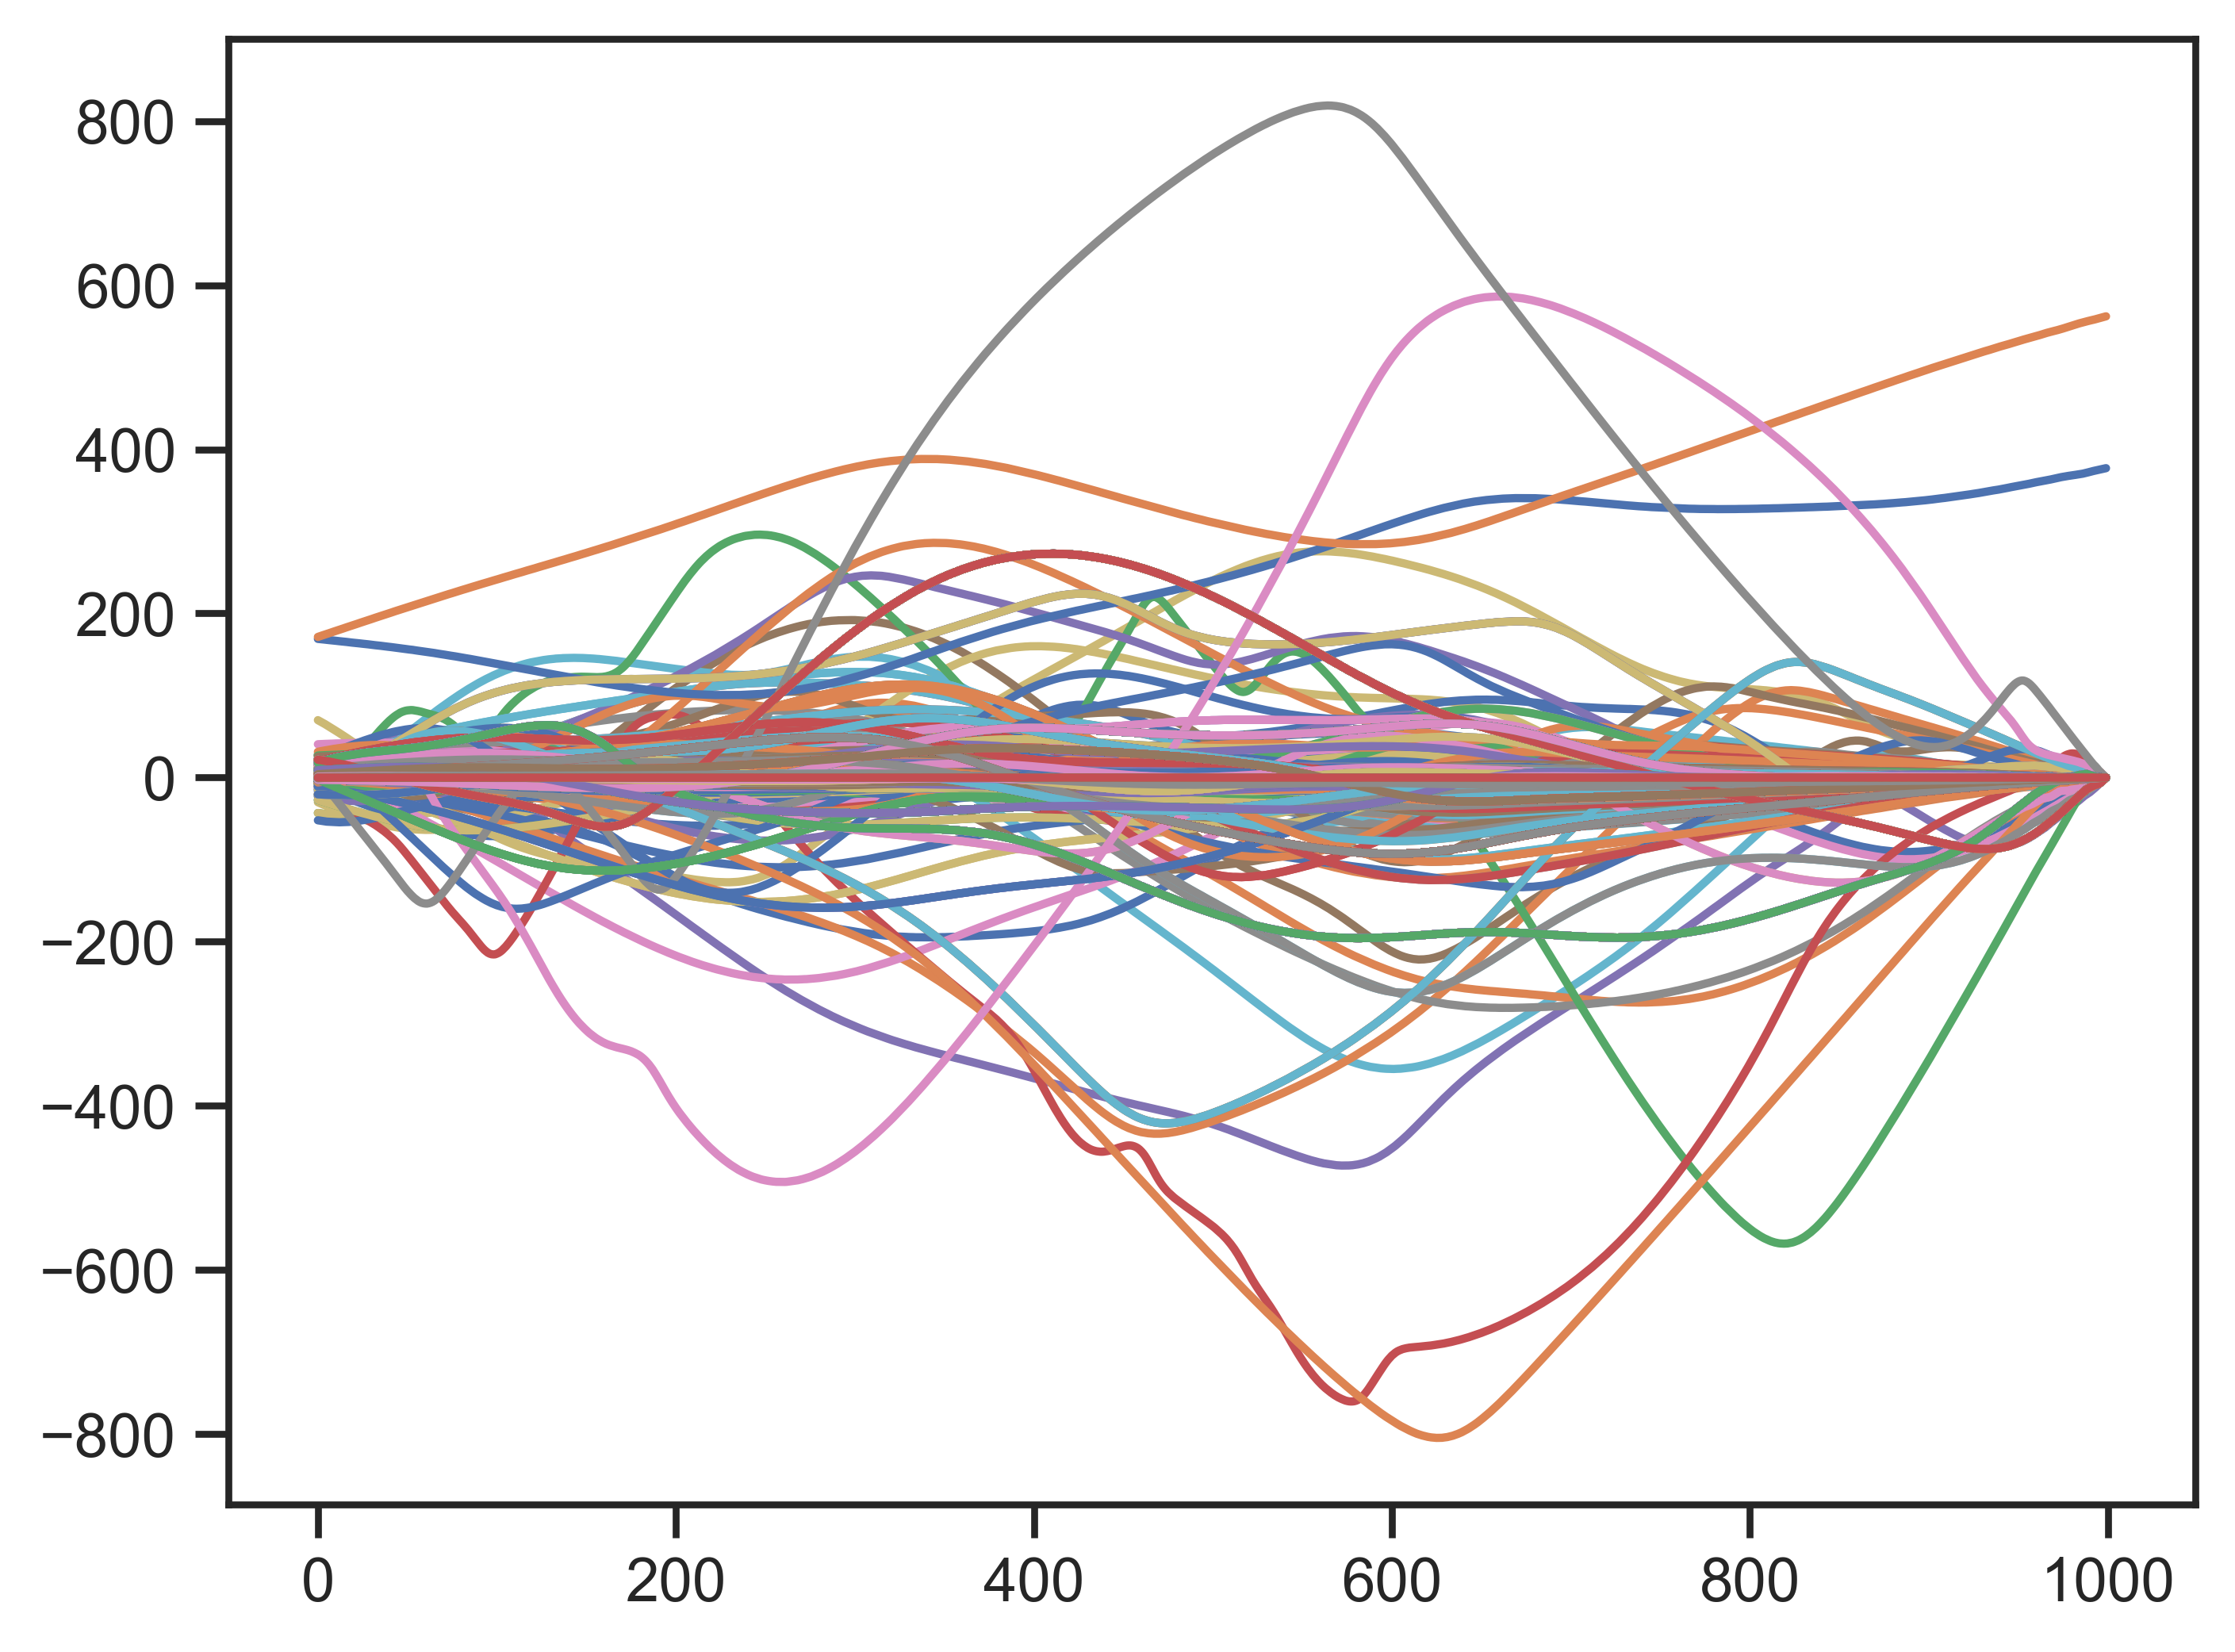

In [18]:
samples_runs = 150
# this will define the computational time

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_post, args = [data_obs])
sampler.run_mcmc(p0, samples_runs) 
samp = sampler.get_chain()

samp_reshaped = samp.reshape(samp.shape[0], -1) #so that the 3D array is reshaped as 2D, to save it 
np.savetxt('samples_emcee.txt',samp_reshaped, delimiter=',')


In [19]:
sampsubset = samp[0:samples_runs,:,:]
samp2d = sampsubset.reshape(sampsubset.shape[0]*sampsubset.shape[1],3)
samp2d.shape
samp2d
samp2d 

array([[ 2.46995163, 11.17329911,  1.38061867],
       [12.76596516,  8.55097185,  2.06851955],
       [20.13615463, 19.70712877,  1.89390439],
       ...,
       [29.97202914,  9.99813821,  0.58711259],
       [29.8561673 , 10.48874787,  0.96239659],
       [29.99813292,  9.93734764,  1.05611292]])

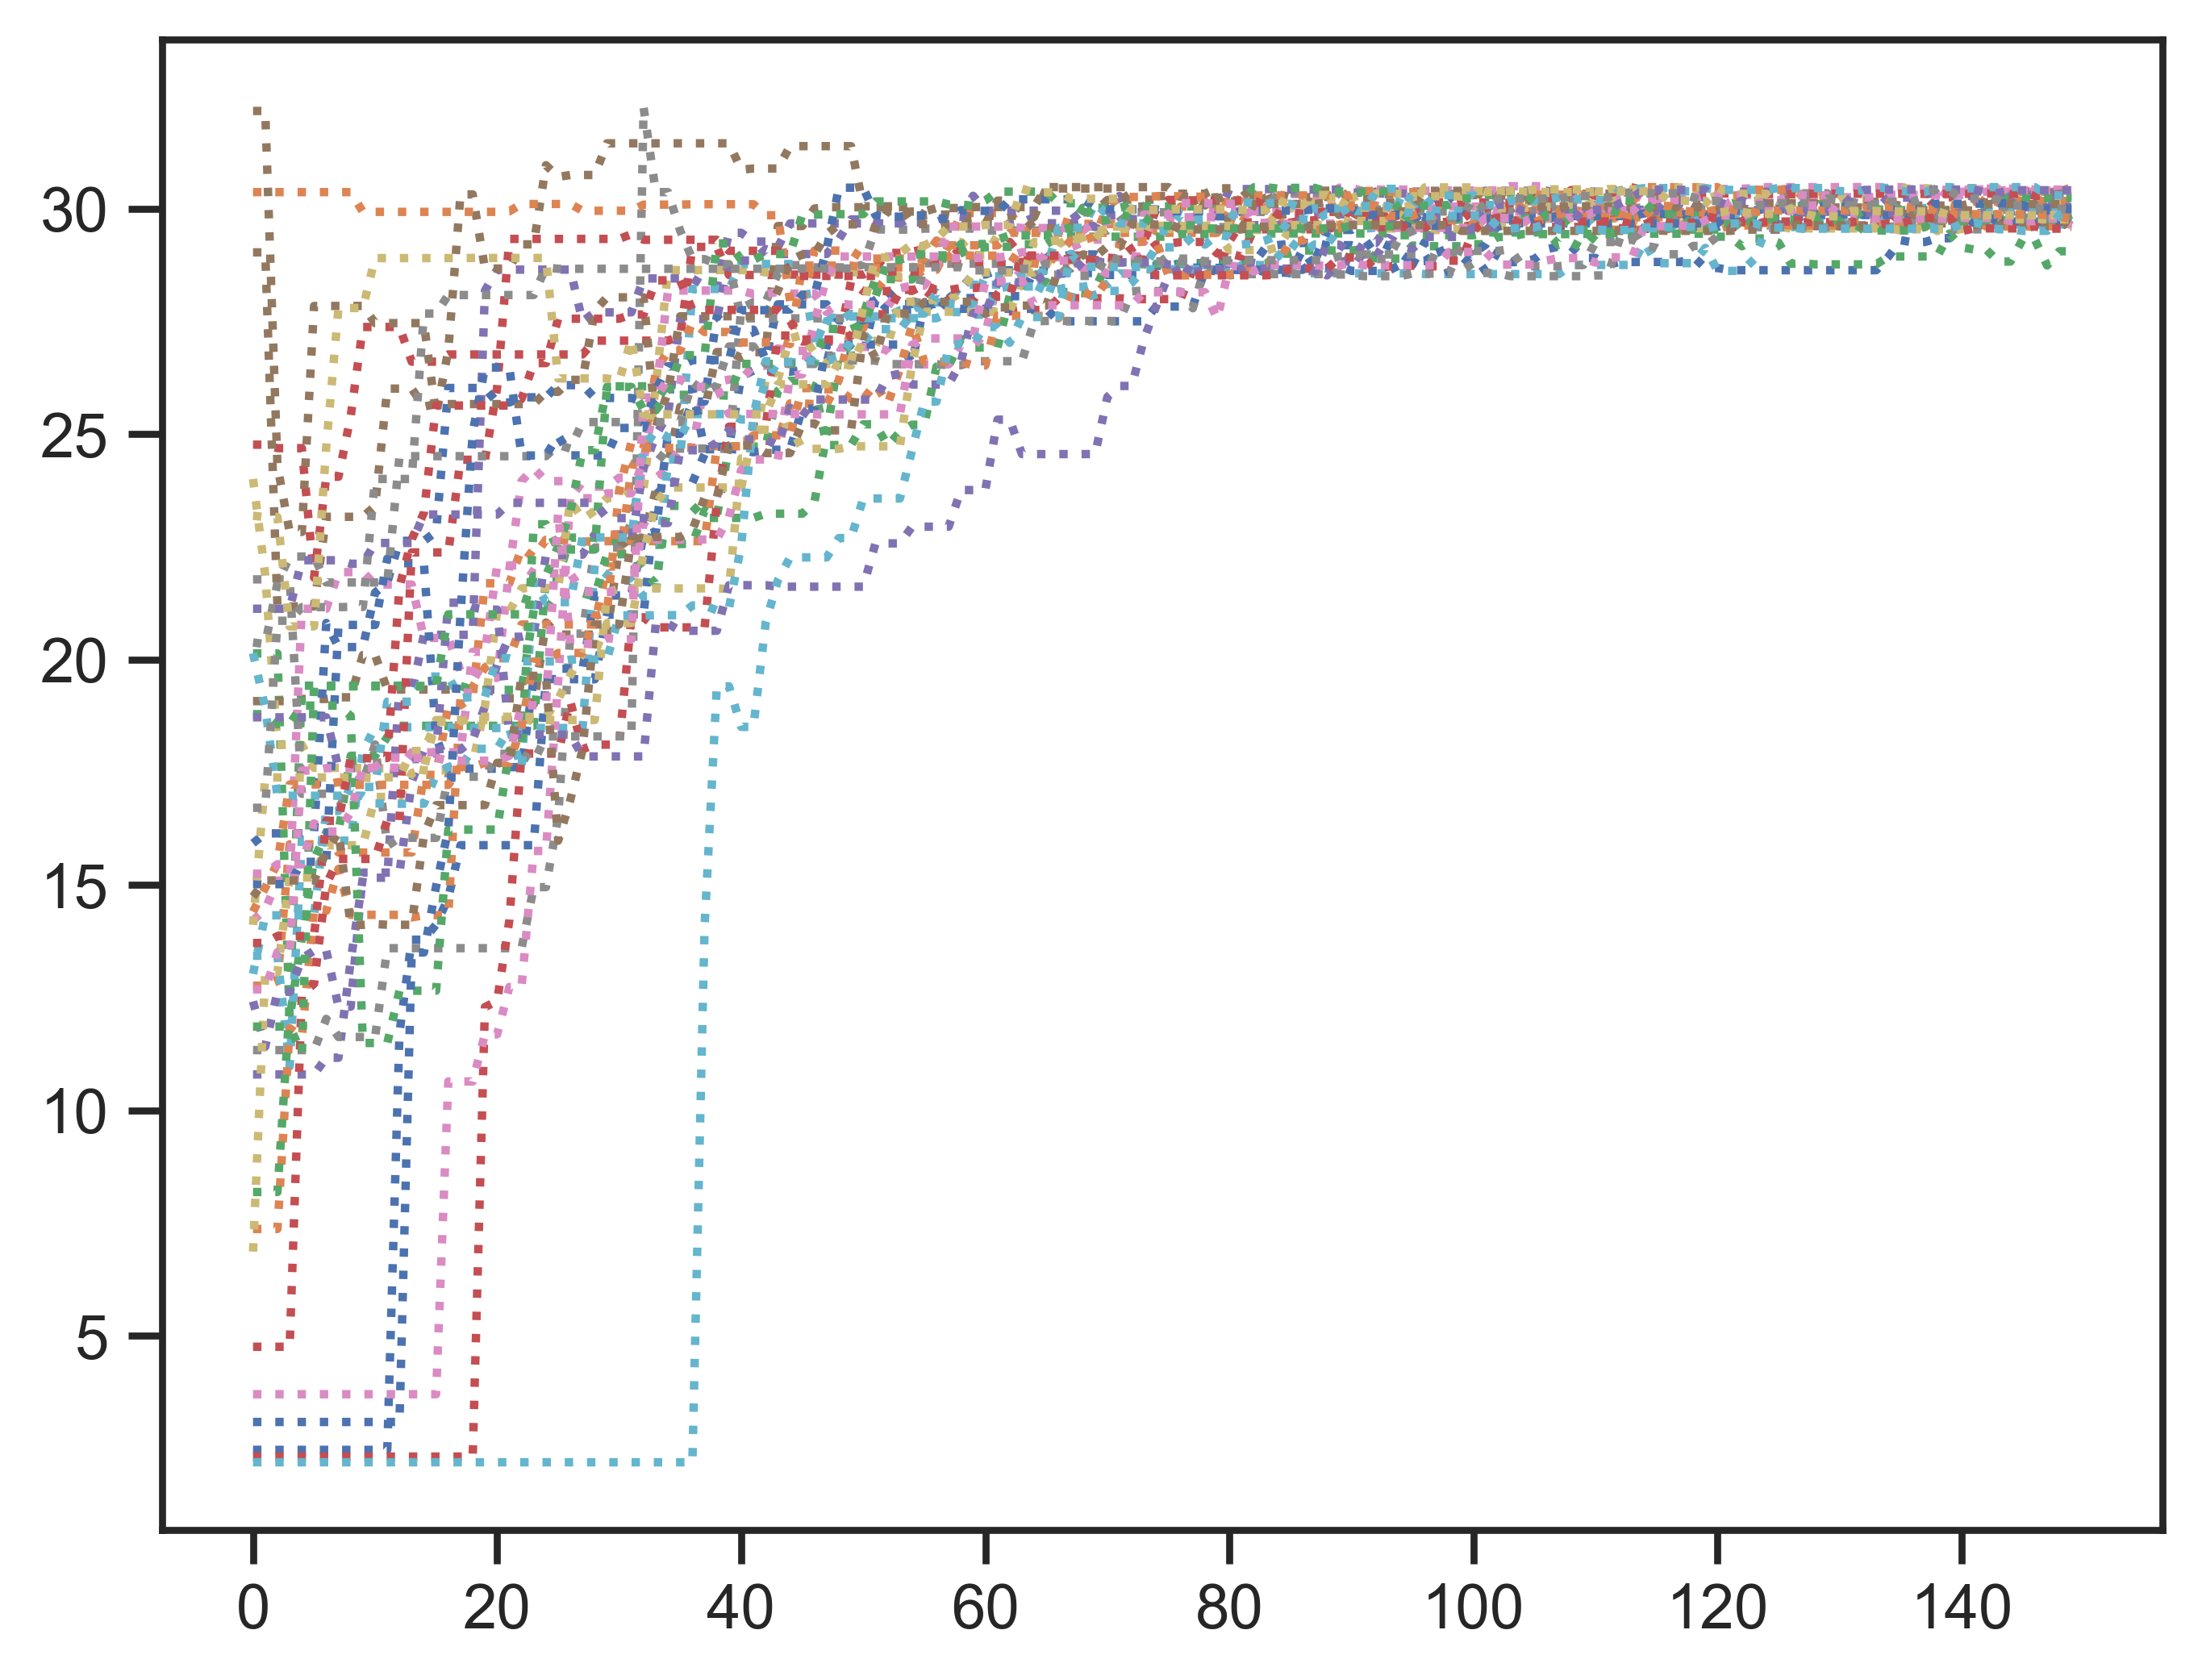

In [20]:
plt.plot(sampler.chain[:,:,0].T, ':')
plt.savefig('migrations.PNG',dpi = 200)

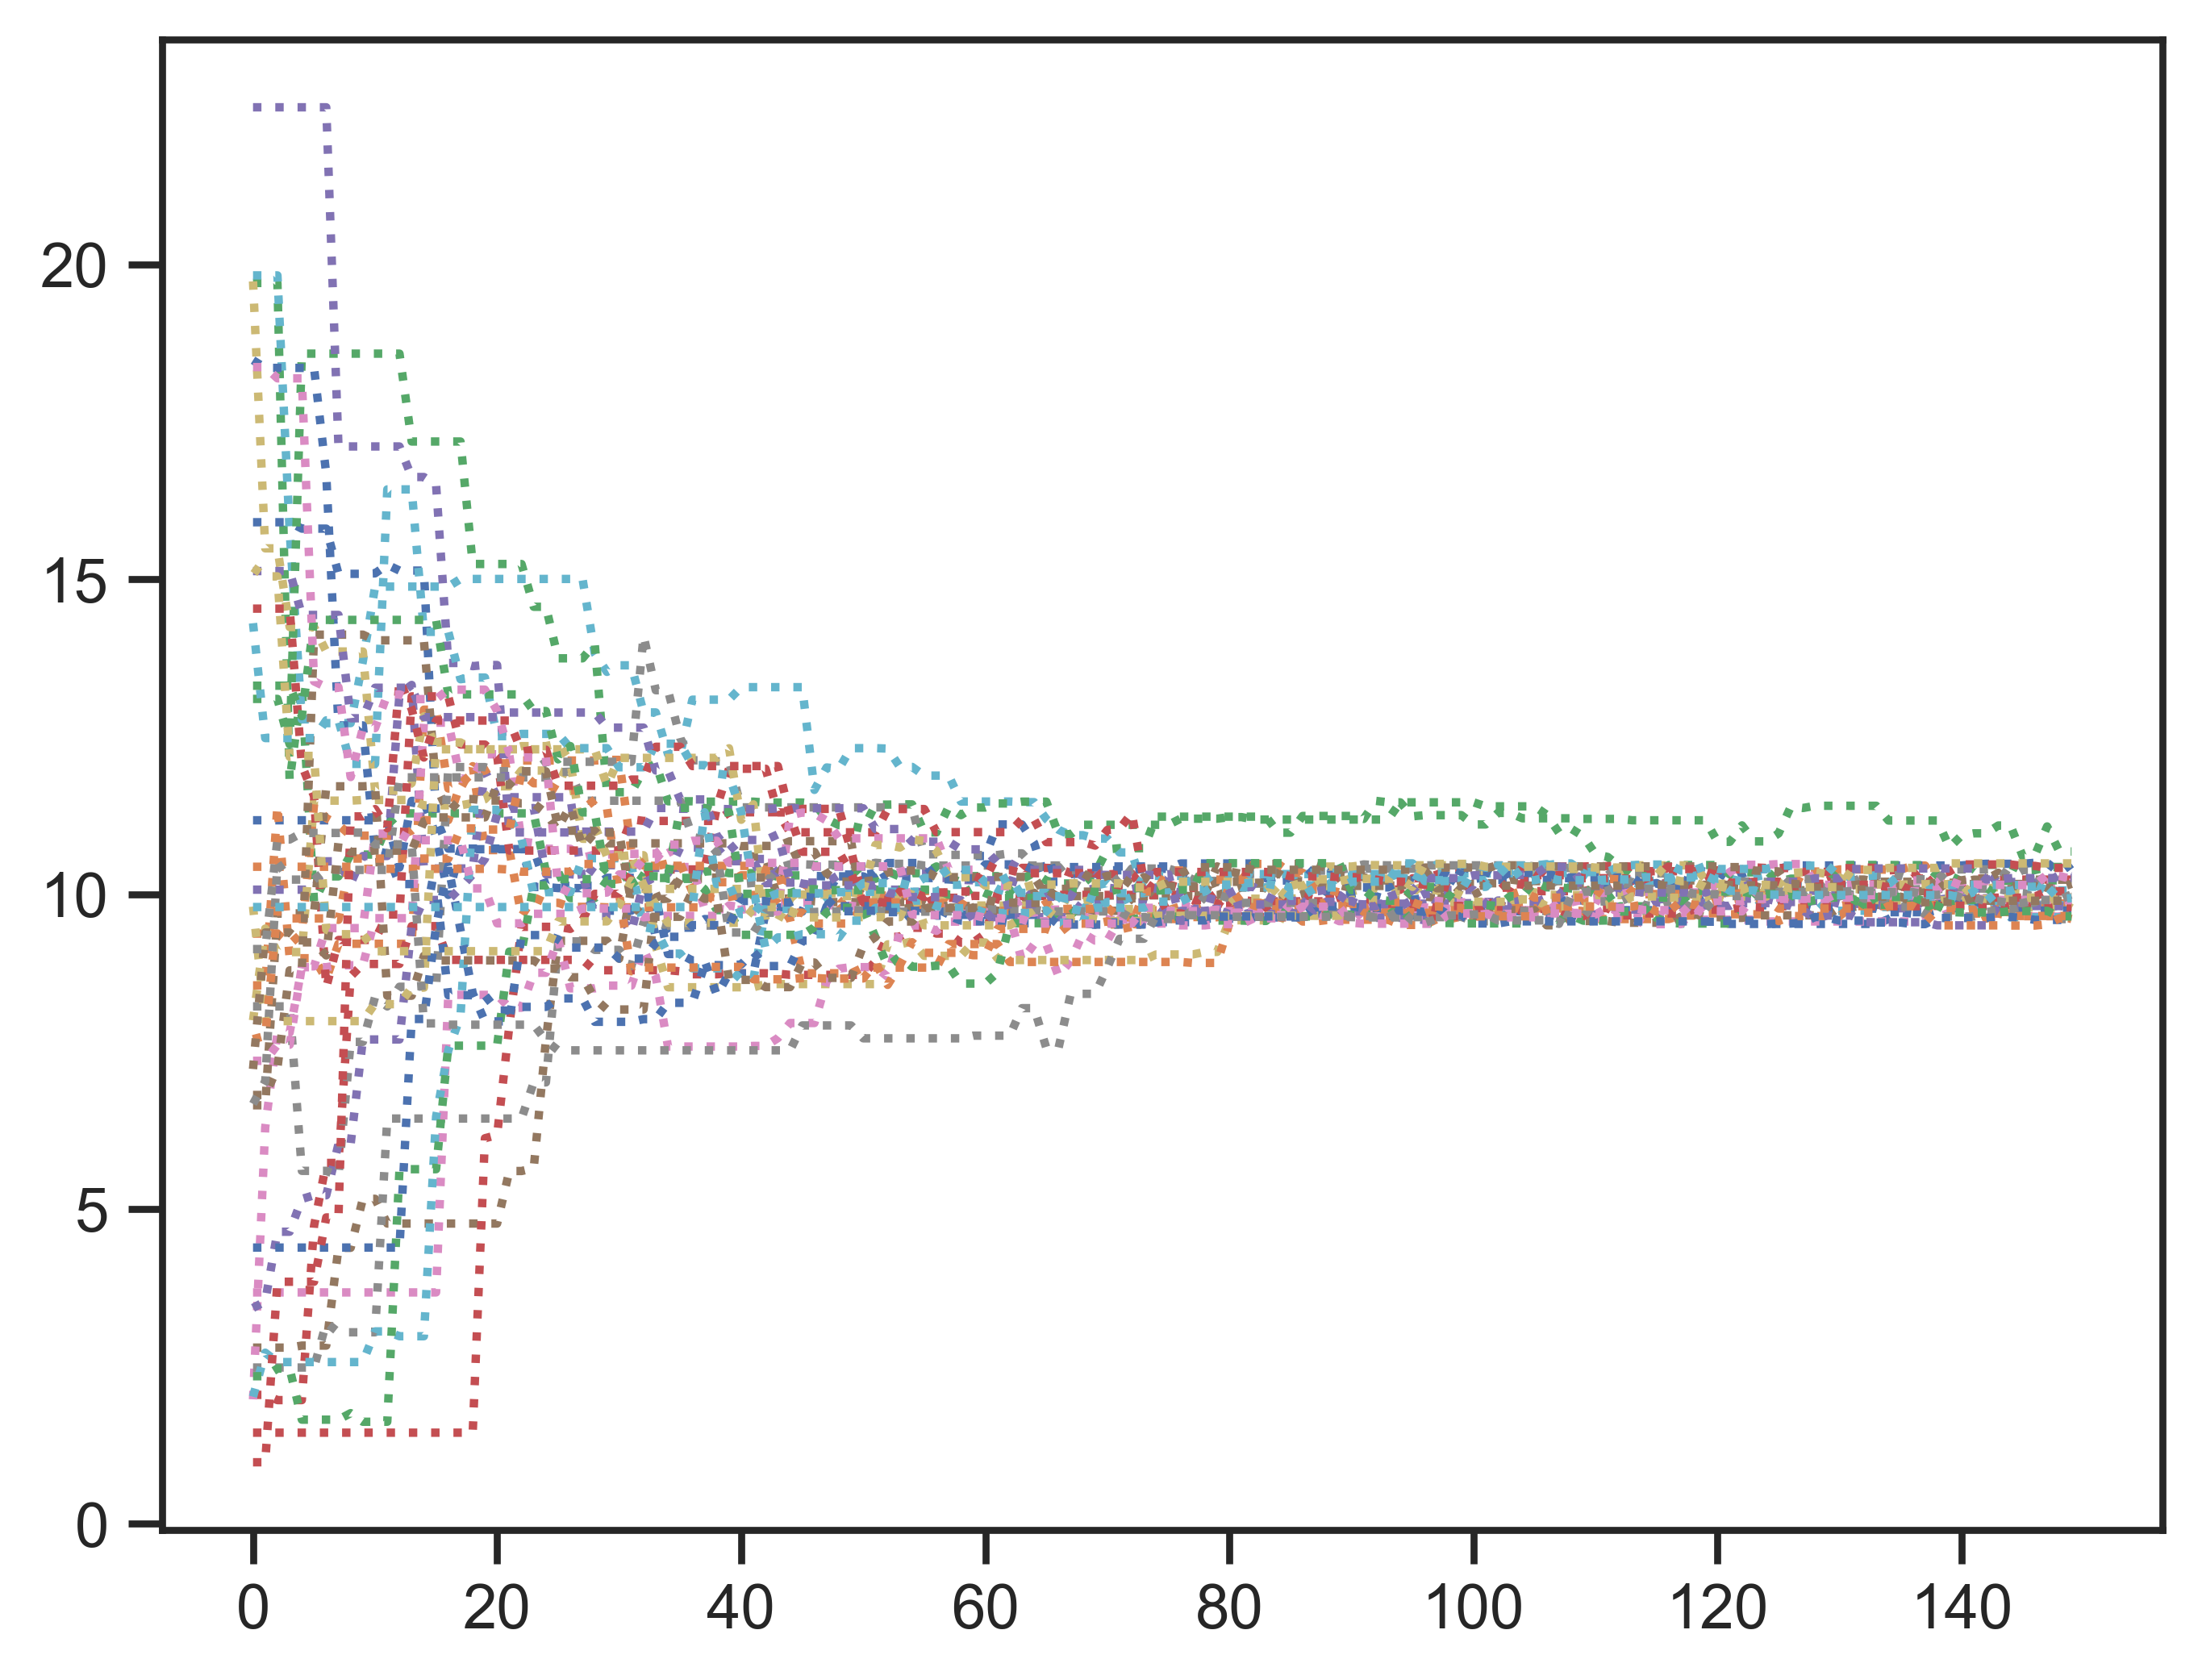

In [21]:
plt.plot(sampler.chain[:,:,1].T, ':')
plt.savefig('migrations.PNG',dpi = 200)

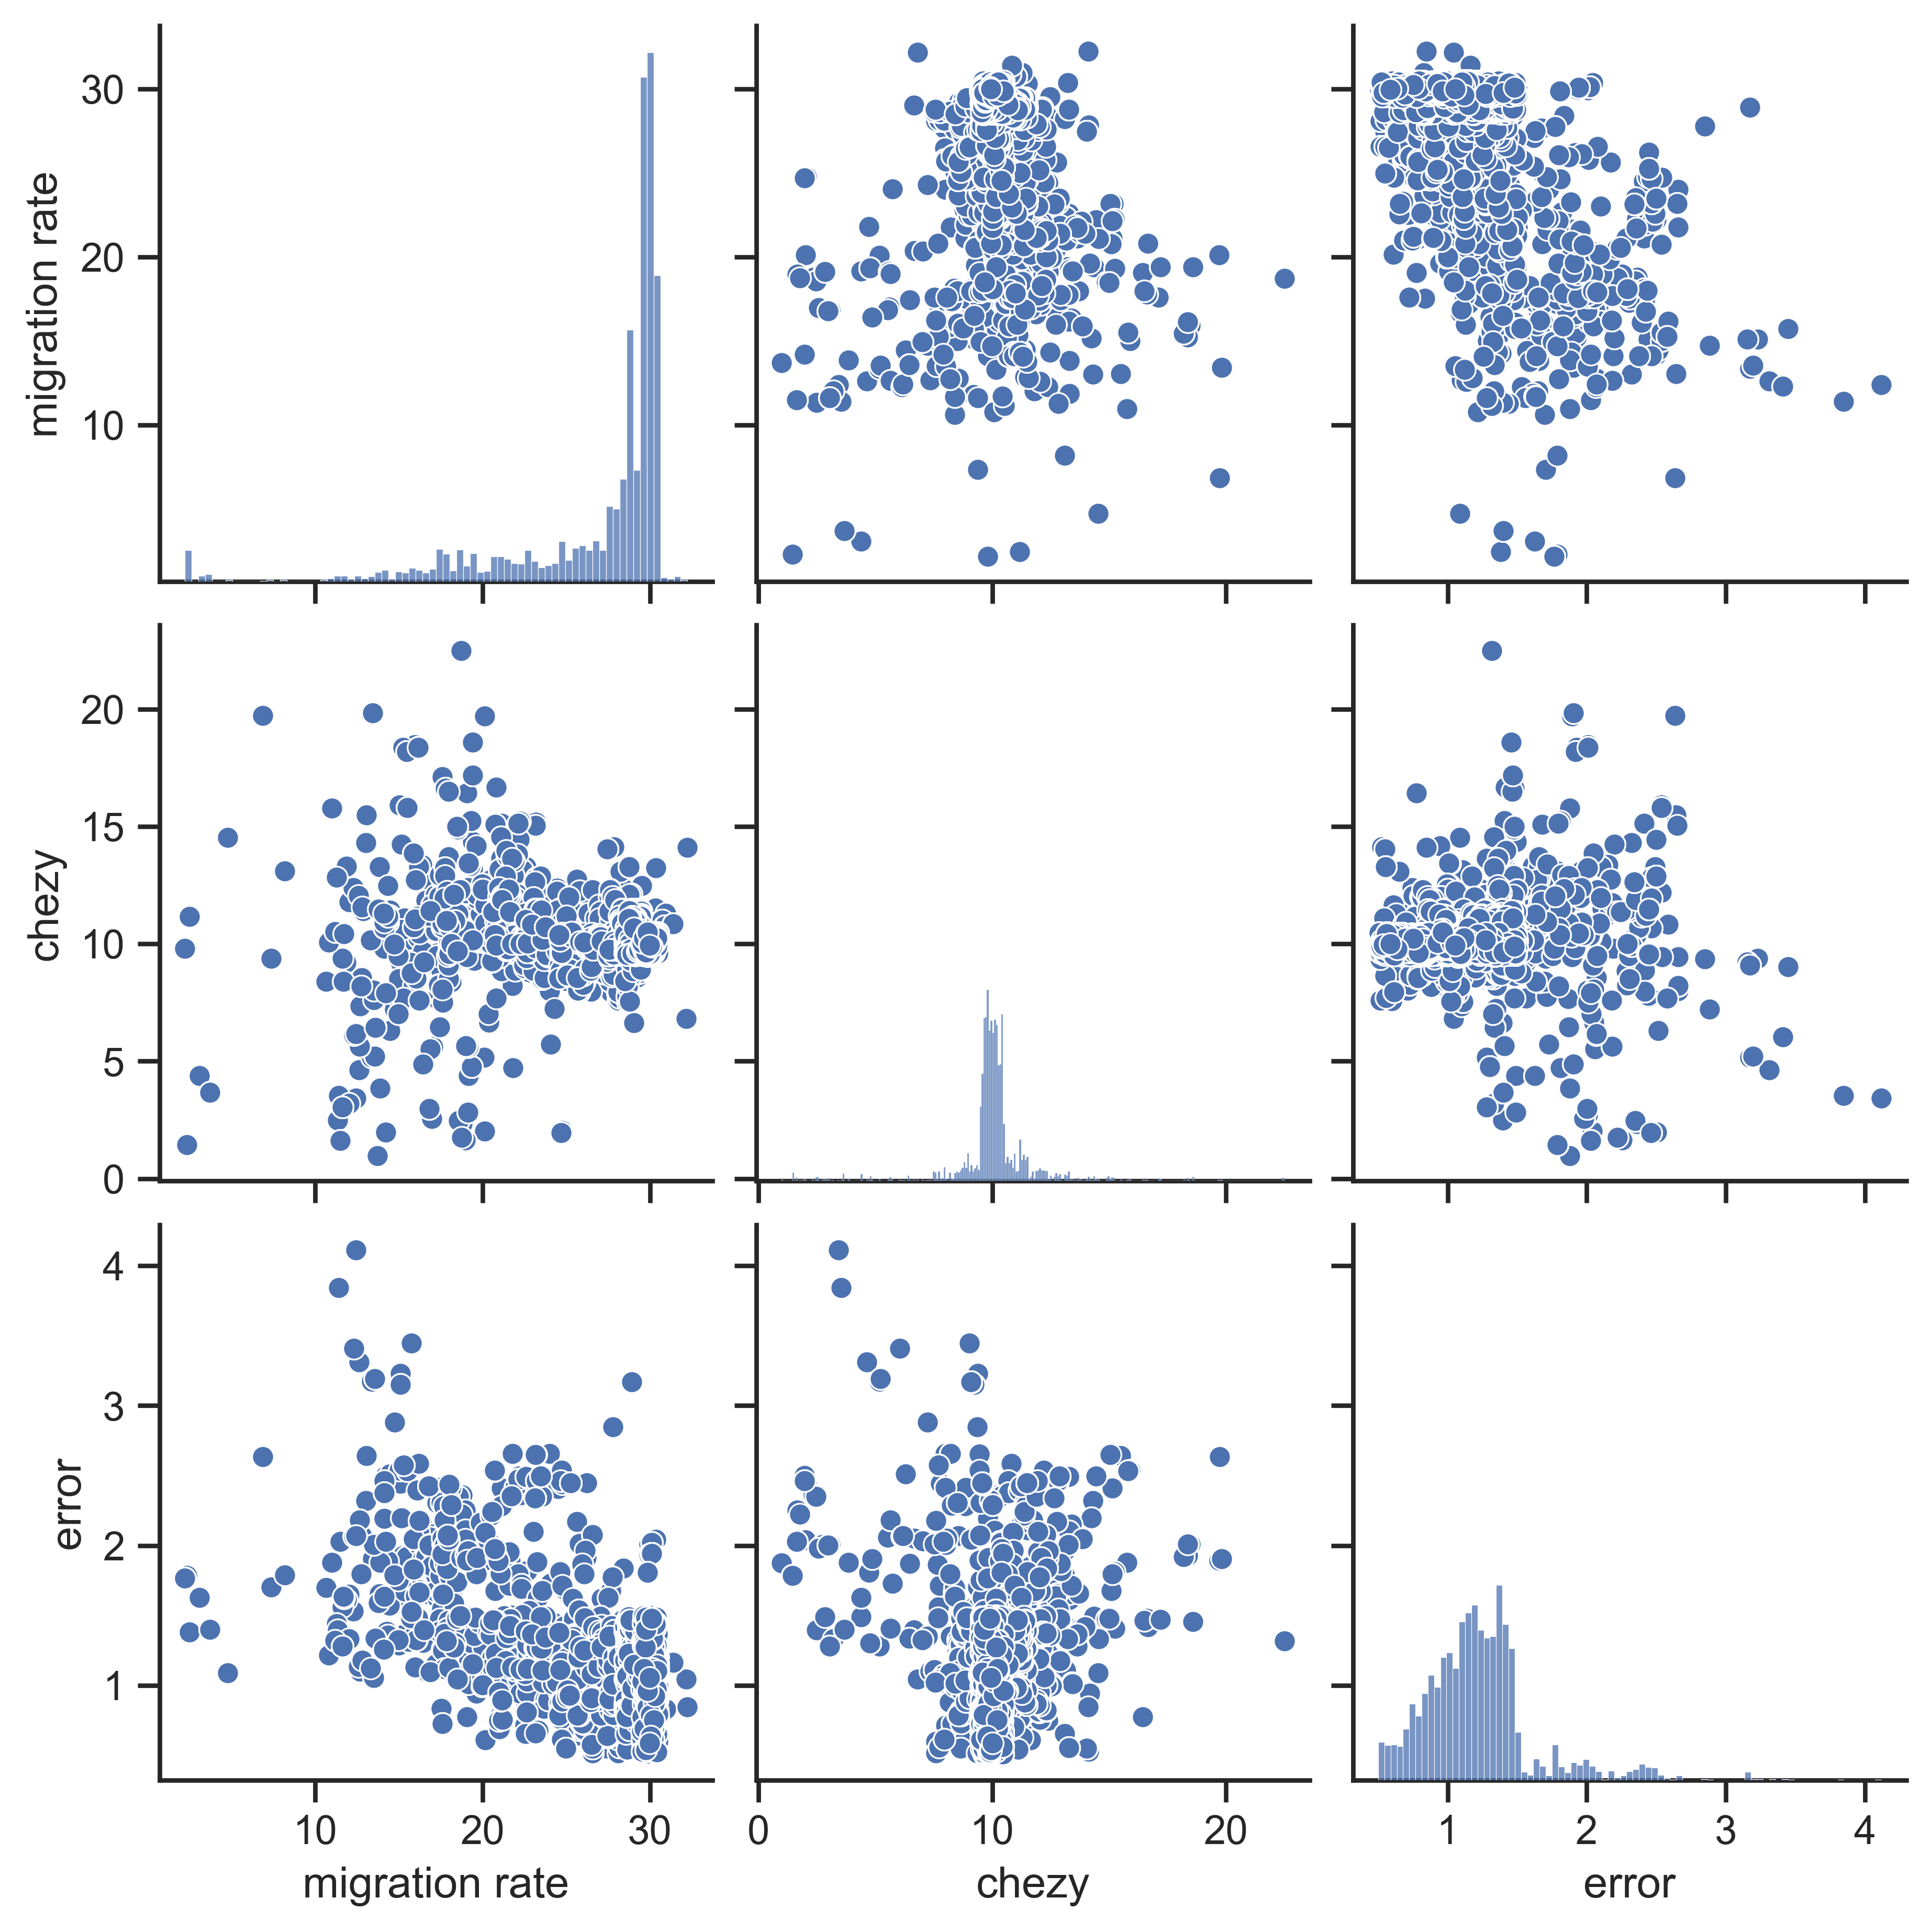

In [22]:
plt.rcParams.update({'font.size': 22}) # must set in top

samp_df = pd.DataFrame(samp2d)
samp_df = samp_df.rename(columns={0: 'migration rate',  1: 'chezy', 2: 'error'})   

samp_df
sns.color_palette("mako")
sns.set(style="ticks")
b = sns.pairplot(samp_df)

plt.savefig('kde%s.PNG',dpi = 300)

**Generating the Risk Map**

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 537.79it/s]
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/174096167.py:49: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.shape(0.1*chb.channels[np.int(nit-1)].x)[0] < 10000:
/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22513/174096167.py:50: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you 

626030
2837
11379


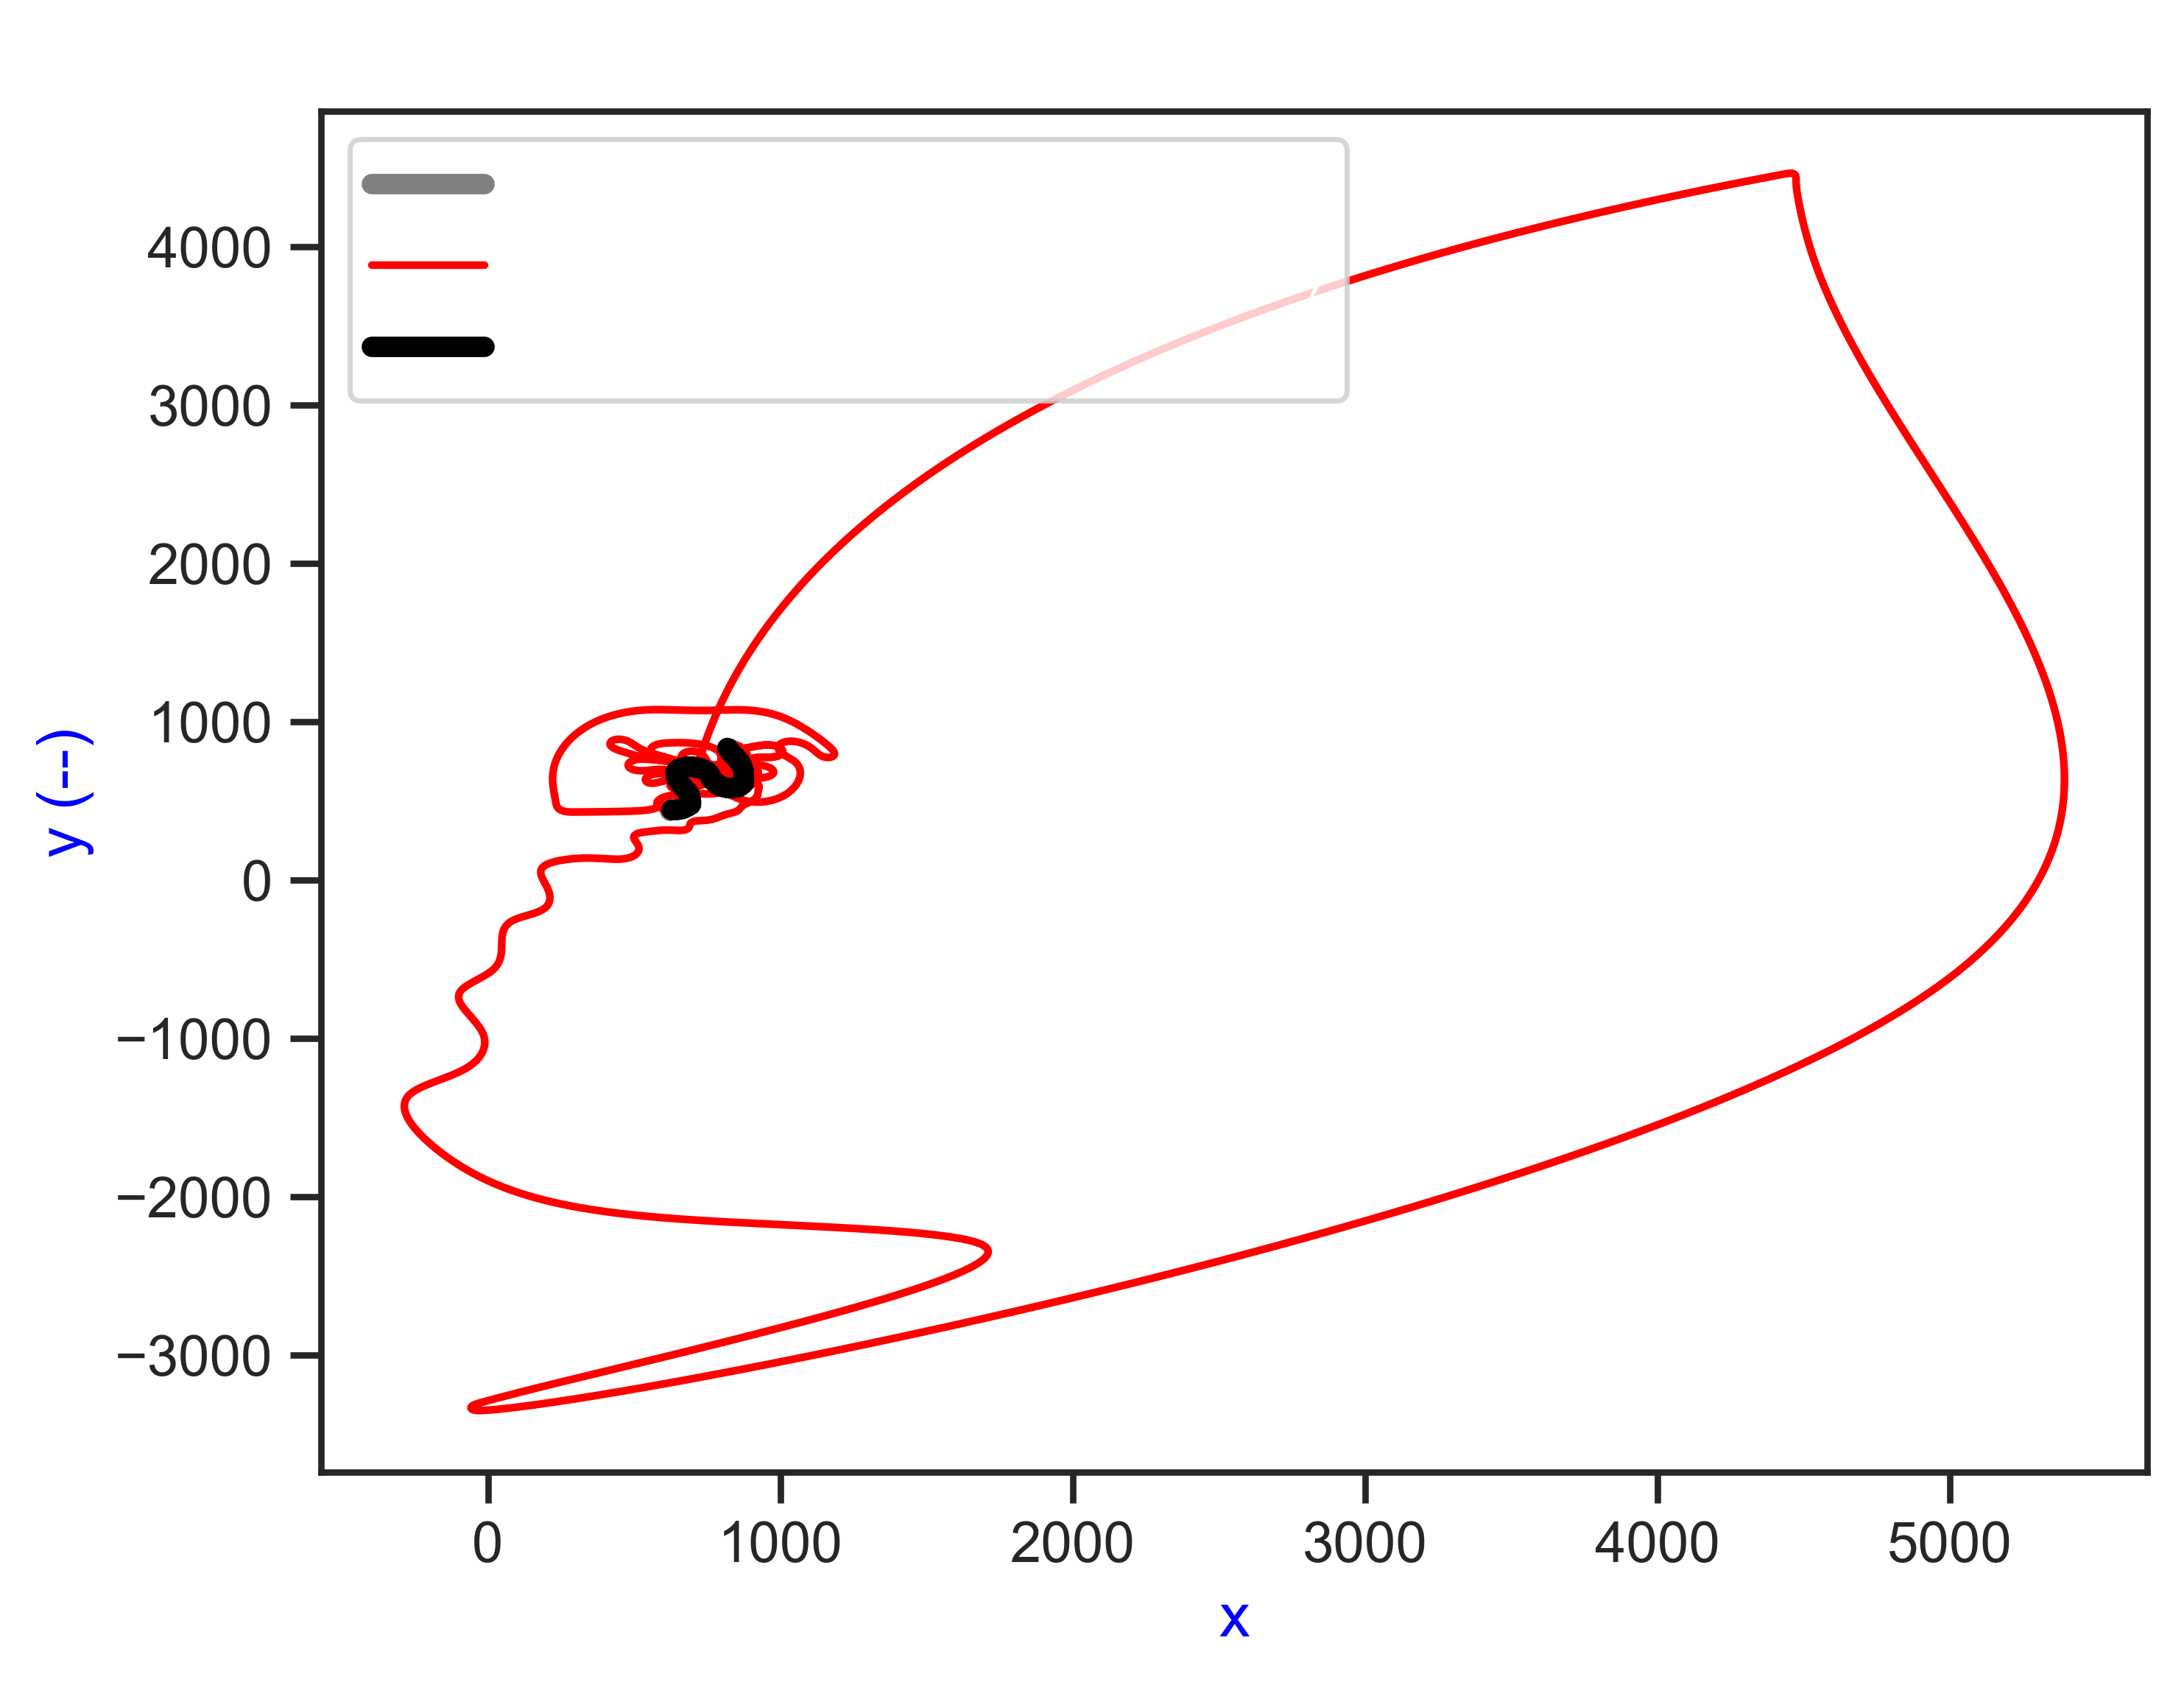

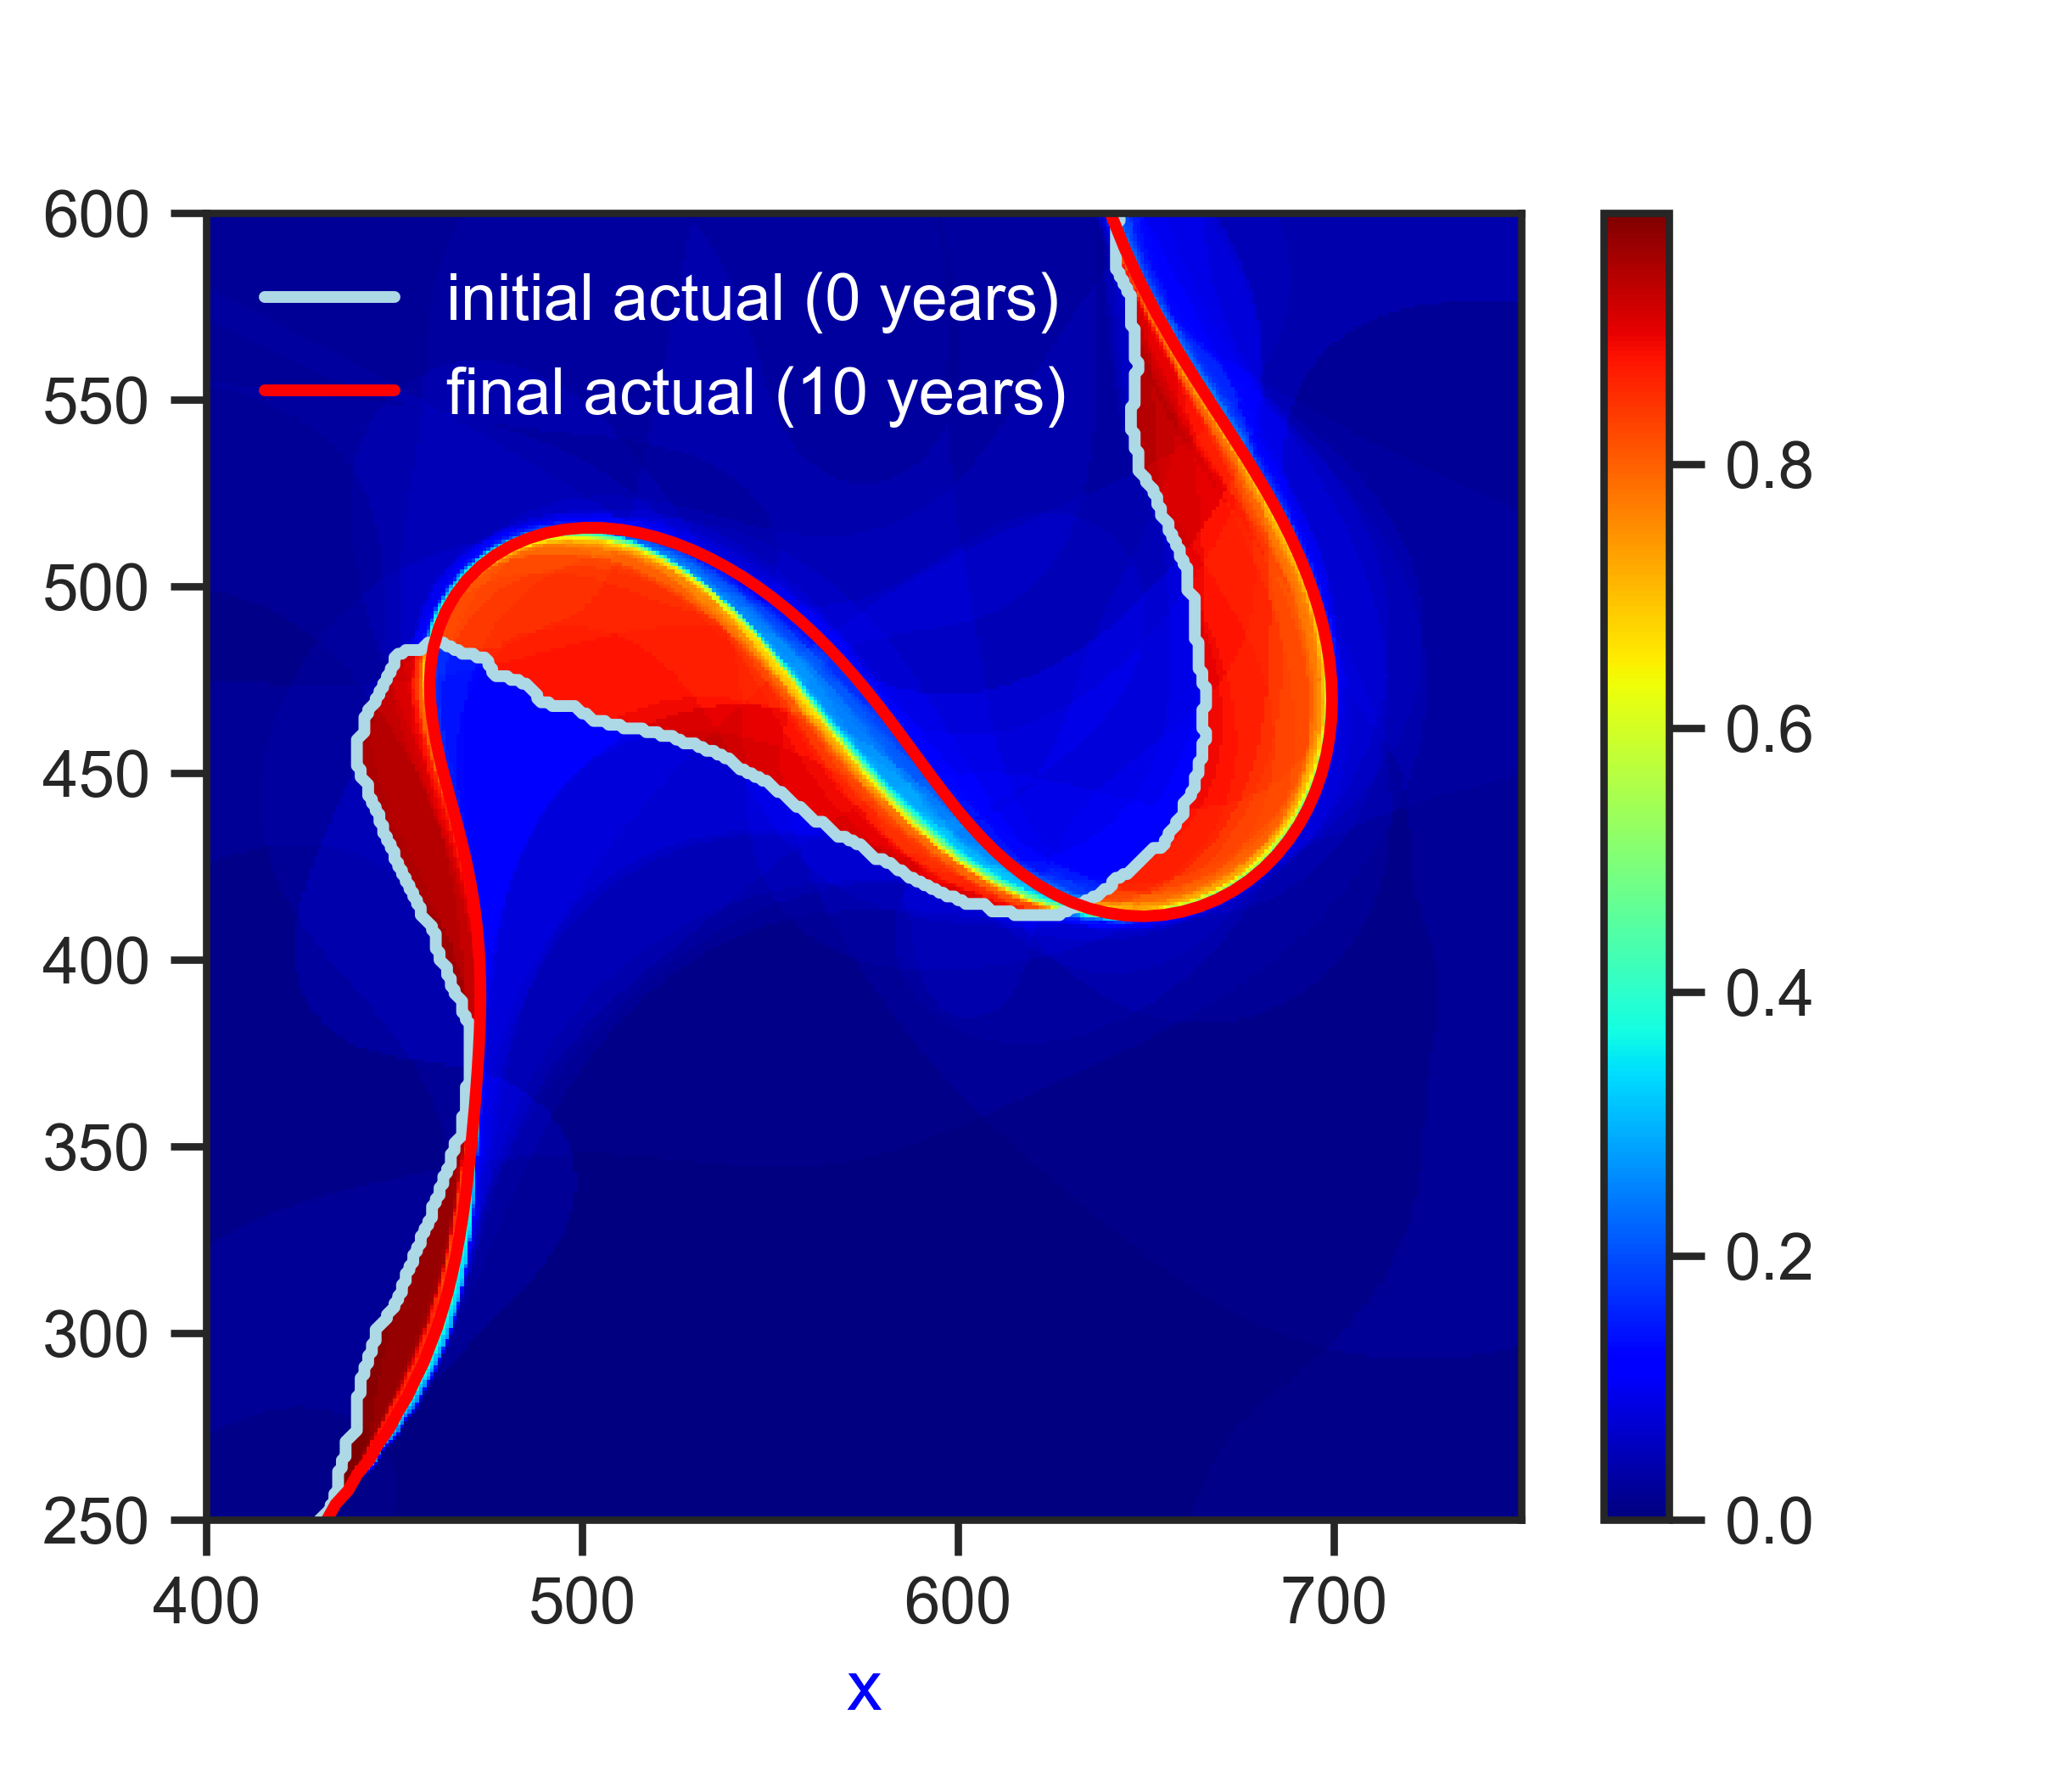

In [27]:
clin=-cl1+1000
clfi=-cl2+1000
clsyn=np.loadtxt('syn.txt',delimiter=' ')


t = np.linspace(0,1,np.shape(clin[:,])[0]) # create a new variable t 
x_o = clin[:,1].flatten()            # get x-axis data
y_o = clin[:,0].flatten()            # get y-axis data
fx_o = interpolate.interp1d(t,x_o)      # initialize the interpolation class
fy_o = interpolate.interp1d(t, y_o)    
tnew = np.linspace(0,1,10000)                        # create a finer t-variable spacing 
xnew_o = fx_o(tnew) + np.random.normal(0,0.2,10000) # get interpolated x values
ynew_o = fy_o(tnew) + np.random.normal(0,0.2,10000) # get interpolated y values
data_obs_ins = np.array([xnew_o,ynew_o])
data_obs_ins = np.round(data_obs_ins, 5) 
data_obs_ins = np.flip(data_obs_ins, axis=1)      

nit = 100                   
depths = D * np.ones((nit,)) 
pad = 0                 
deltas = 50.0               
crdist = 1.8 * W              
kv =  1.0e-12             
dt = 0.1*(365*24*60*60.0)    
dens = 1000               
saved_ts = 1              
n_bends = 5              
Sl = 0.0            
t1 = 0                  
t2 = 0                  
t3 = 0                # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3) after t3)

def hkm_predict(parm):
    kl =  (parm[0]*10)/(365*24*60*60.0)  
    Cfs = parm[1] * 0.001 * np.ones((nit,))
    y=cl1[:,0]*10
    x=cl1[:,1]*10
    z=np.zeros(len(x))
    H=depths[0]
    try:    # use "try" to simulation doesn't stop if there is an error 
        ch=mp.Channel(-x,-y,z,W,H)
        chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])
        ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel
        chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration

        # create an if loop to discard simulations where the channel geometry 
        #is so sinuous that it has more that 10,000 points
        
        if np.shape(0.1*chb.channels[np.int(nit-1)].x)[0] < 10000:
            t = np.linspace(0,1,np.shape(0.1*chb.channels[np.int(nit-1)].x)[0])
            x_m = (0.1*chb.channels[np.int(nit-1)].x)+1000
            y_m = (0.1*chb.channels[np.int(nit-1)].y)+1000

            fx_m = interpolate.interp1d(t,x_m)
            fy_m = interpolate.interp1d(t, y_m)

            tnew = np.linspace(0,1,10000)
            xnew_m = fx_m(tnew)
            ynew_m = fy_m(tnew)
        
        # create an artificial channel which is a very poor prediction
        else:
            t = np.linspace(0,1,10000)
            xnew_m = np.zeros(10000)
            ynew_m = np.zeros(10000)
    
    # create an artificial channel which is a very poor prediction
    except:
        t = np.linspace(0,1,10000)
        xnew_m = np.zeros(10000)
        ynew_m = np.zeros(10000)
        
        #del chb
    return np.array( [xnew_m,ynew_m])

yss = np.zeros([10000,1000])
del_x = np.linspace(0,1,10000)
for i in range(0,1000):
    yss[:,i]= 1*(np.random.normal(0,1,1)*np.cos(2*np.pi*del_x)+np.random.normal(0,1,1)*np.sin(2*np.pi*del_x))
    
sc=1/1
counts = np.zeros((int(sc*800), int(sc*800))) #create variables to store the information abt counts
prob = np.zeros((int(sc*800), int(sc*800))) #create variables to store the information abt proability

counts_obs = np.zeros((int(sc*800),int(sc*800)))  #create variables to store the information abt counts
prob_obs = np.zeros((int(sc*800), int(sc*800))) #create variables to store the information abt proability

ax = pd.DataFrame({"x":clin[:,1], "y":clin[:,0]}).plot.line(x='x', y='y', label='initial actual (0 years)', color='gray',lw=4)

ax.set_xlabel("x (--)")
ax.set_ylabel("y (--)")
ax.set_title("5-year prediction for Ucayali River")

for i in np.random.randint(4000, 6000, 100):
    samplenew = samp2d[i,:2]
    sim = hkm_predict(samplenew)
    x = sim[0,:]
    y = sim[1,:]
    
    asdf = np.array([x,y])
    
    np.savetxt('samples_emcee.txt',asdf, delimiter=',')

    pd.DataFrame({"x":sim[0,:], "y":sim[1,:]}).plot.line(x='x', y='y', ax= ax, color='red',label='_Hidden')
    
    for j in range(0,int(sc*800)):
        # get the x-values of the river corresponding to the y-value of a certain
        # horizontal line
        idx = np.argwhere(np.diff(np.sign(sim[1,:] - np.arange(200,1000,1/sc)[j]))).flatten() 
        idx_obs = np.argwhere(np.diff(np.sign(data_obs_ins[1,:] - np.arange(200,1000,1/sc)[j]))).flatten() 
        
        #ax1.plot(x[idx], y[idx], 'ro')
        intersection = sim[0,idx]
        intersection_obs = data_obs_ins[0,idx_obs]

        
        #ax1.set_xticks(np.arange(-20, 21, 2))
        #ax1.set_yticks(np.arange(-20, 21, 2))   

        for k in range(0,int(sc*800)):
            # count the intersection points on the left side of the grid cell
            counts[k,j]= np.shape(intersection[intersection<=np.arange(200,1000,1/sc)[k]])[0]
            counts_obs[k,j]= np.shape(intersection_obs[intersection_obs<=np.arange(200,1000,1/sc)[k]])[0]
    
    counts = np.absolute(counts-counts_obs)
    #counts = (counts-counts_obs)
    counts[counts%2 == 1] = 1 # erosion happened i.e. = 1 if count number even
    counts[counts%2 == 0] = 0 # no erosion i.e. = 0 if count number off
    #counts[counts != 0] = 1 # erosion happened i.e. = 1 if count number even
    
    prob = prob + counts  # add up all the "monte carlo" runs that pass the grid cell
    
pd.DataFrame({"x":sim[0,:], "y":sim[1,:]}).plot.line(x='x', y='y', ax= ax, color='red',label="probabilistic prediction (5 years)")
pd.DataFrame({"x":clfi[:,1], "y":clfi[:,0]}).plot.line(x='x', y='y', ax= ax, label='final actual (5 years)',color='black',lw=4)
plt.savefig('prob_prediction.jpg')

prob = prob/100
  
y, x = np.meshgrid(np.arange(0,800,1/sc), np.arange(0,800,1/sc))

z = prob

z_min, z_max = 0, np.abs(z).max()

fig, ax = plt.subplots(figsize=(5,4))

c = ax.pcolormesh(x, y, z, cmap='jet', vmin=z_min, vmax=z_max)
fig.colorbar(c, ax=ax)
fig.legend('',frameon=False)
plt.xlim([400, 750])
plt.ylim([250, 600])

mpl.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "blue"})

d = z.ravel()

pd.DataFrame({"x":-cl1[:,1]+800, "y":-cl1[:,0]+800}).plot.line(x='x', y='y', ax= ax,  color='lightblue',lw = 2,label='initial actual (0 years)')
pd.DataFrame({"x":clsyn[:,1]+800, "y":clsyn[:,0]+800}).plot.line(x='x', y='y',   color='red',lw =2 , ax= ax,label='final actual (10 years)')
plt.legend(frameon=False,labelcolor='white')
p1 = ((0 <= d) & (d <= 0.25)).sum()
p2 = ((0.25 <= d) & (d <= 0.75)).sum()
p3 = ((0.75 <= d) & (d <= 1)).sum()

print (p1)
print (p2)
print (p3)

fig.savefig('risk%s.PNG'% i,dpi = 200)